In [1]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
Icc_WTC_Batting_Stats = pd.read_csv(r'E:\Data Science\01 Python folder\Projects\Icc_WTC_Batting_Stats1.csv')

In [3]:
Icc_WTC_Batting_Stats

,Unnamed: 0,Name,Span,Matches,innings,Not_outs,Runs,Highest_score,Average,Best_score,Strike_rate,Hunderds,fifties,Ducks,fours,sixes,Team
0,0,CT Bancroft,2019-2019,2,4,0,44,16,11.00,162,27.16,0,0,0,6,0,Australia
1,1,SM Boland,2021-2022,3,3,1,24,10*,12.00,57,42.10,0,0,0,2,0,Australia
2,2,JA Burns,2019-2020,7,12,1,319,97,29.00,683,46.70,0,3,2,33,4,Australia
3,3,AT Carey,2021-2022,8,12,0,362,93,30.16,706,51.27,0,3,1,32,2,Australia
4,4,PJ Cummins,2019-2022,21,28,5,305,34*,13.26,791,38.55,0,0,5,30,4,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,G Moti-Kanhai,2022-2022,1*,-,-,-,-,-,-,-,-,-,-,-,-,West Indies
240,240,V Permaul,2021-2022,3,4,1,47,26*,15.66,152,30.92,0,0,0,4,0,West Indies
241,241,KOA Powell,2021-2021,4,7,0,102,51,14.57,222,45.94,0,1,1,17,0,West Indies
242,242,RA Reifer,2022-2022,1*,1,0,11,11,11.00,26,42.30,0,0,0,2,0,West Indies


In [4]:
Icc_WTC_Batting_Stats.replace('-','0', inplace=True)

Icc_WTC_Batting_Stats['Highest_score'] = Icc_WTC_Batting_Stats['Highest_score'].str.replace('*', '')
Icc_WTC_Batting_Stats['Matches'] = Icc_WTC_Batting_Stats['Matches'].str.replace('*', '')

In [5]:
Icc_WTC_Batting_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     244 non-null    int64 
 1   Name           244 non-null    object
 2   Span           244 non-null    object
 3   Matches        244 non-null    object
 4   innings        244 non-null    object
 5   Not_outs       244 non-null    object
 6   Runs           244 non-null    object
 7   Highest_score  244 non-null    object
 8   Average        244 non-null    object
 9   Best_score     244 non-null    object
 10  Strike_rate    244 non-null    object
 11  Hunderds       244 non-null    object
 12  fifties        244 non-null    object
 13  Ducks          244 non-null    object
 14  fours          244 non-null    object
 15  sixes          244 non-null    object
 16  Team           244 non-null    object
dtypes: int64(1), object(16)
memory usage: 32.5+ KB


In [6]:
Icc_WTC_Batting_Stats[['Matches','innings','Not_outs','Runs','Highest_score','Average','Best_score','Strike_rate','Hunderds','fifties','Ducks','fours','sixes']] = Icc_WTC_Batting_Stats[['Matches','innings','Not_outs','Runs','Highest_score','Average','Best_score','Strike_rate','Hunderds','fifties','Ducks','fours','sixes']].astype(float)

In [7]:
Icc_WTC_Batting_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     244 non-null    int64  
 1   Name           244 non-null    object 
 2   Span           244 non-null    object 
 3   Matches        244 non-null    float64
 4   innings        244 non-null    float64
 5   Not_outs       244 non-null    float64
 6   Runs           244 non-null    float64
 7   Highest_score  244 non-null    float64
 8   Average        244 non-null    float64
 9   Best_score     244 non-null    float64
 10  Strike_rate    244 non-null    float64
 11  Hunderds       244 non-null    float64
 12  fifties        244 non-null    float64
 13  Ducks          244 non-null    float64
 14  fours          244 non-null    float64
 15  sixes          244 non-null    float64
 16  Team           244 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 32.5

In [8]:
Icc_WTC_Batting_Stats.sort_values(by = 'Runs', ascending=False, inplace=True)

In [9]:
Icc_WTC_Batting_Stats.reset_index(inplace=True)

In [10]:
Icc_WTC_Batting_Stats.drop(['Unnamed: 0','index'], axis = 1, inplace = True)

In [11]:
Icc_WTC_Batting_Stats

,Name,Span,Matches,innings,Not_outs,Runs,Highest_score,Average,Best_score,Strike_rate,Hunderds,fifties,Ducks,fours,sixes,Team
0,JE Root,2019-2022,34.0,64.0,4.0,3140.0,228.0,52.33,5598.0,56.09,10.0,12.0,6.0,334.0,6.0,England
1,M Labuschagne,2019-2022,21.0,37.0,1.0,2180.0,215.0,60.55,3972.0,54.88,6.0,12.0,2.0,243.0,6.0,Australia
2,BA Stokes,2019-2022,27.0,52.0,4.0,1940.0,176.0,40.41,3380.0,57.39,5.0,10.0,1.0,213.0,51.0,England
3,SPD Smith,2019-2022,21.0,34.0,1.0,1811.0,211.0,54.87,3633.0,49.84,4.0,12.0,2.0,200.0,9.0,Australia
4,Babar Azam,2019-2022,17.0,29.0,4.0,1614.0,196.0,64.56,2910.0,55.46,5.0,10.0,0.0,191.0,7.0,Pakisthan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,Usman Shinwari,2019-2019,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,Pakisthan
240,G Moti-Kanhai,2022-2022,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,West Indies
241,MD Fisher,2022-2022,1.0,1.0,1.0,0.0,0.0,0.00,5.0,0.00,0.0,0.0,0.0,0.0,0.0,England
242,K Zondo,2022-2022,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,South Africa


In [12]:
Icc_WTC_Batting_Stats.to_csv(r'E:\Data Science\01 Python folder\Projects\Icc_WTC_Batting_Stats_cleaned.csv')
Icc_WTC_Batting_Stats.to_excel(r'E:\Data Science\01 Python folder\Projects\Icc_WTC_Batting_Stats_cleaned.xlsx')

In [13]:
Icc_WTC_Batting_Stats.duplicated().value_counts()

False    244
dtype: int64

In [14]:
Icc_WTC_Batting_Stats.rename(columns = {'Best_score':'bowls_faced'}, inplace = True)

In [15]:
Icc_WTC_Batting_Stats

,Name,Span,Matches,innings,Not_outs,Runs,Highest_score,Average,bowls_faced,Strike_rate,Hunderds,fifties,Ducks,fours,sixes,Team
0,JE Root,2019-2022,34.0,64.0,4.0,3140.0,228.0,52.33,5598.0,56.09,10.0,12.0,6.0,334.0,6.0,England
1,M Labuschagne,2019-2022,21.0,37.0,1.0,2180.0,215.0,60.55,3972.0,54.88,6.0,12.0,2.0,243.0,6.0,Australia
2,BA Stokes,2019-2022,27.0,52.0,4.0,1940.0,176.0,40.41,3380.0,57.39,5.0,10.0,1.0,213.0,51.0,England
3,SPD Smith,2019-2022,21.0,34.0,1.0,1811.0,211.0,54.87,3633.0,49.84,4.0,12.0,2.0,200.0,9.0,Australia
4,Babar Azam,2019-2022,17.0,29.0,4.0,1614.0,196.0,64.56,2910.0,55.46,5.0,10.0,0.0,191.0,7.0,Pakisthan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,Usman Shinwari,2019-2019,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,Pakisthan
240,G Moti-Kanhai,2022-2022,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,West Indies
241,MD Fisher,2022-2022,1.0,1.0,1.0,0.0,0.0,0.00,5.0,0.00,0.0,0.0,0.0,0.0,0.0,England
242,K Zondo,2022-2022,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,South Africa


In [16]:
Icc_WTC_Batting_Stats.to_csv(r'E:\Data Science\01 Python folder\Projects\Icc_WTC_Batting_Stats_cleaned.csv')
Icc_WTC_Batting_Stats.to_excel(r'E:\Data Science\01 Python folder\Projects\Icc_WTC_Batting_Stats_cleaned.xlsx')

In [17]:
a = input("Enter name")
Icc_WTC_Batting_Stats[Icc_WTC_Batting_Stats['Name']==a]

Enter name0


,Name,Span,Matches,innings,Not_outs,Runs,Highest_score,Average,bowls_faced,Strike_rate,Hunderds,fifties,Ducks,fours,sixes,Team


# Visualization

In [18]:
# import libraries
import pandas as pd
import numpy as np

import sidetable # for frequency table
# use: pip install sidetable for installation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

### Matches

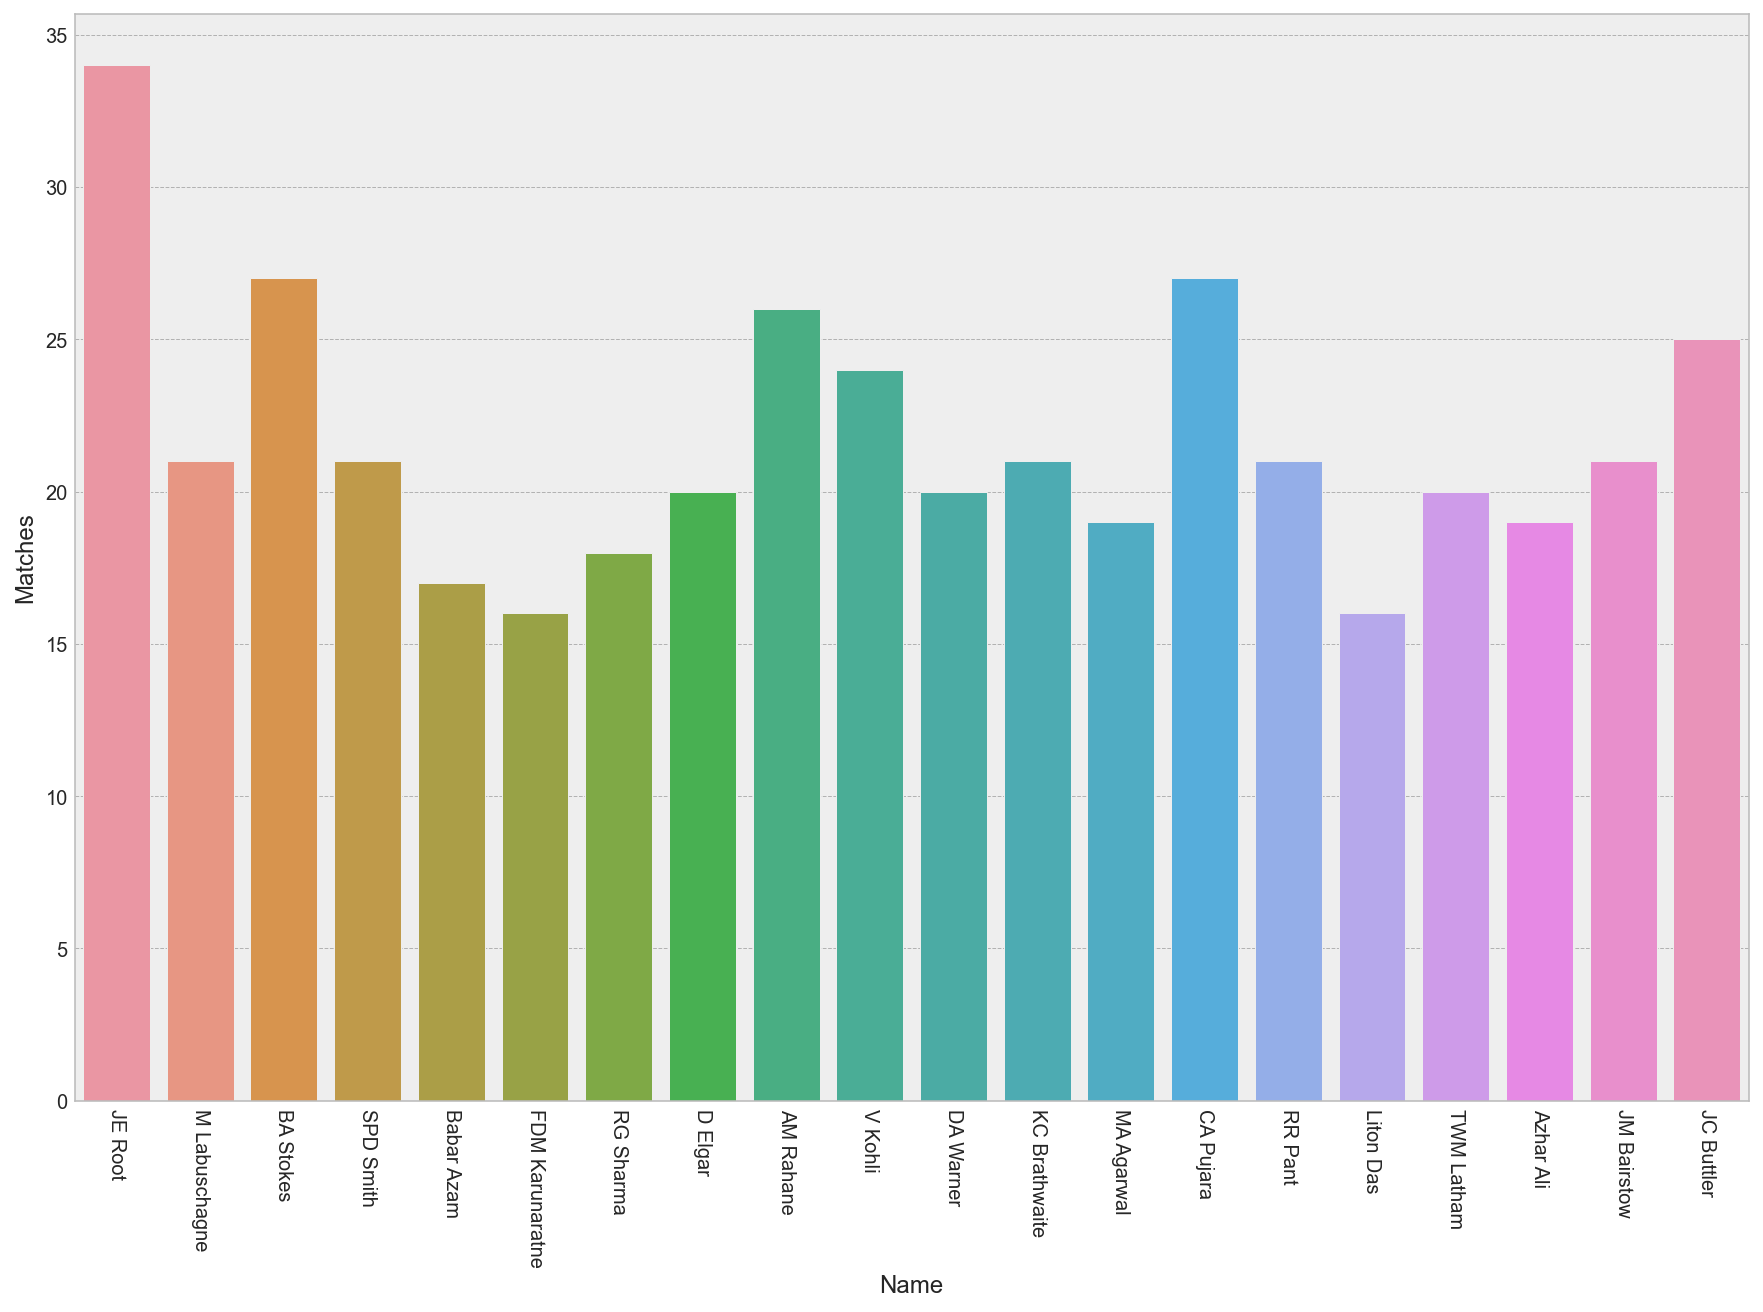

In [19]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Matches', );

### innings

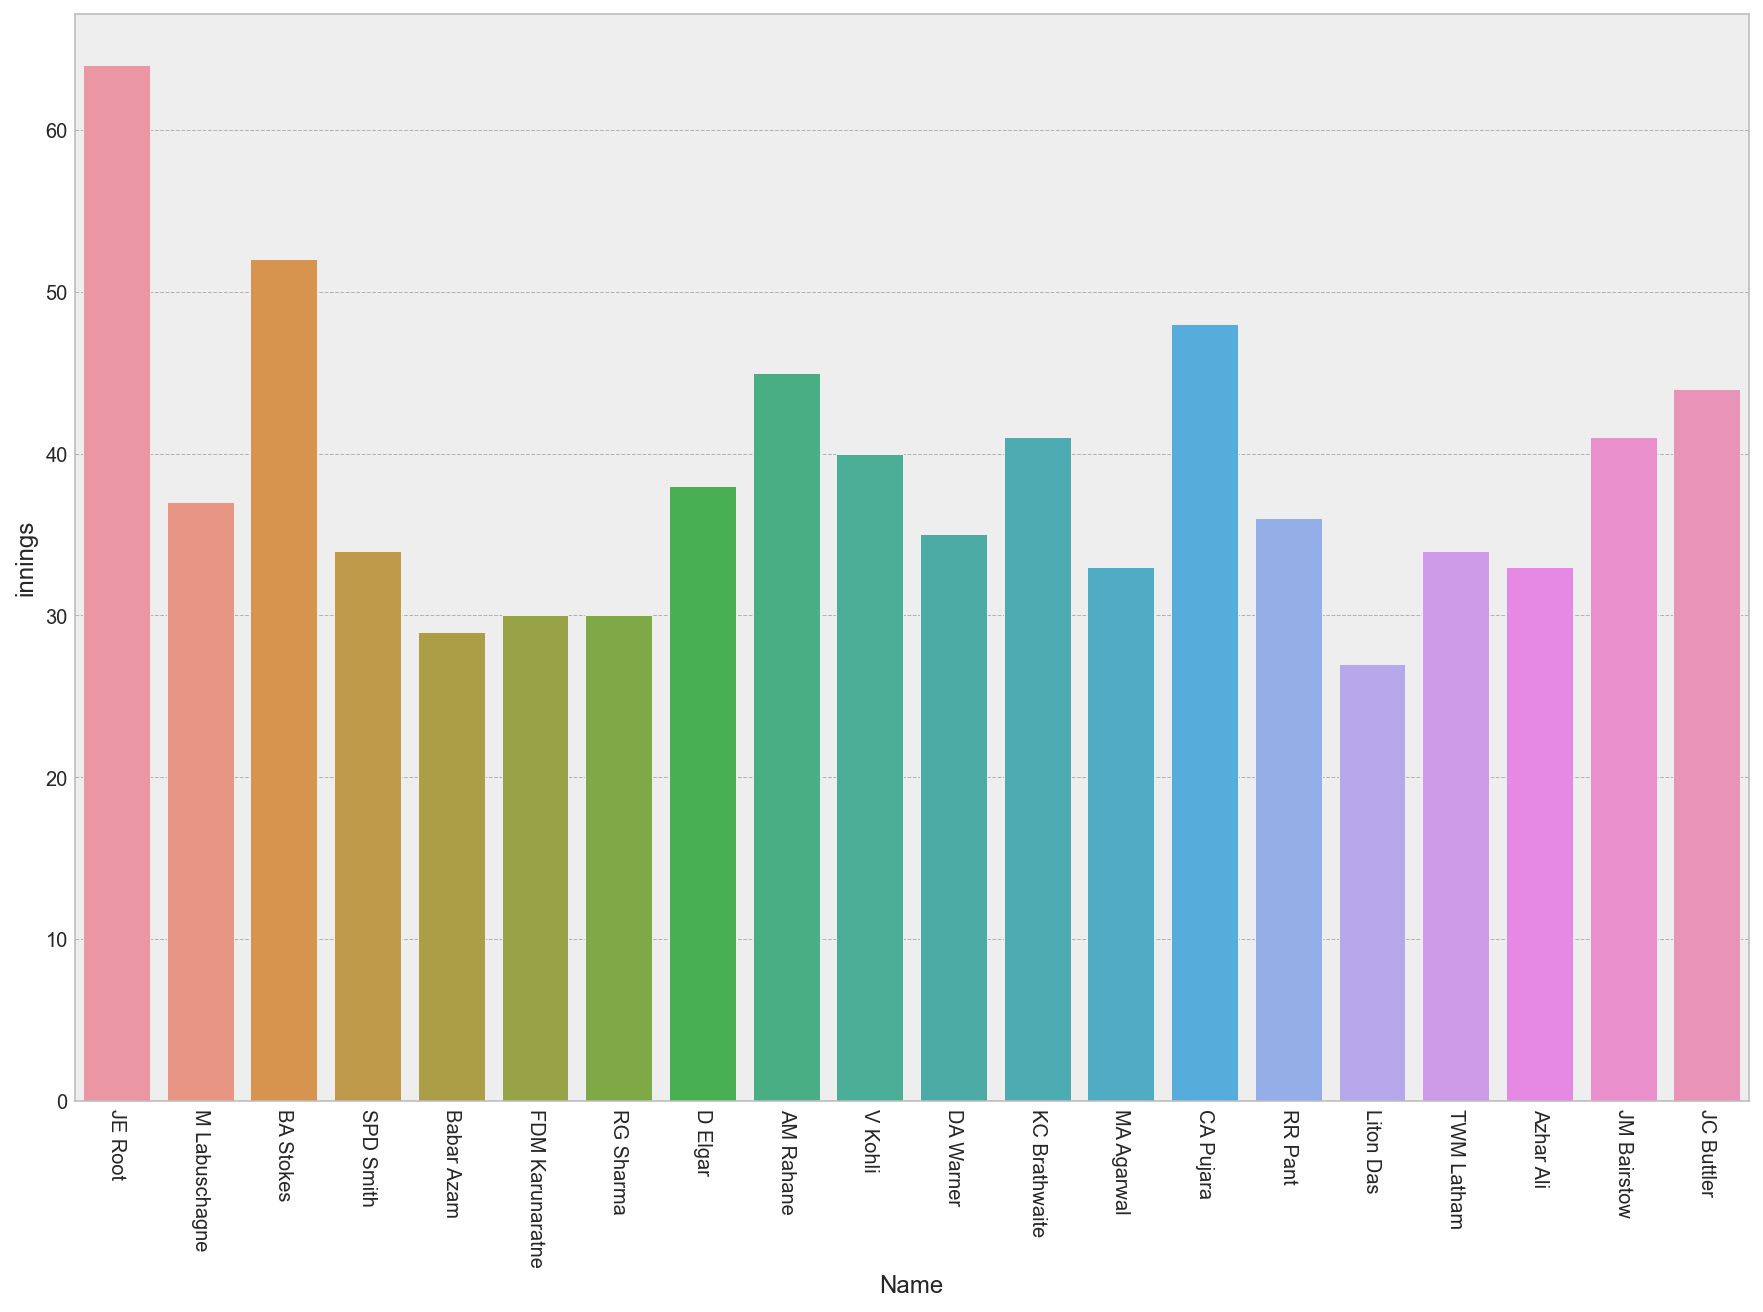

In [20]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'innings', );

### Not outs

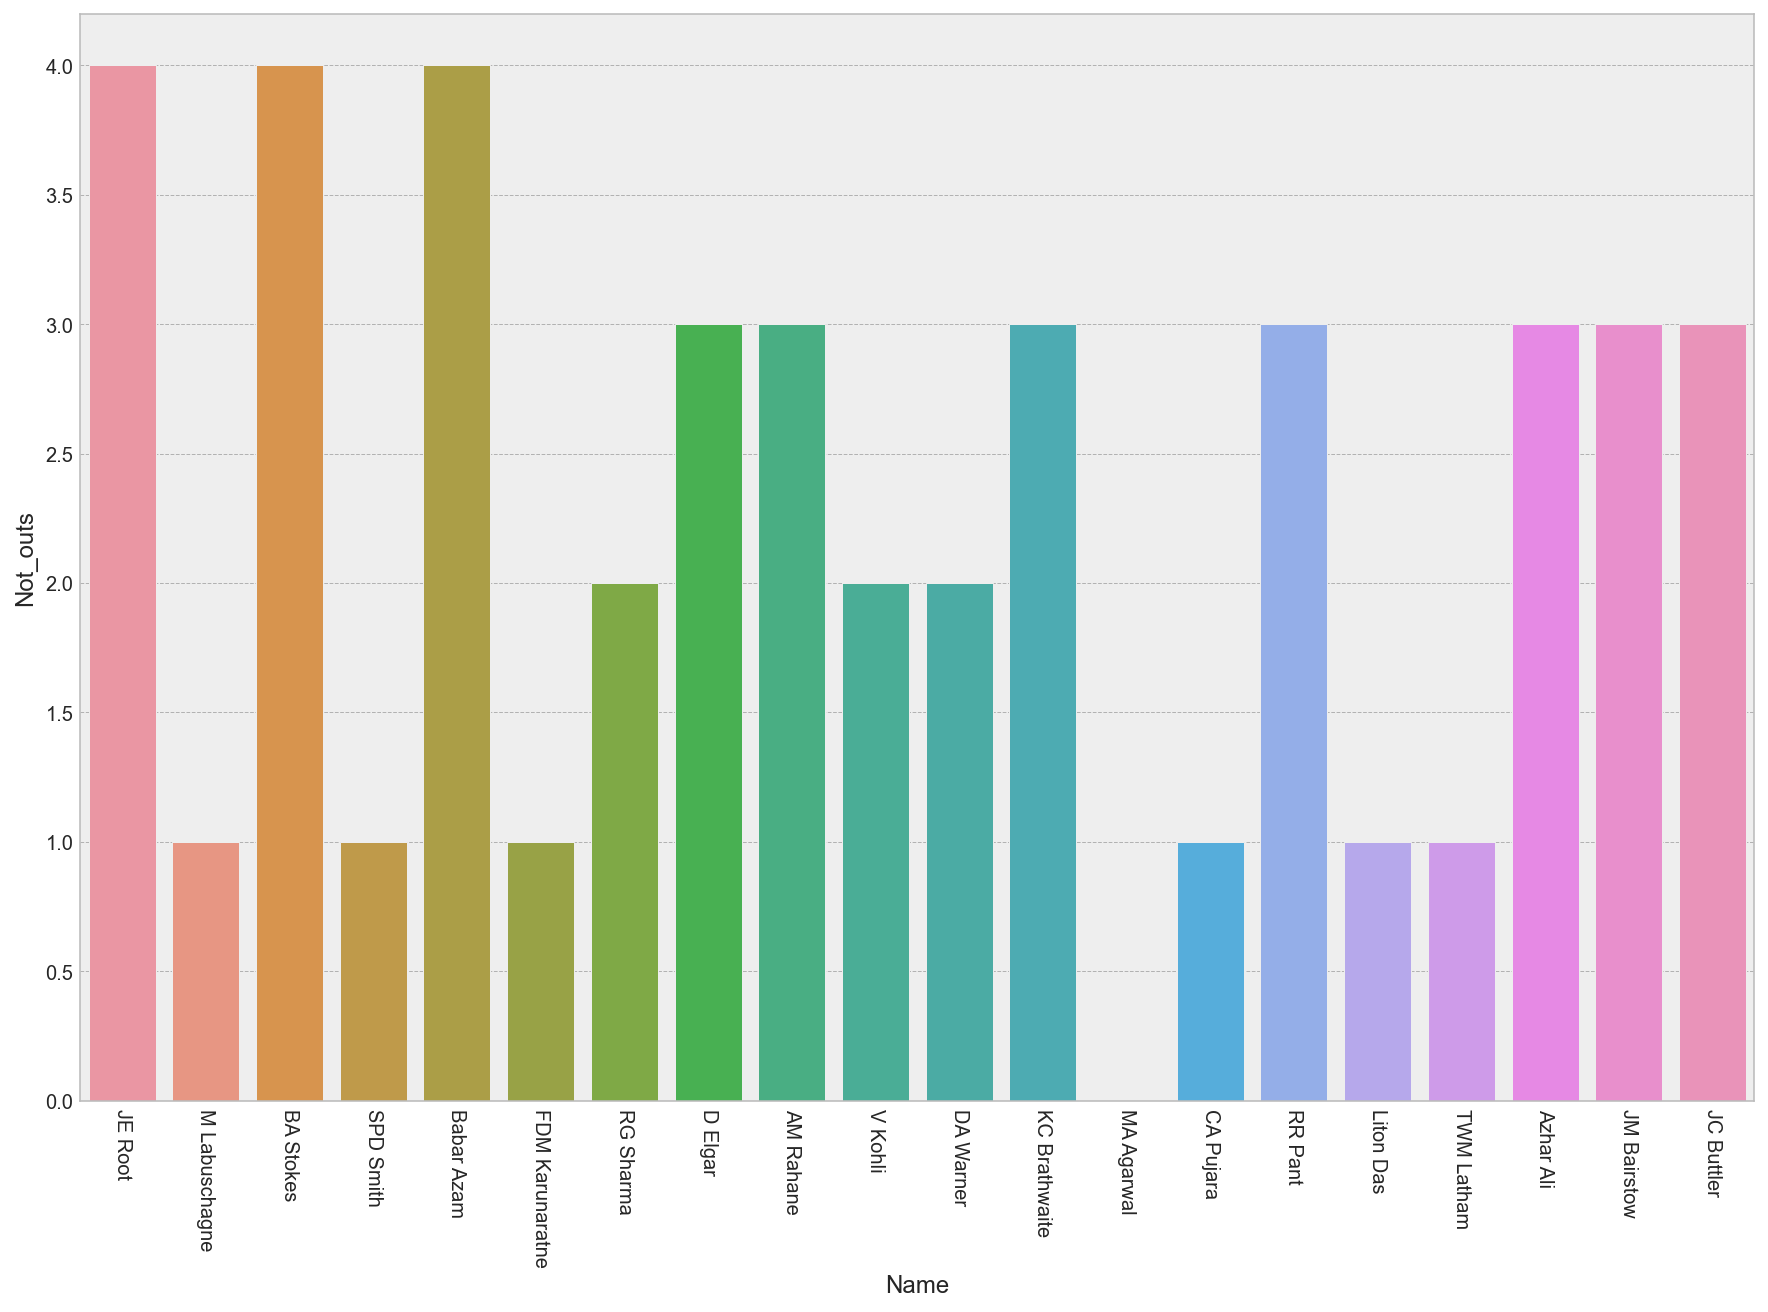

In [21]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Not_outs', );

### Runs

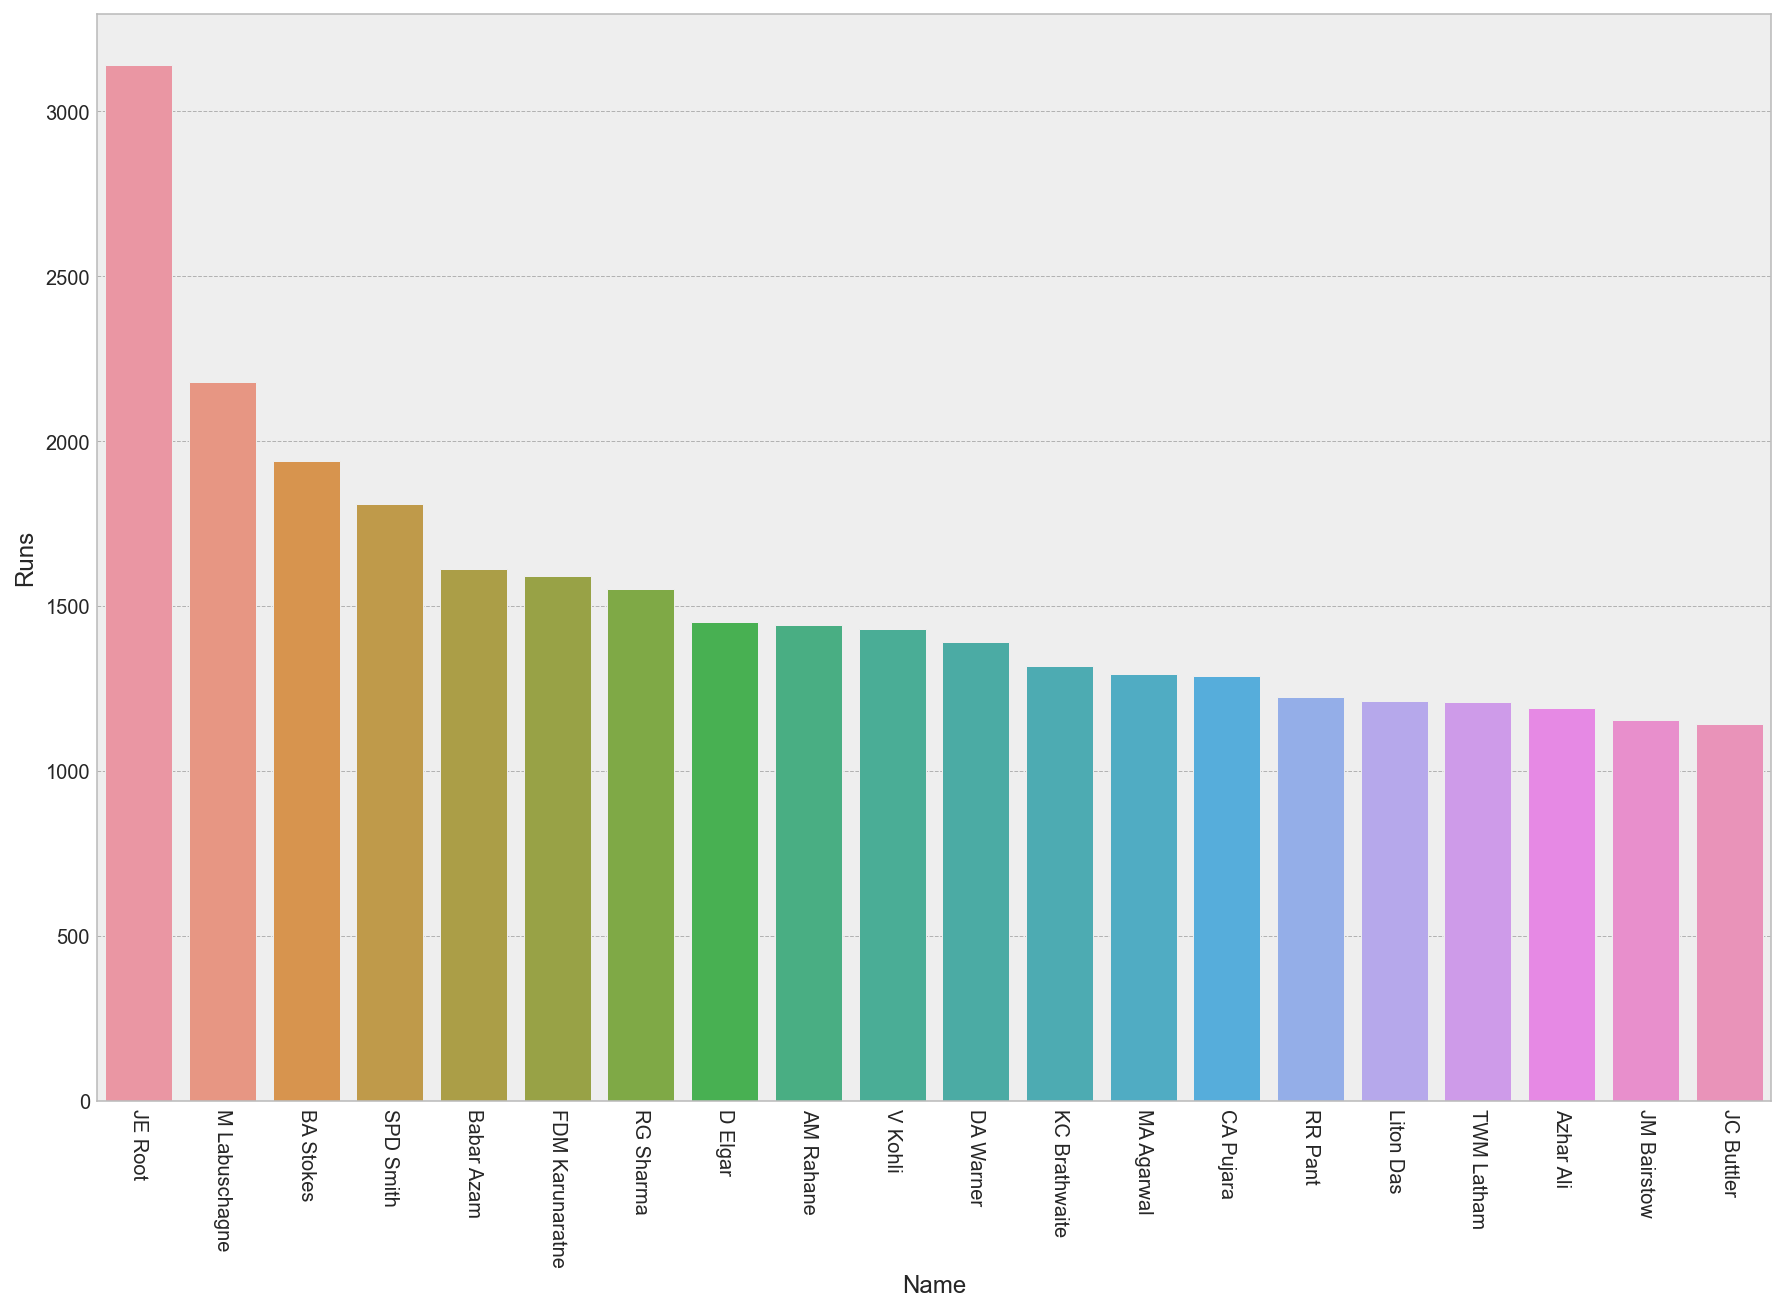

In [22]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Runs', );

### Highest Score

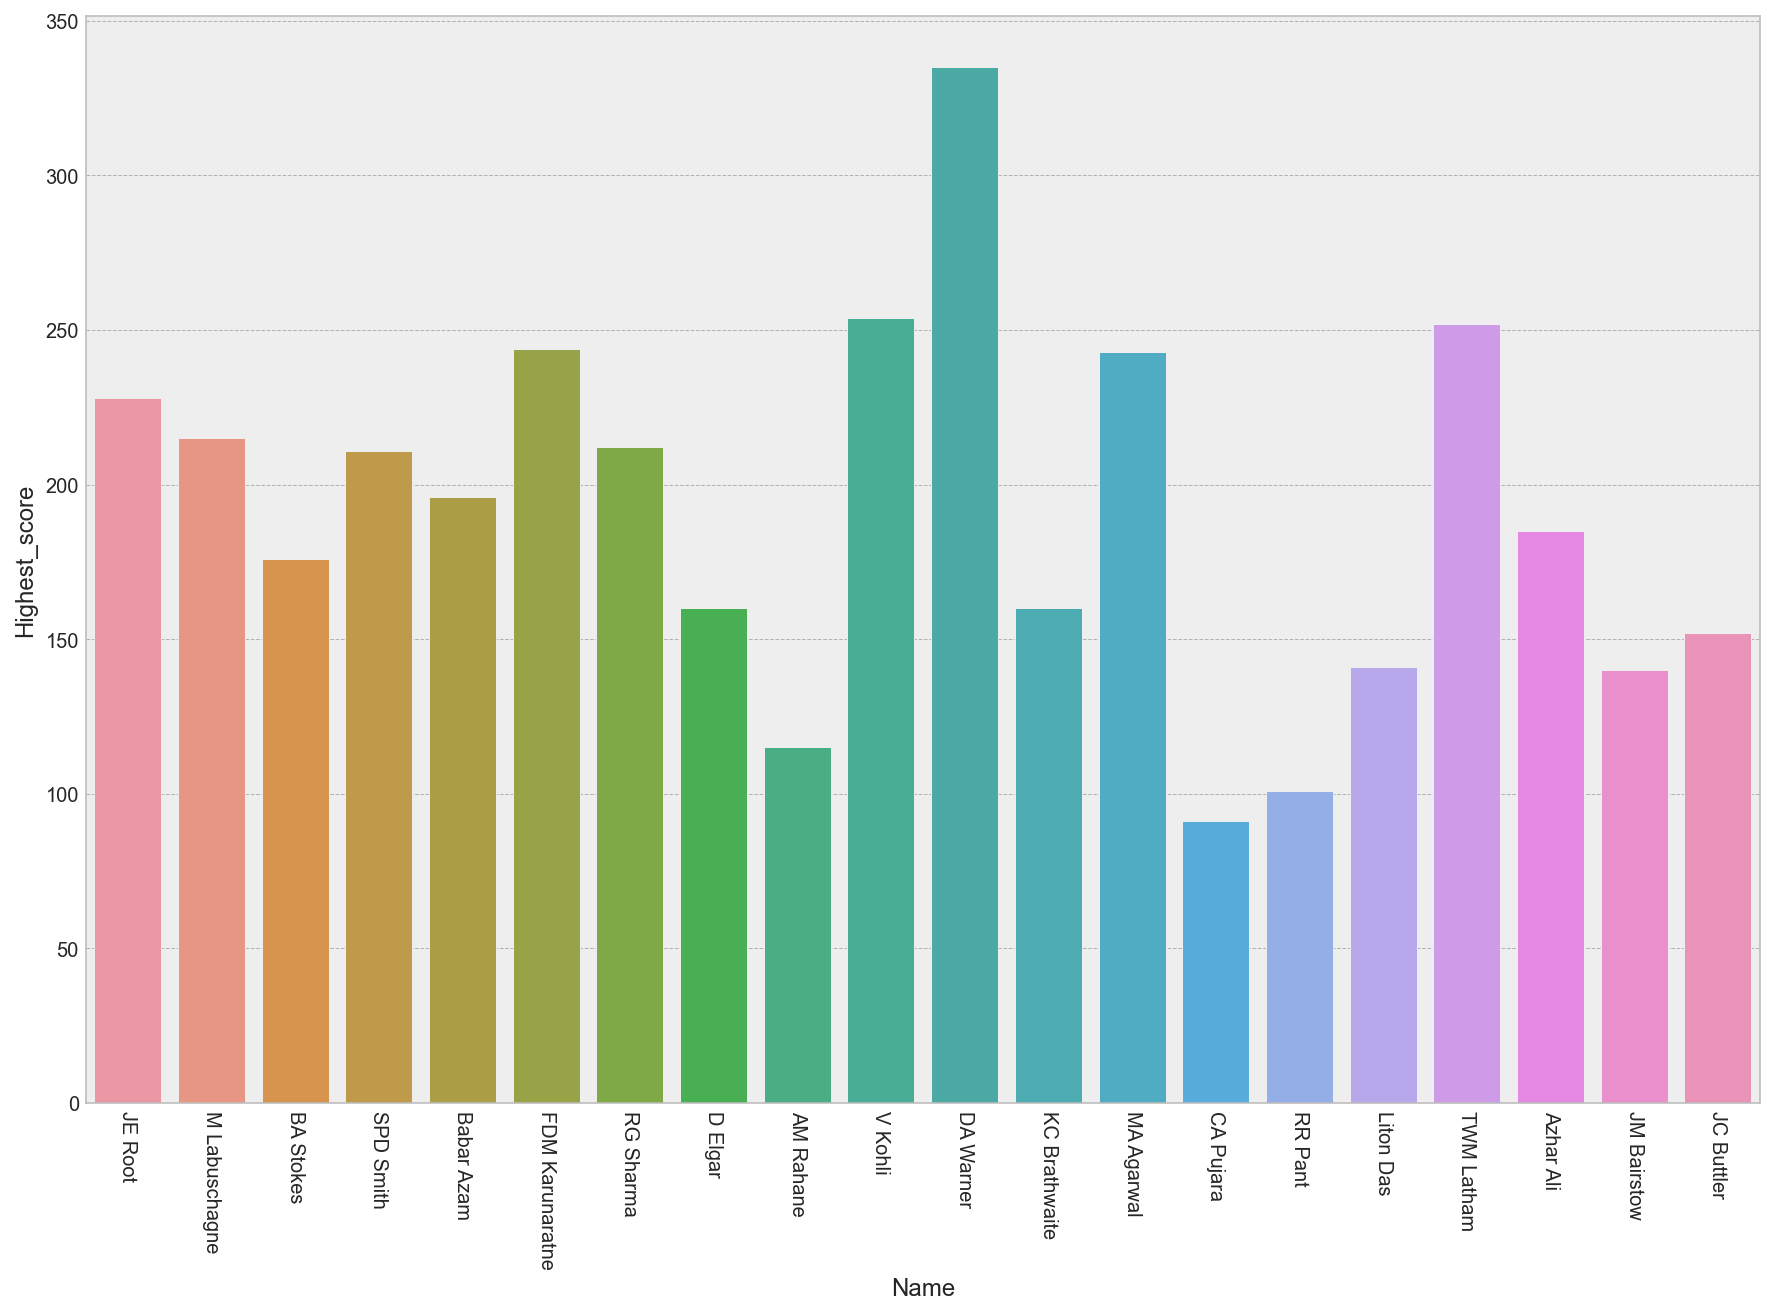

In [23]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Highest_score', );

### Average

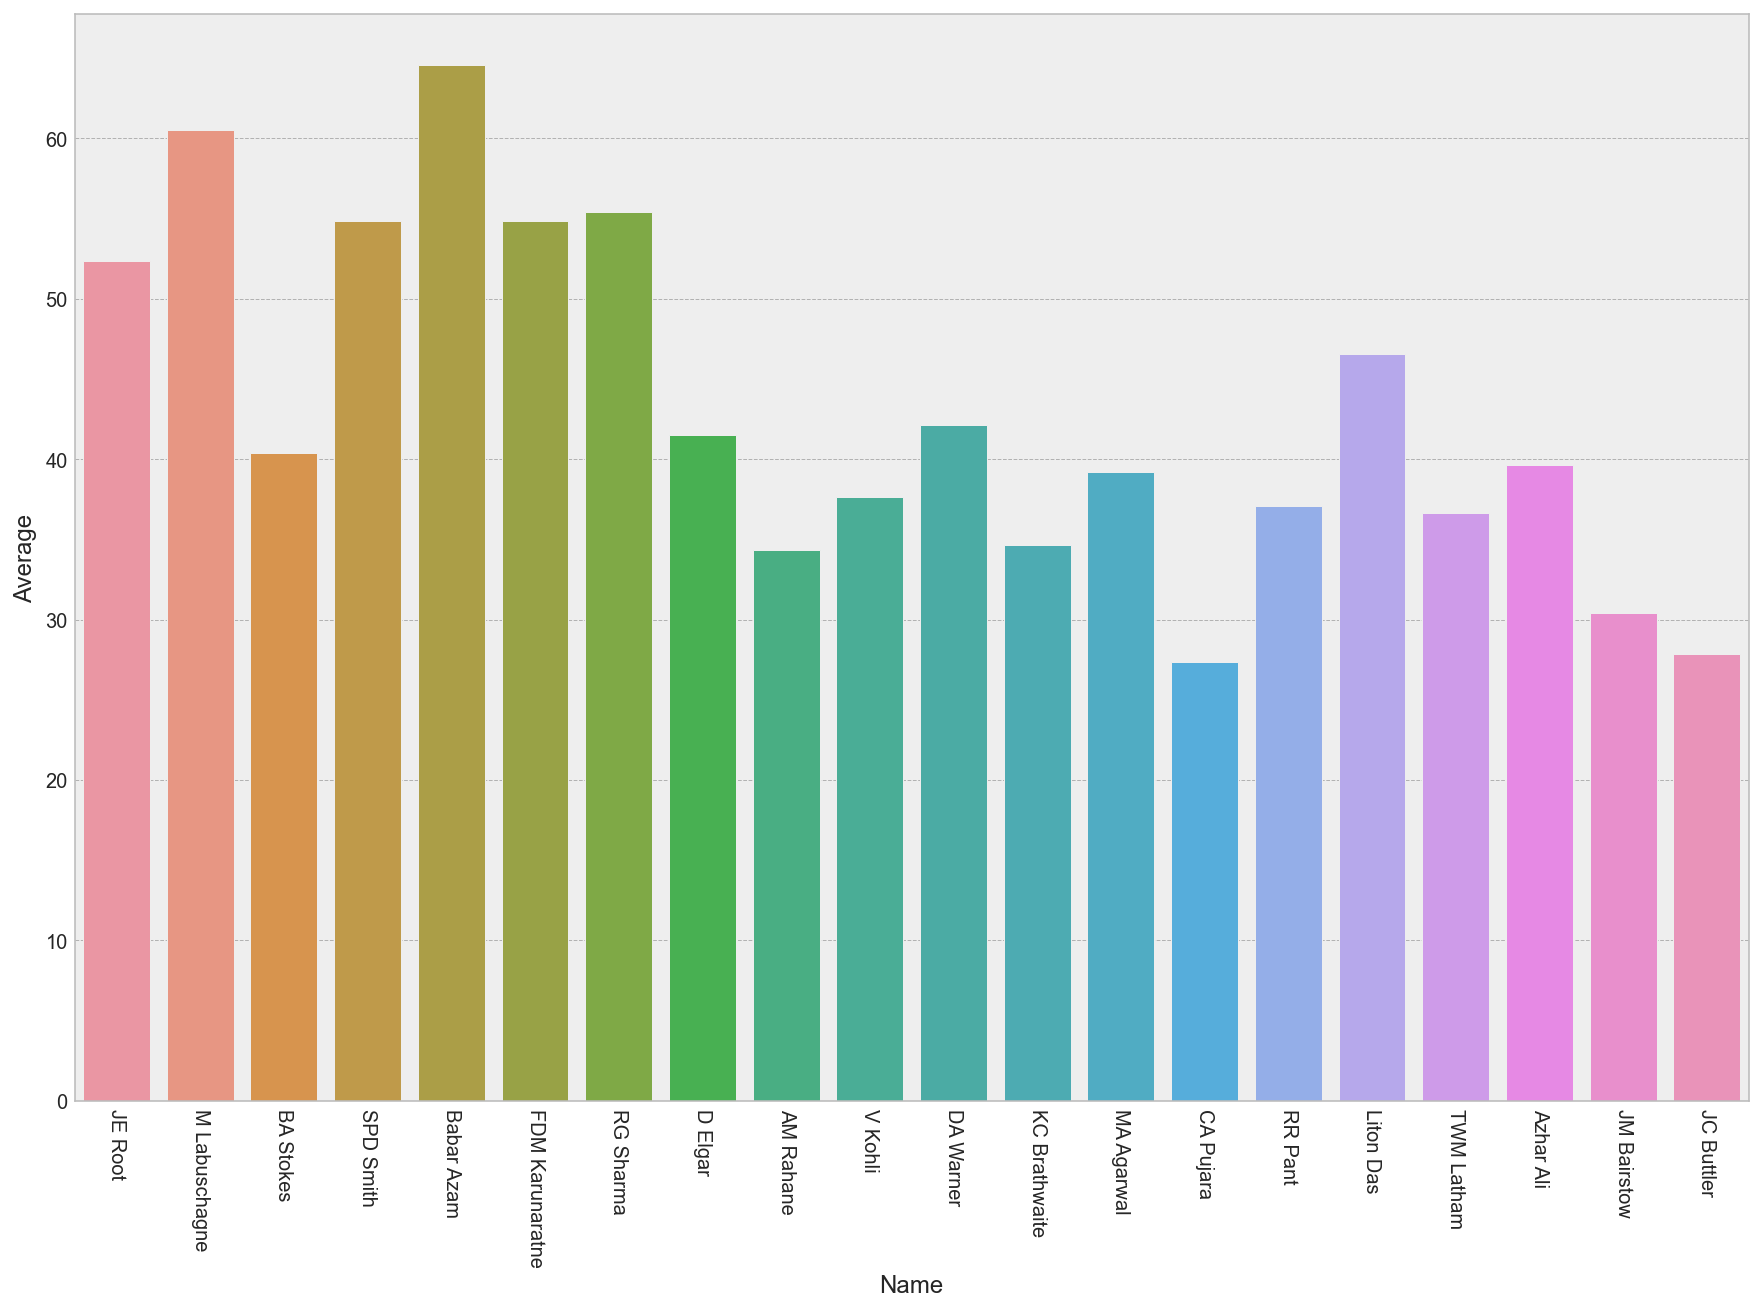

In [24]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Average', );

### Bowles faced

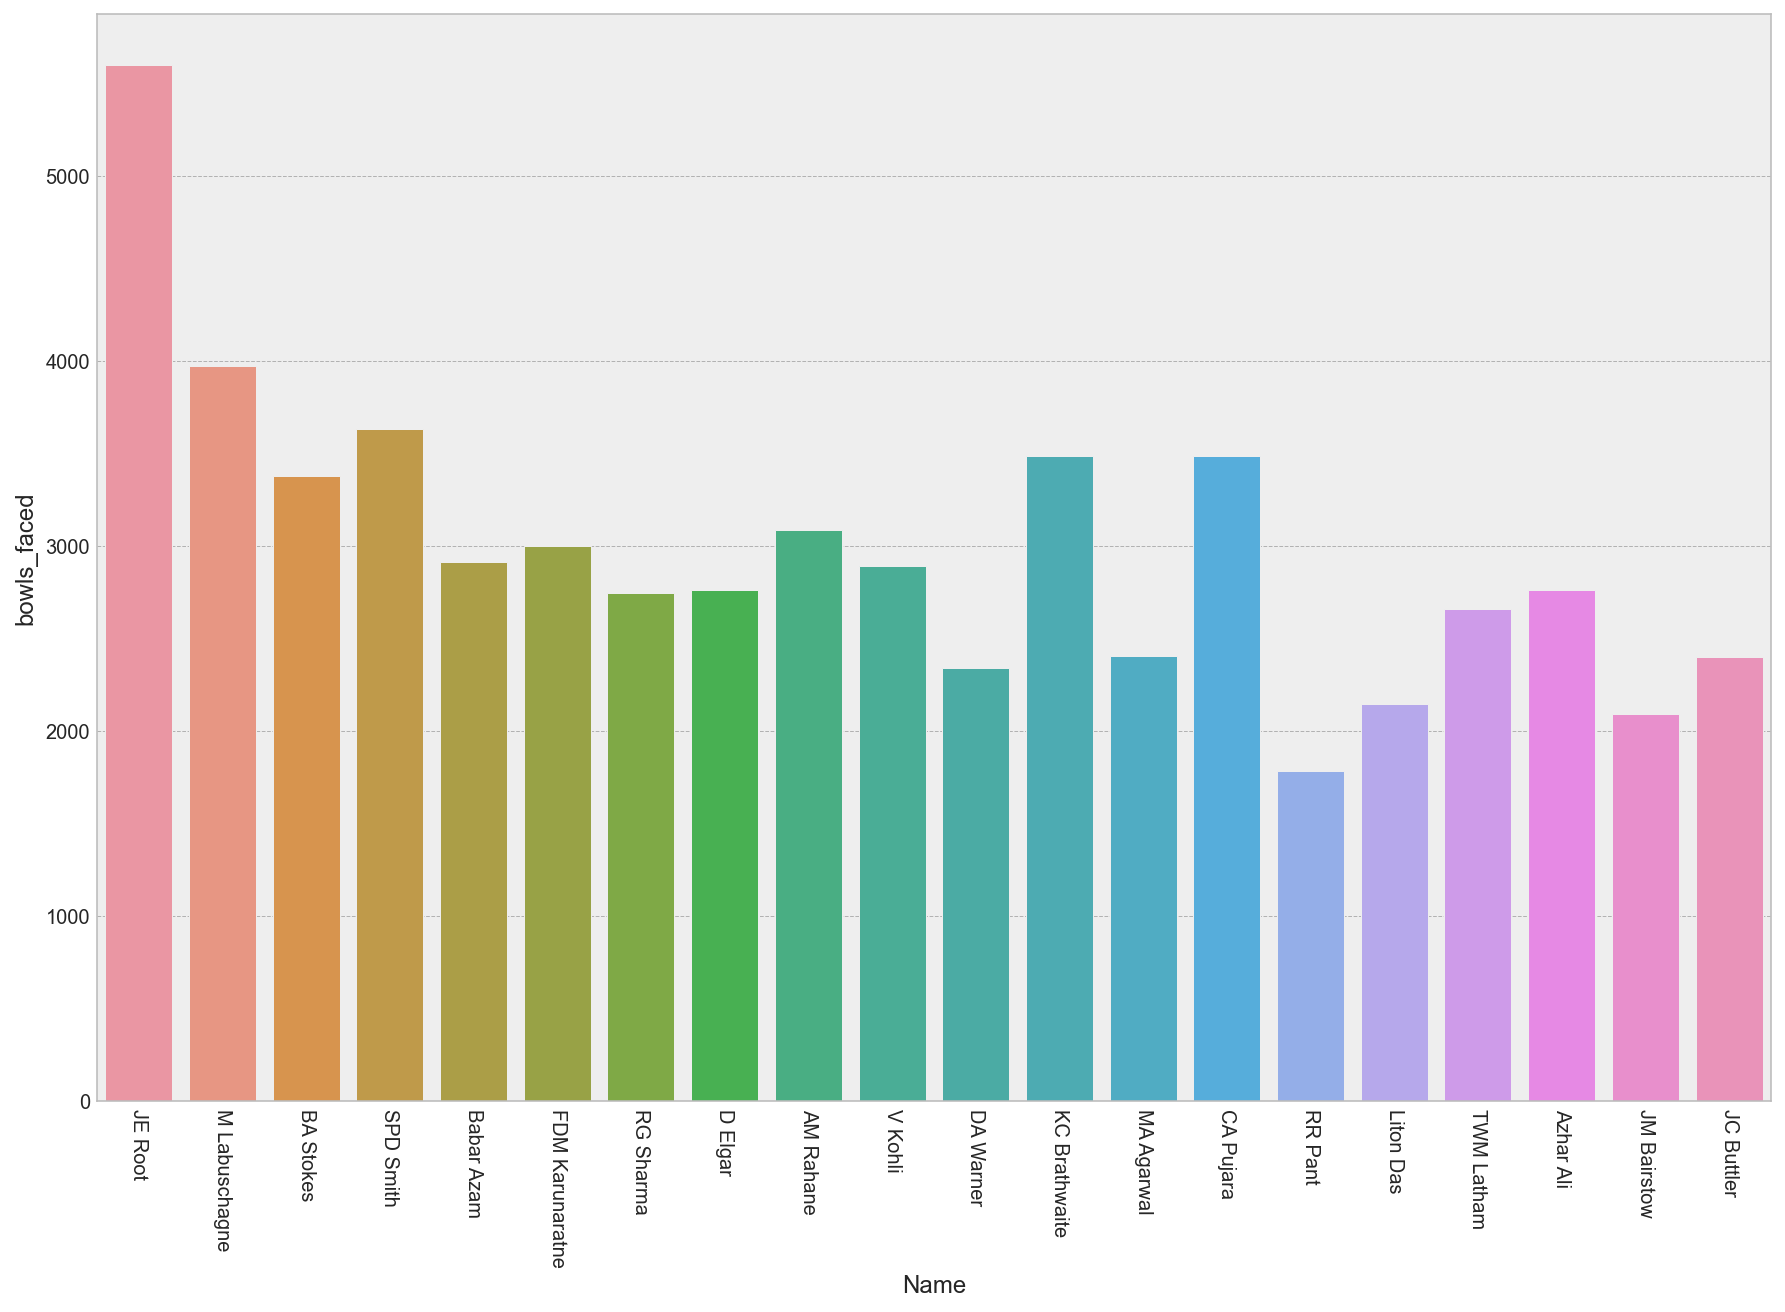

In [25]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'bowls_faced', );

### Strike_rate

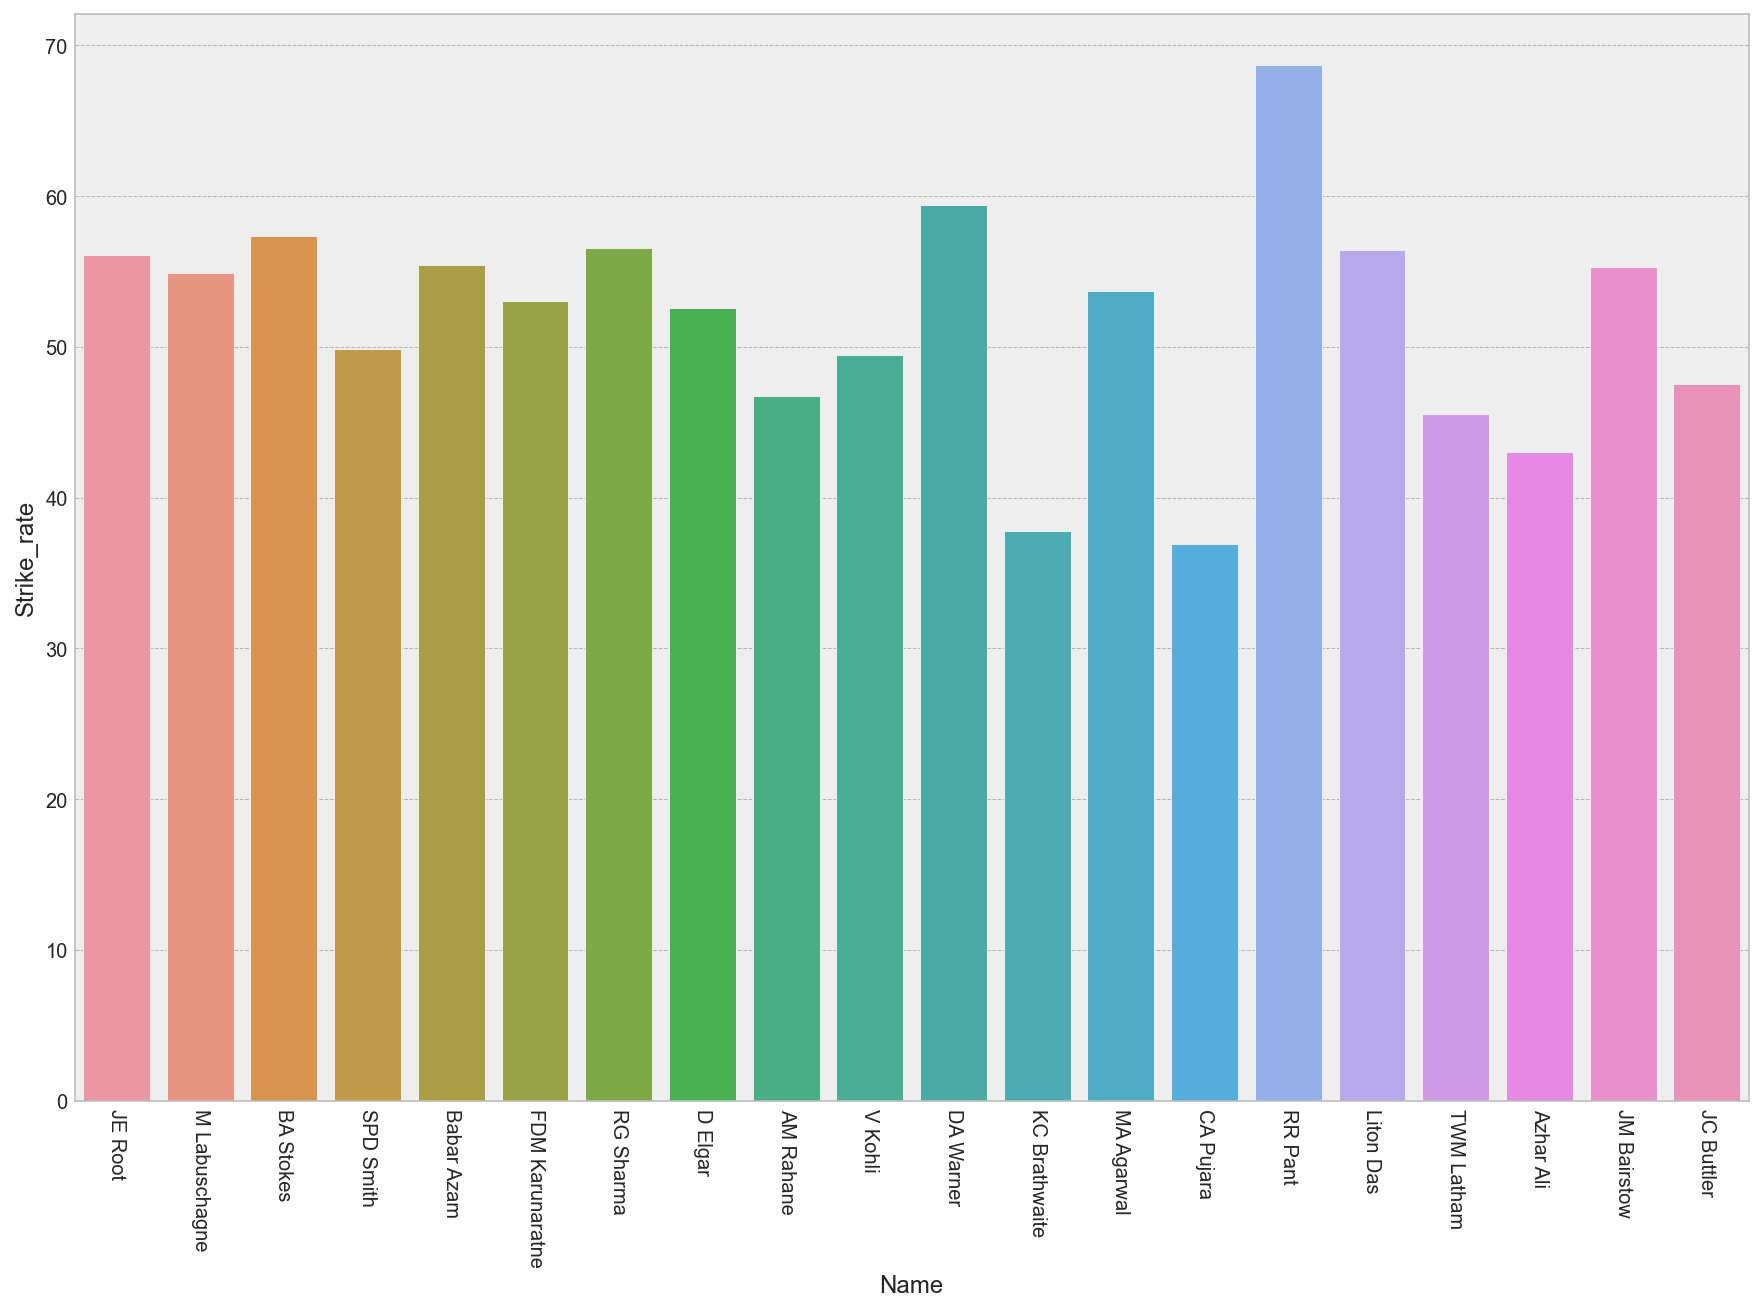

In [26]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Strike_rate', );

### Hunderds

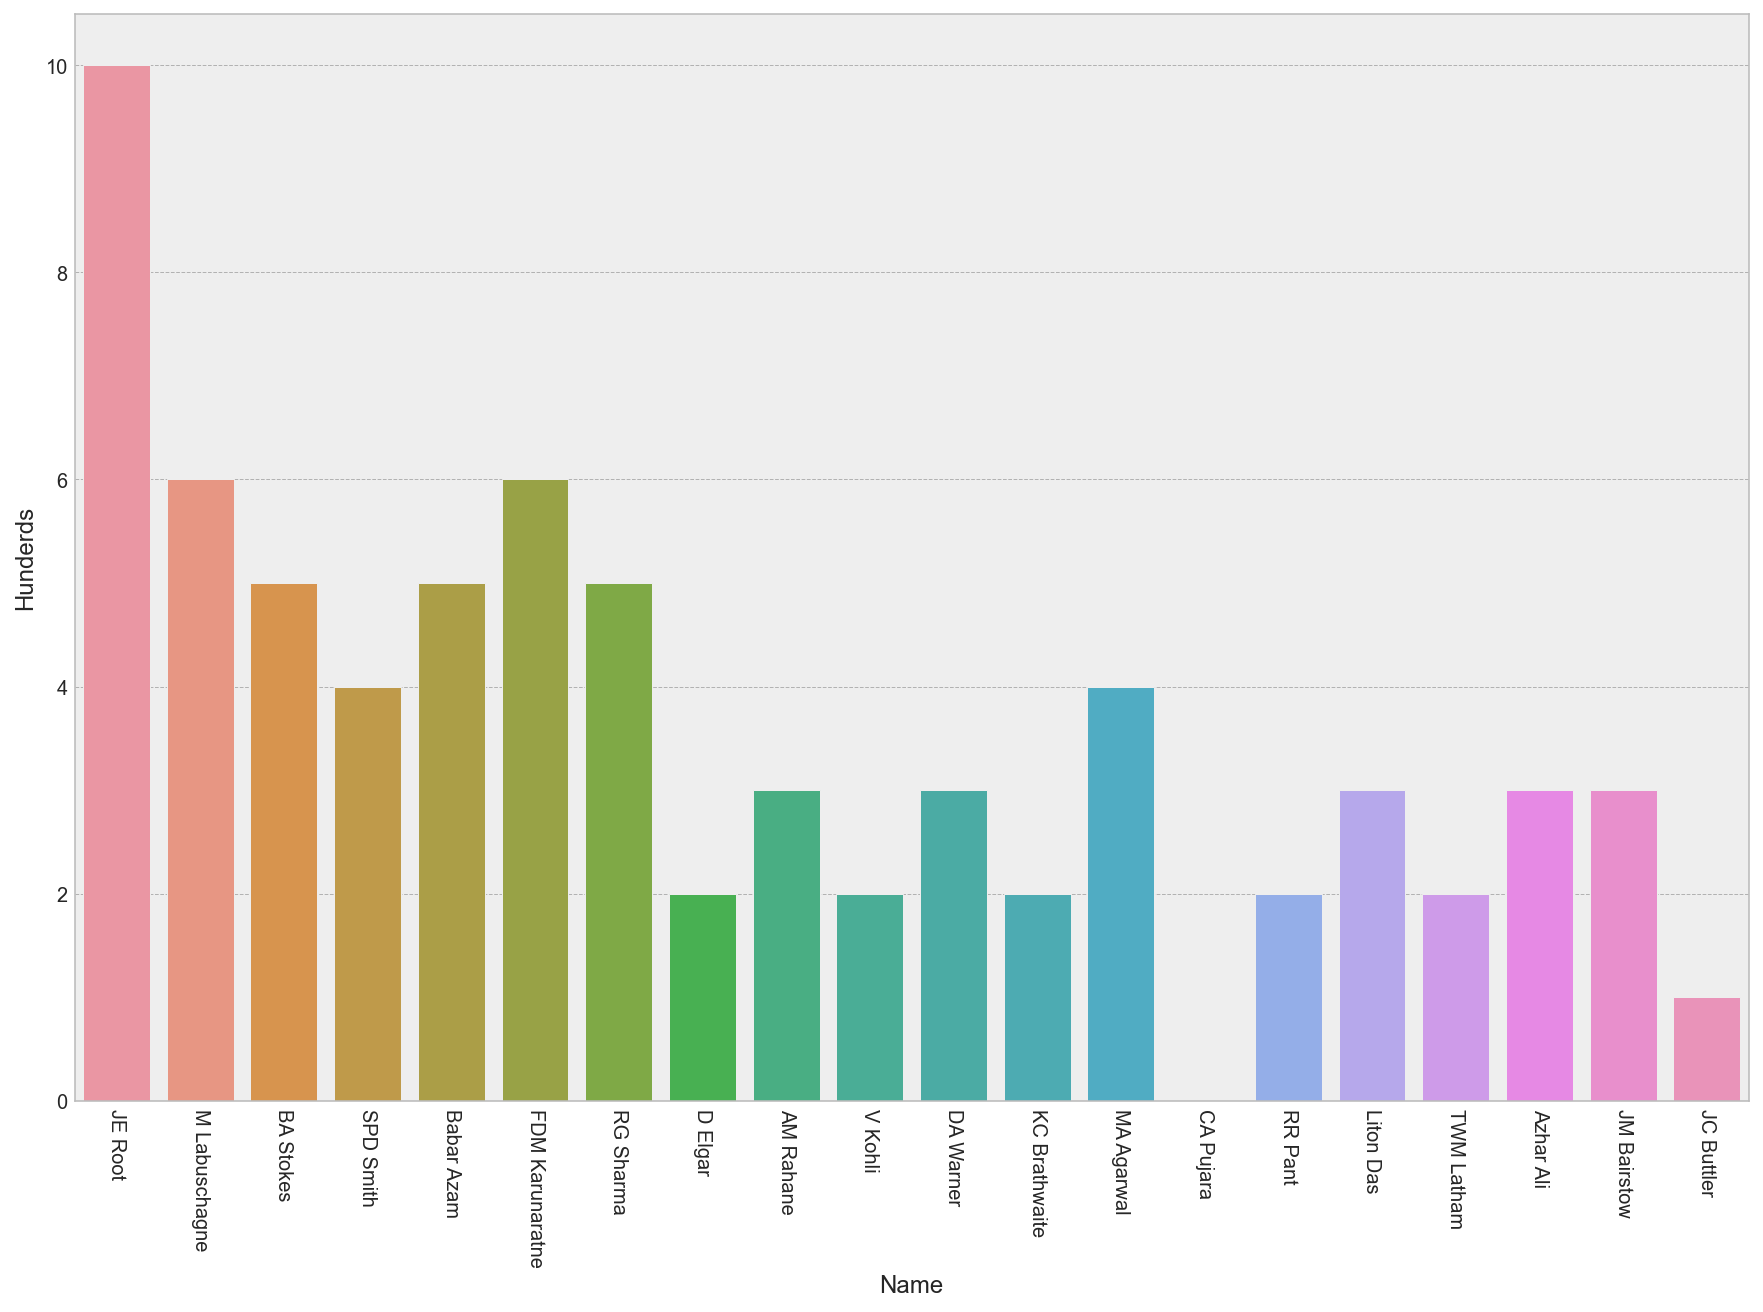

In [27]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Hunderds', );

### Fifties

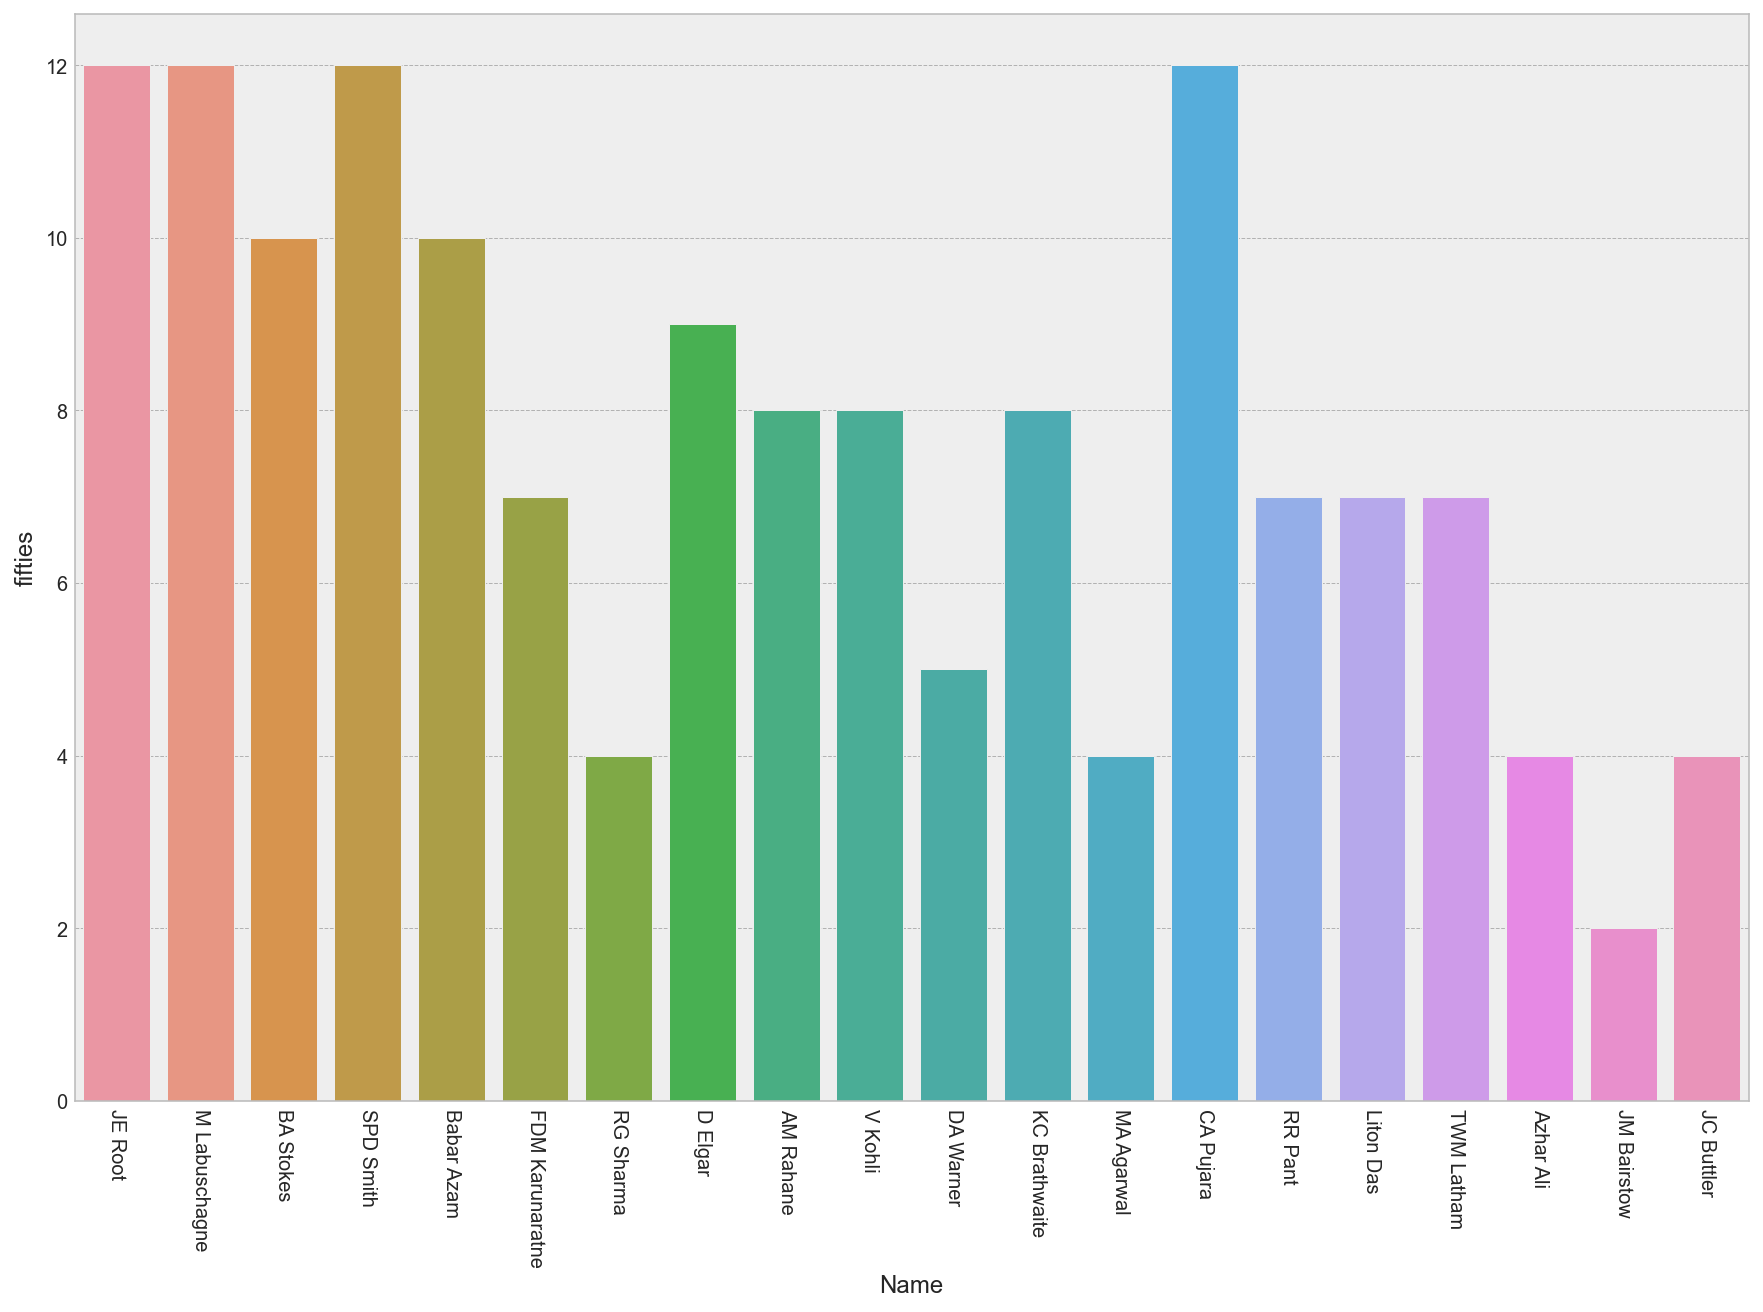

In [28]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'fifties', );

### Ducks

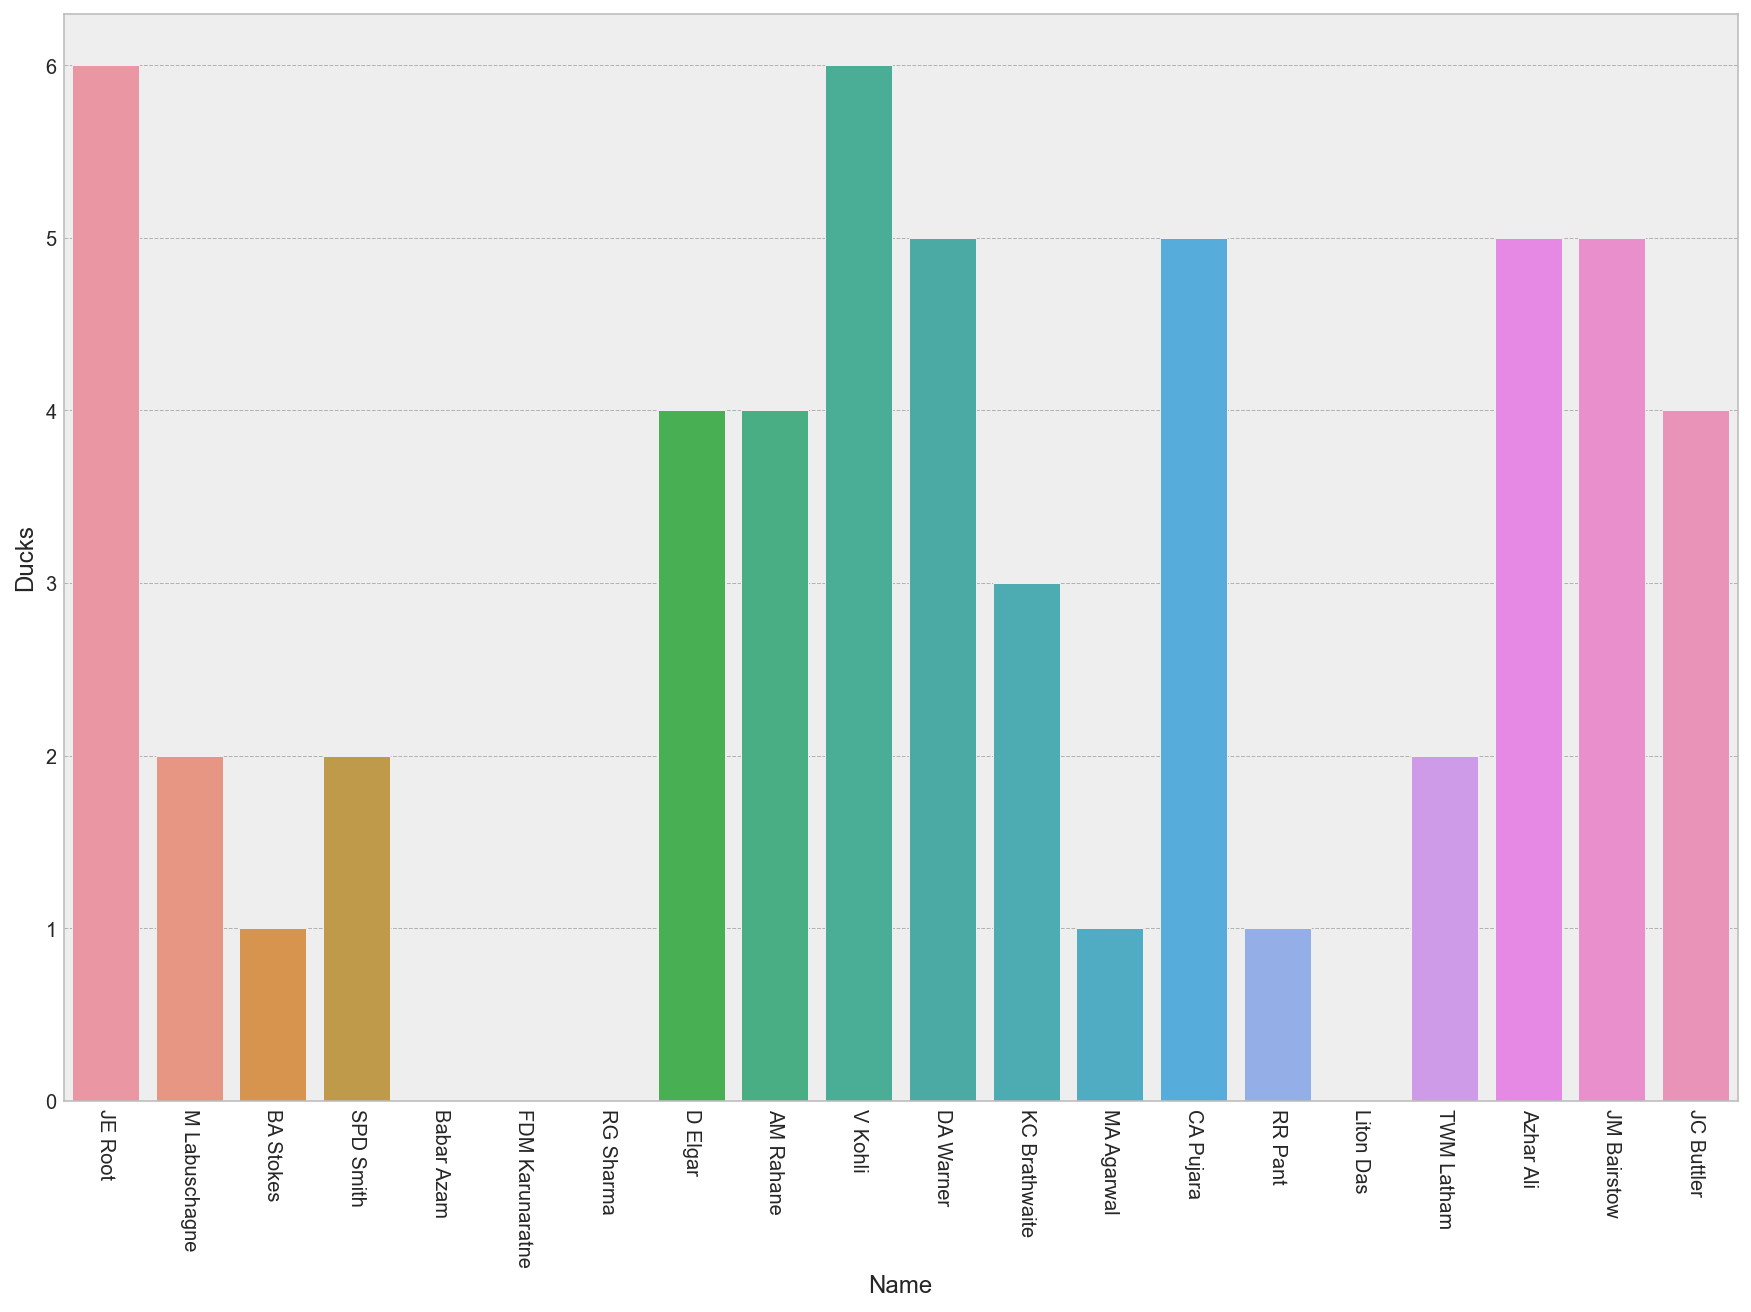

In [29]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Ducks', );

### Fours

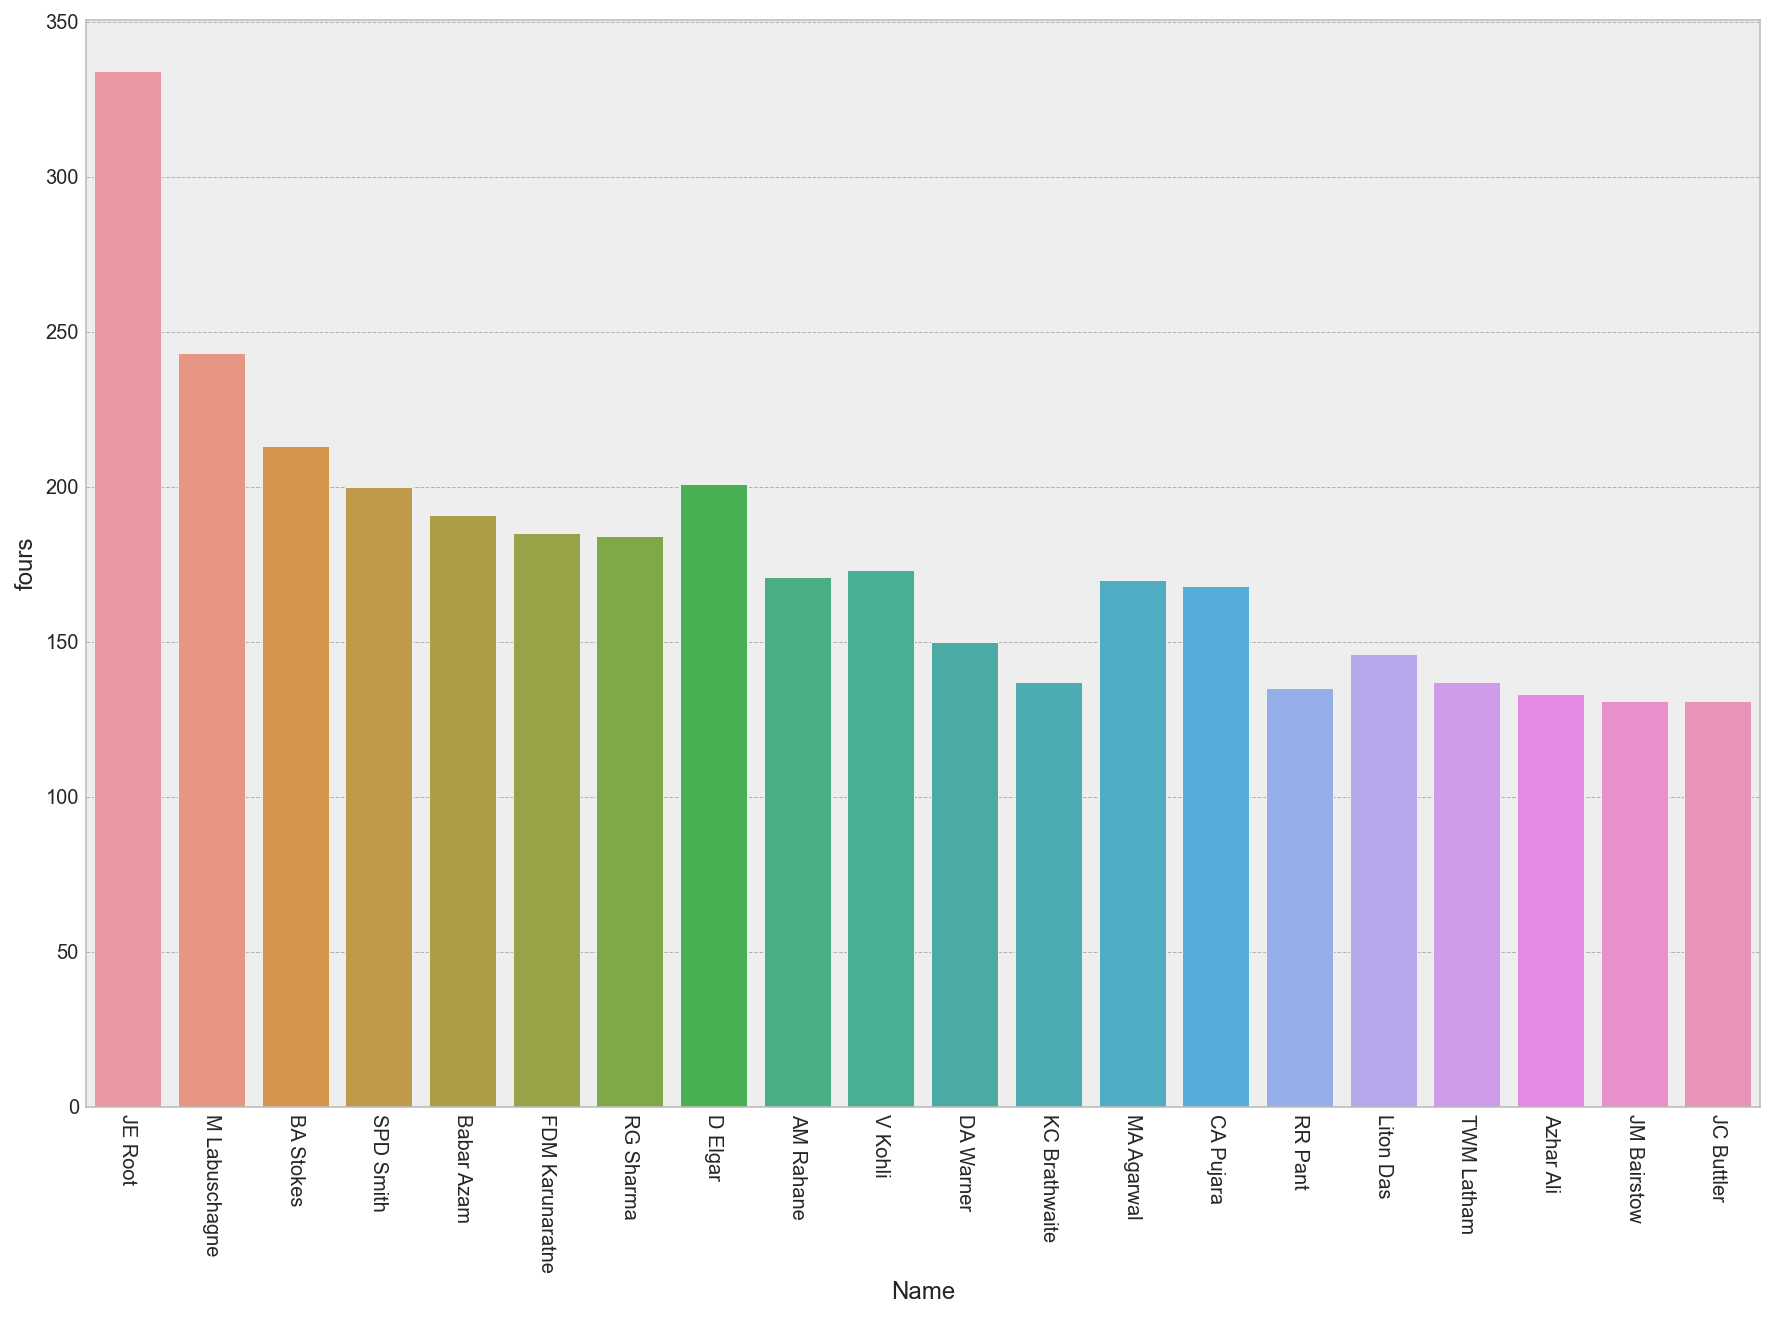

In [30]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'fours', );

### Sixes

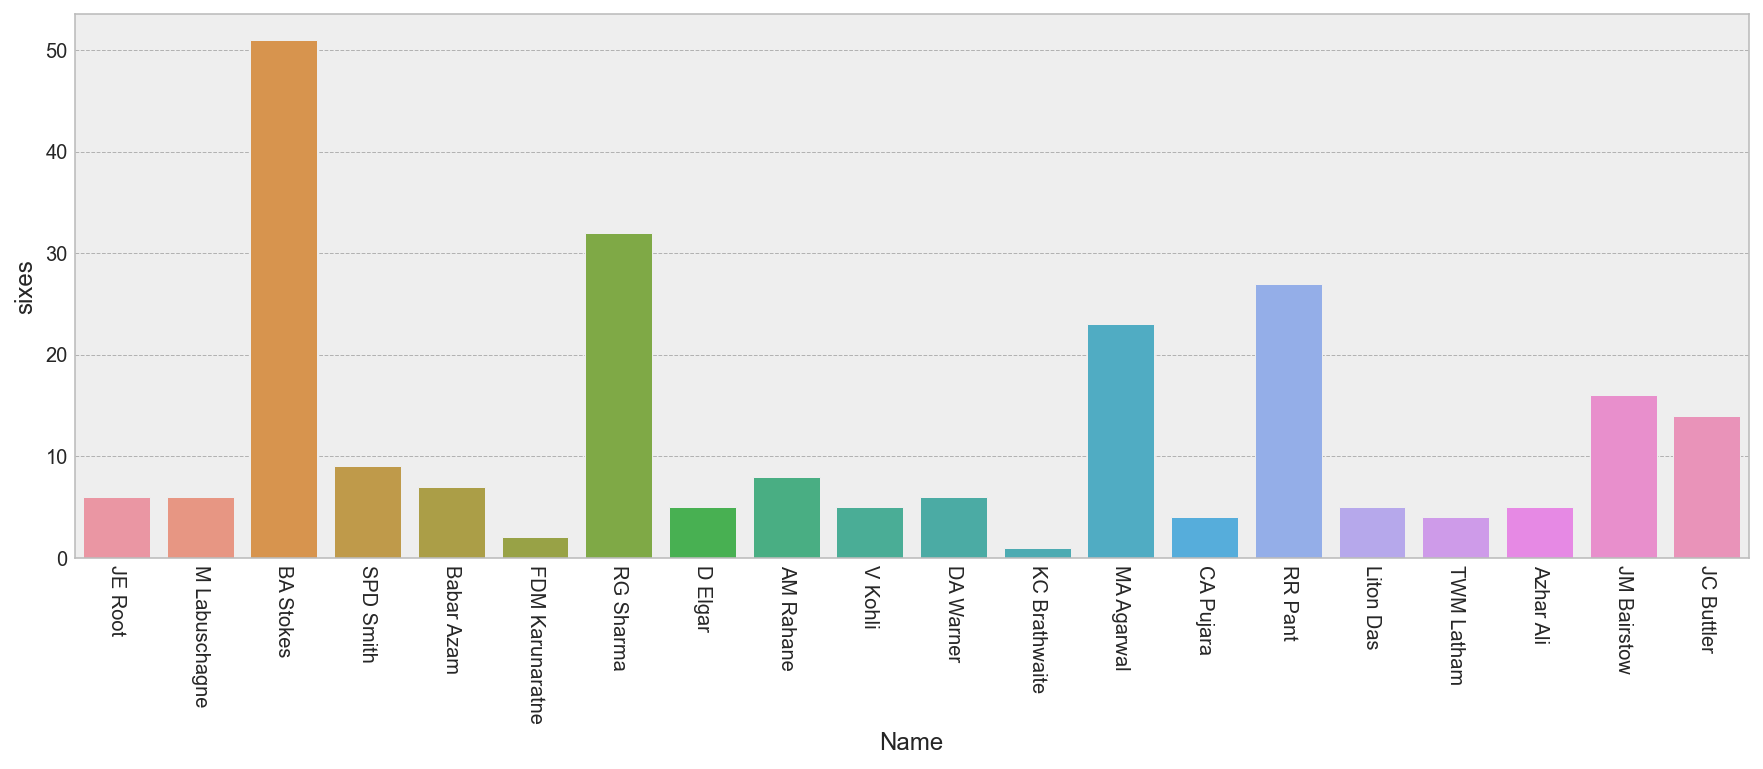

In [31]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'sixes', );

### Team wise total number of playes

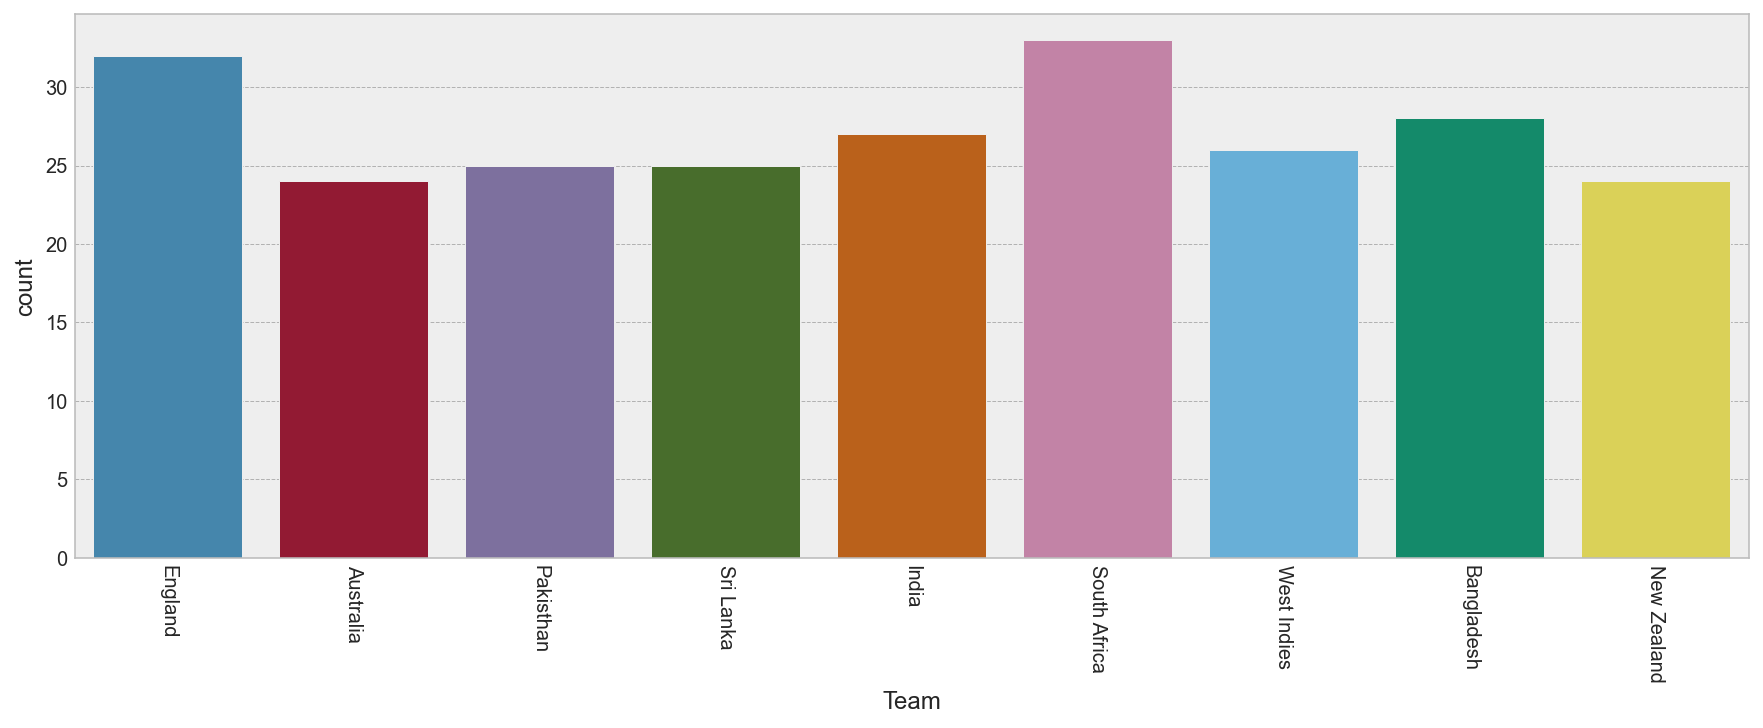

In [32]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 270)
sns.countplot(data = Icc_WTC_Batting_Stats, x = 'Team');

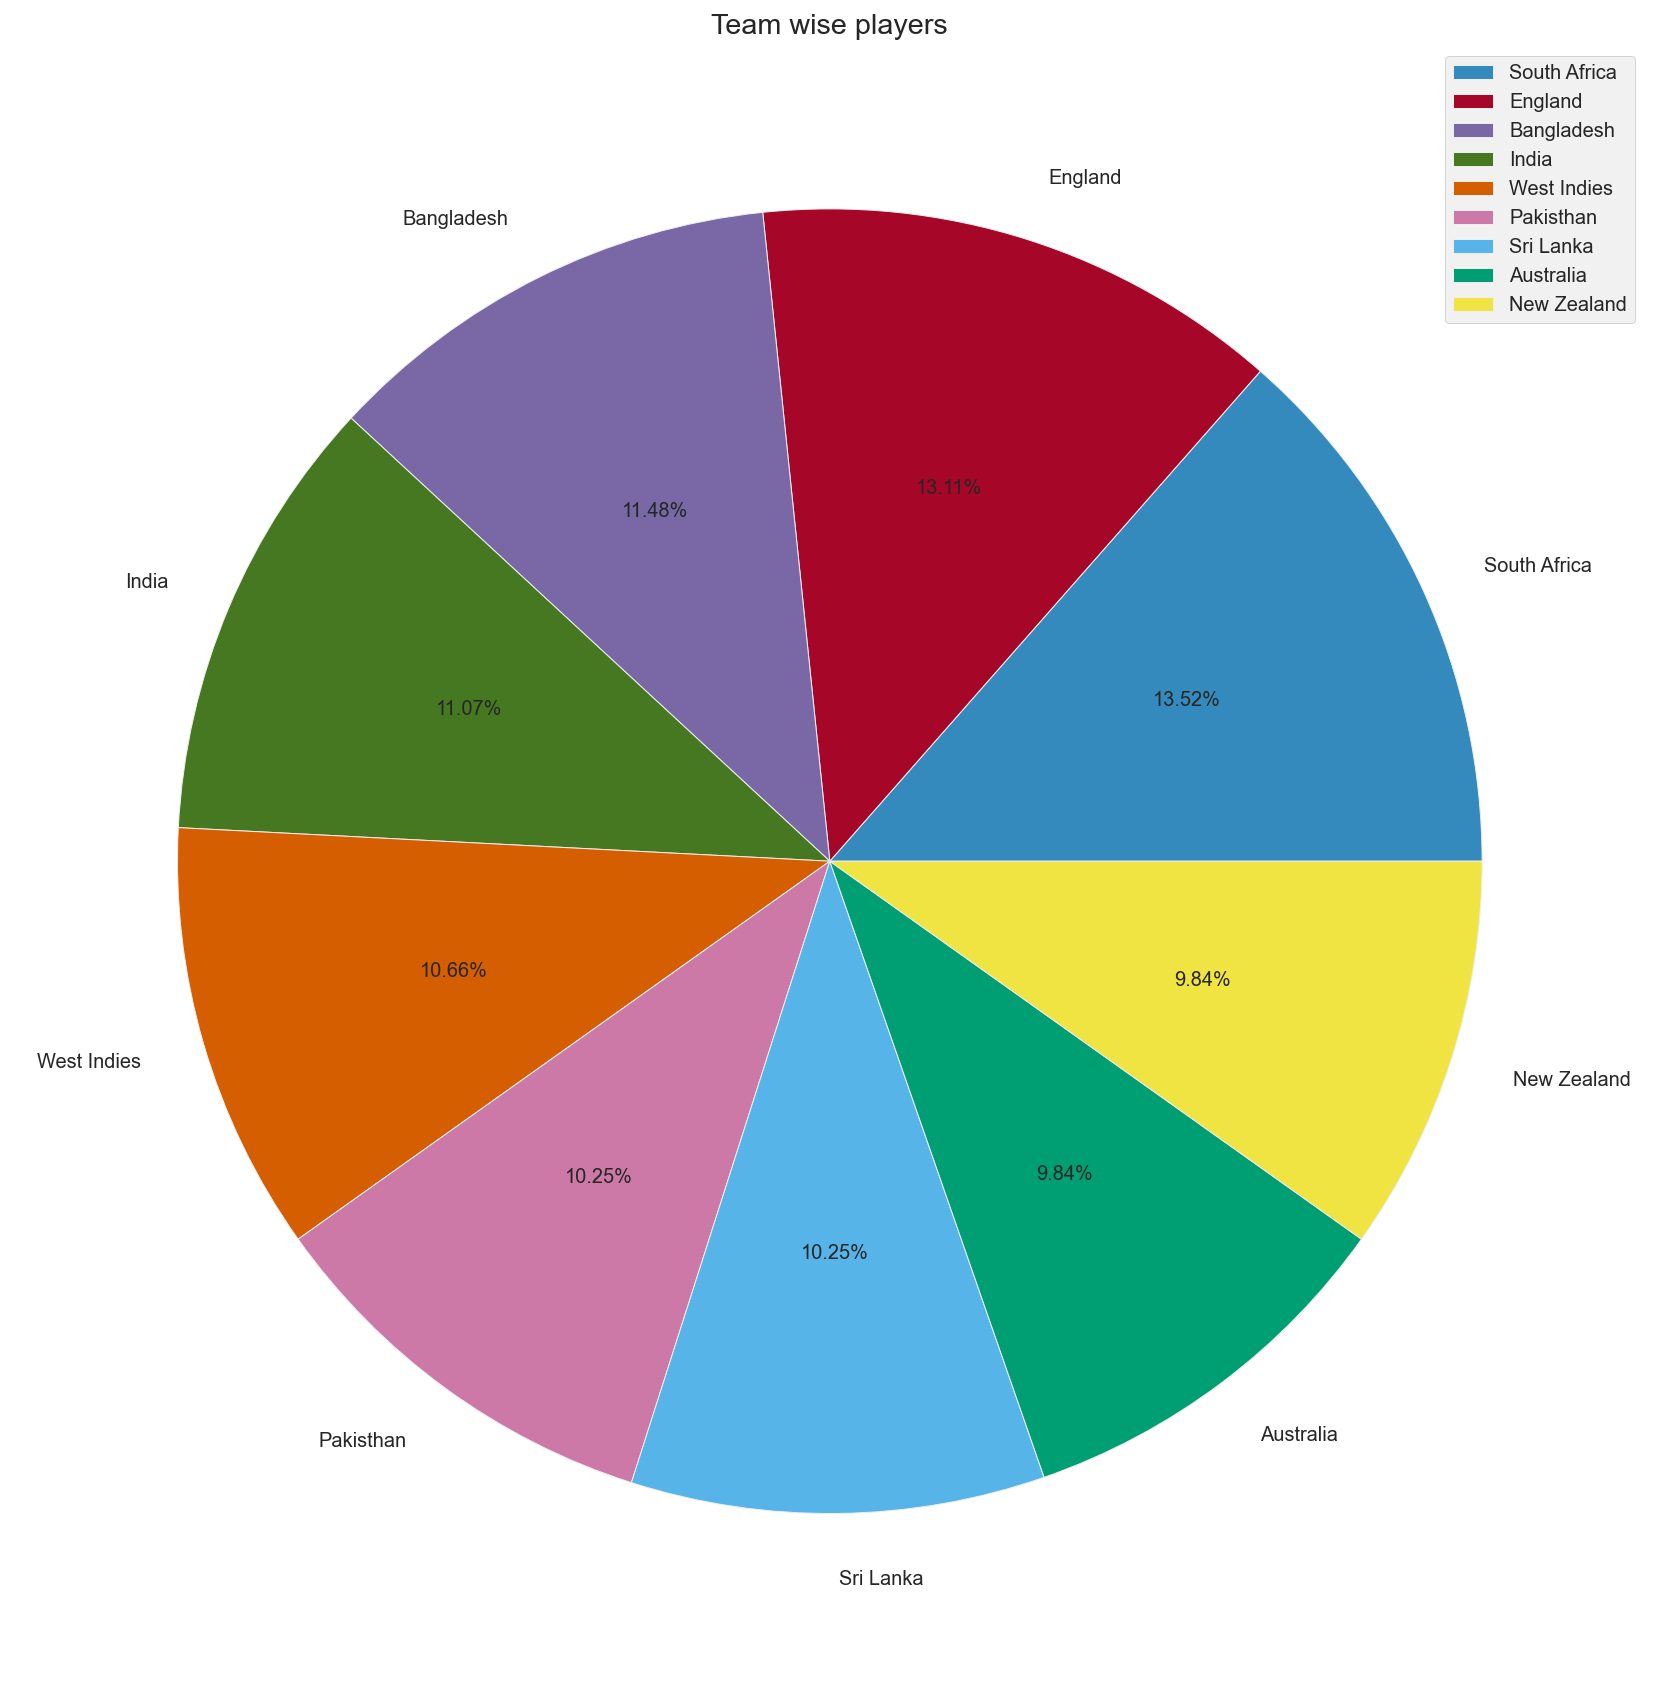

In [33]:
plt.figure(figsize=(15,15))
plt.pie(x = Icc_WTC_Batting_Stats.Team.value_counts().values,
       labels = Icc_WTC_Batting_Stats.Team.value_counts().index,
       autopct = '%.2f%%')
plt.title('Team wise players')
plt.legend();

### Correlation

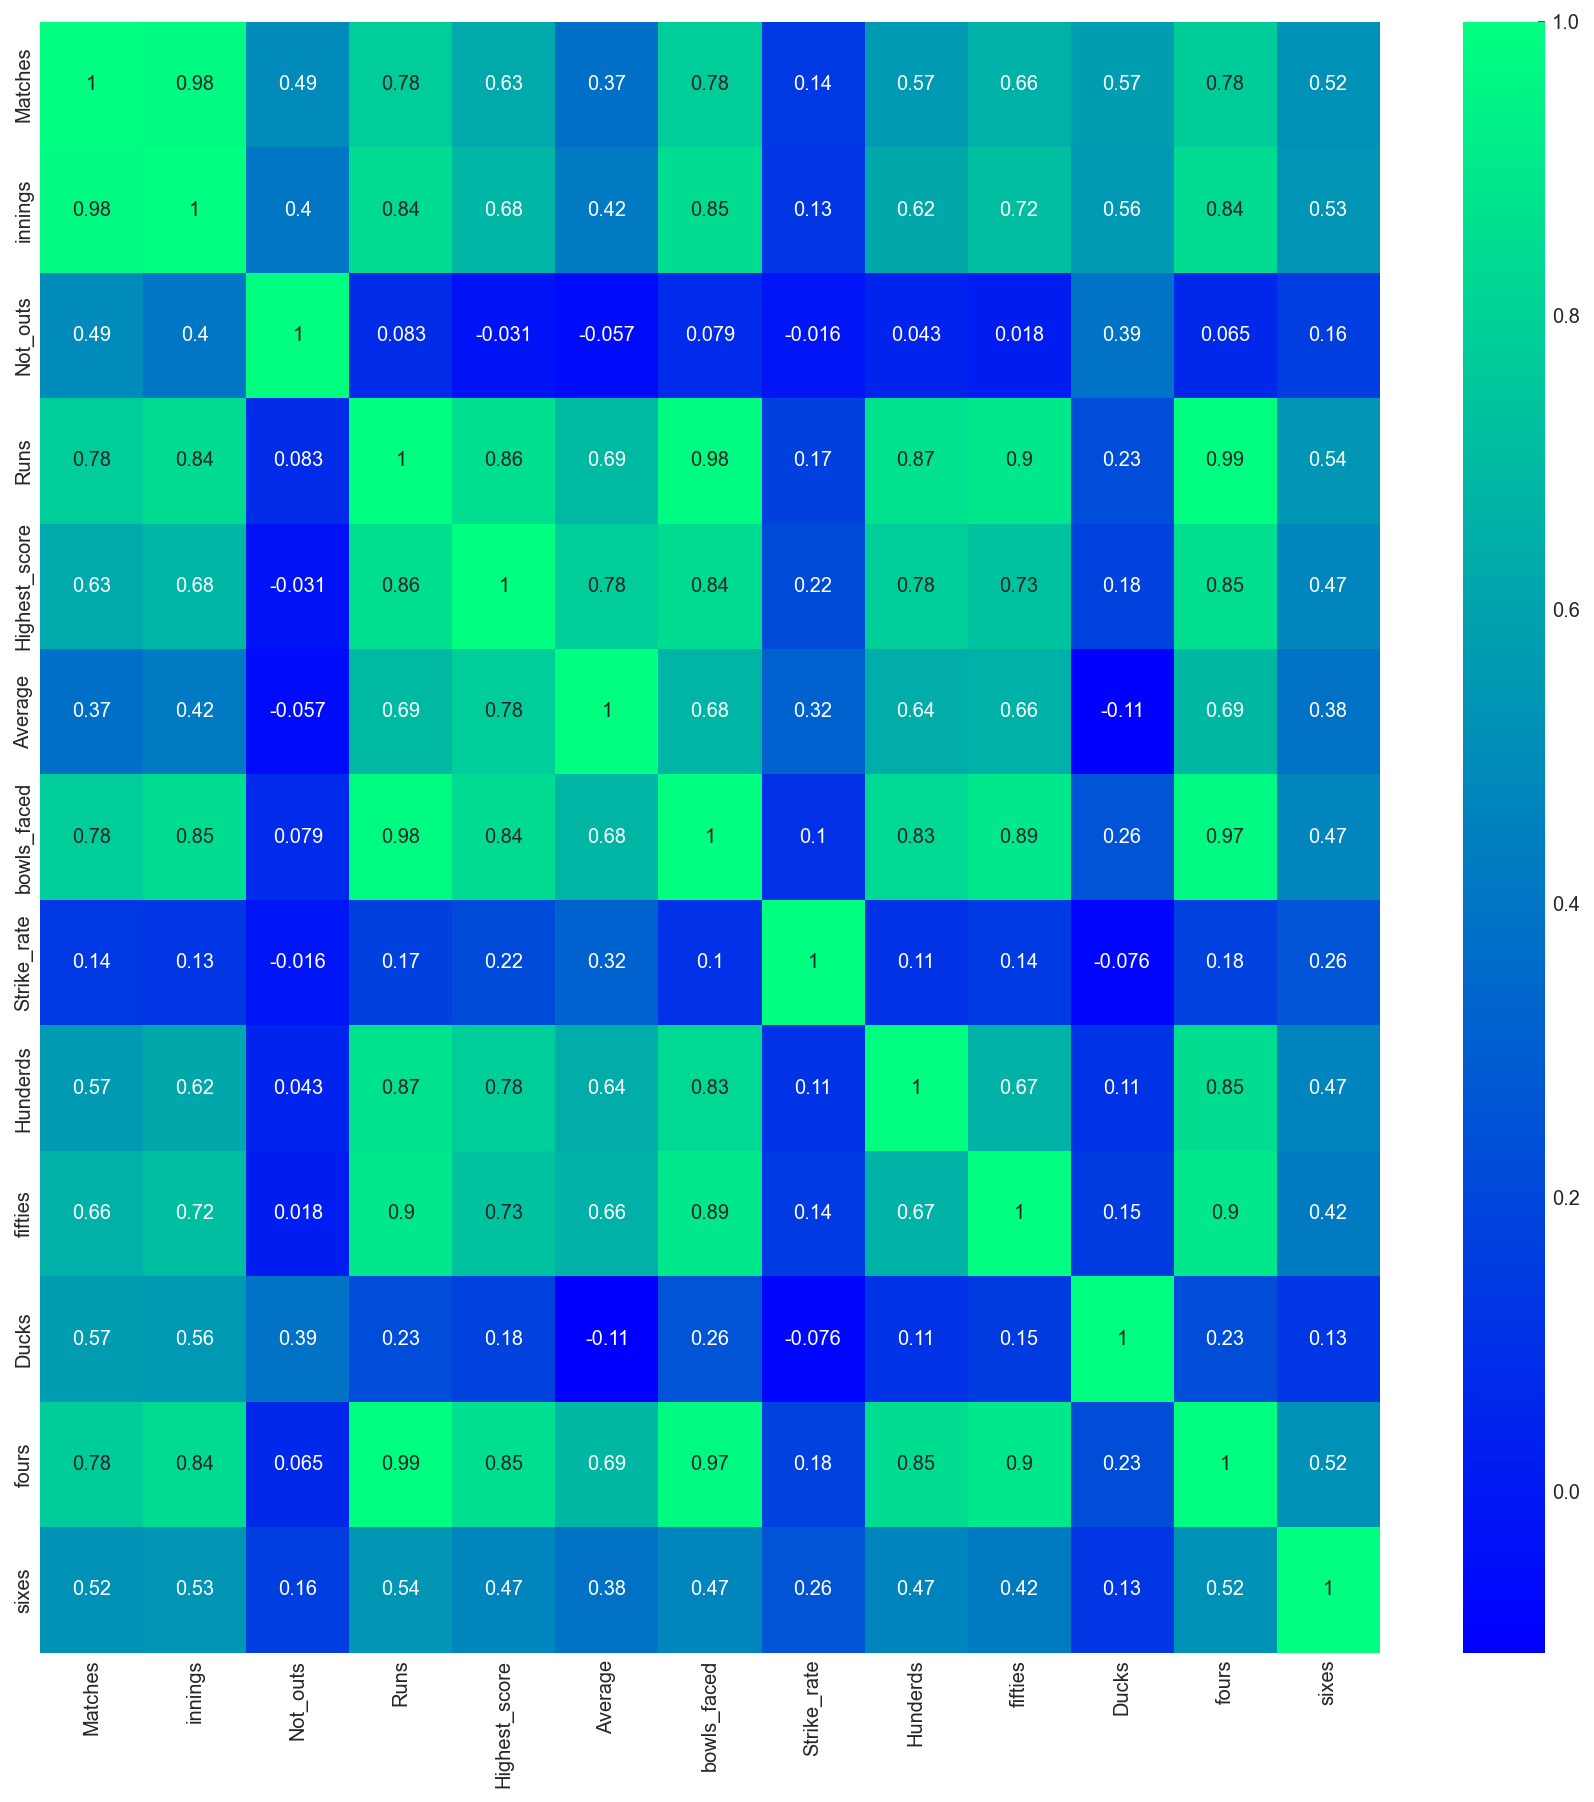

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(Icc_WTC_Batting_Stats.corr(), cmap = 'winter', annot=True);

### Matches vs Runs

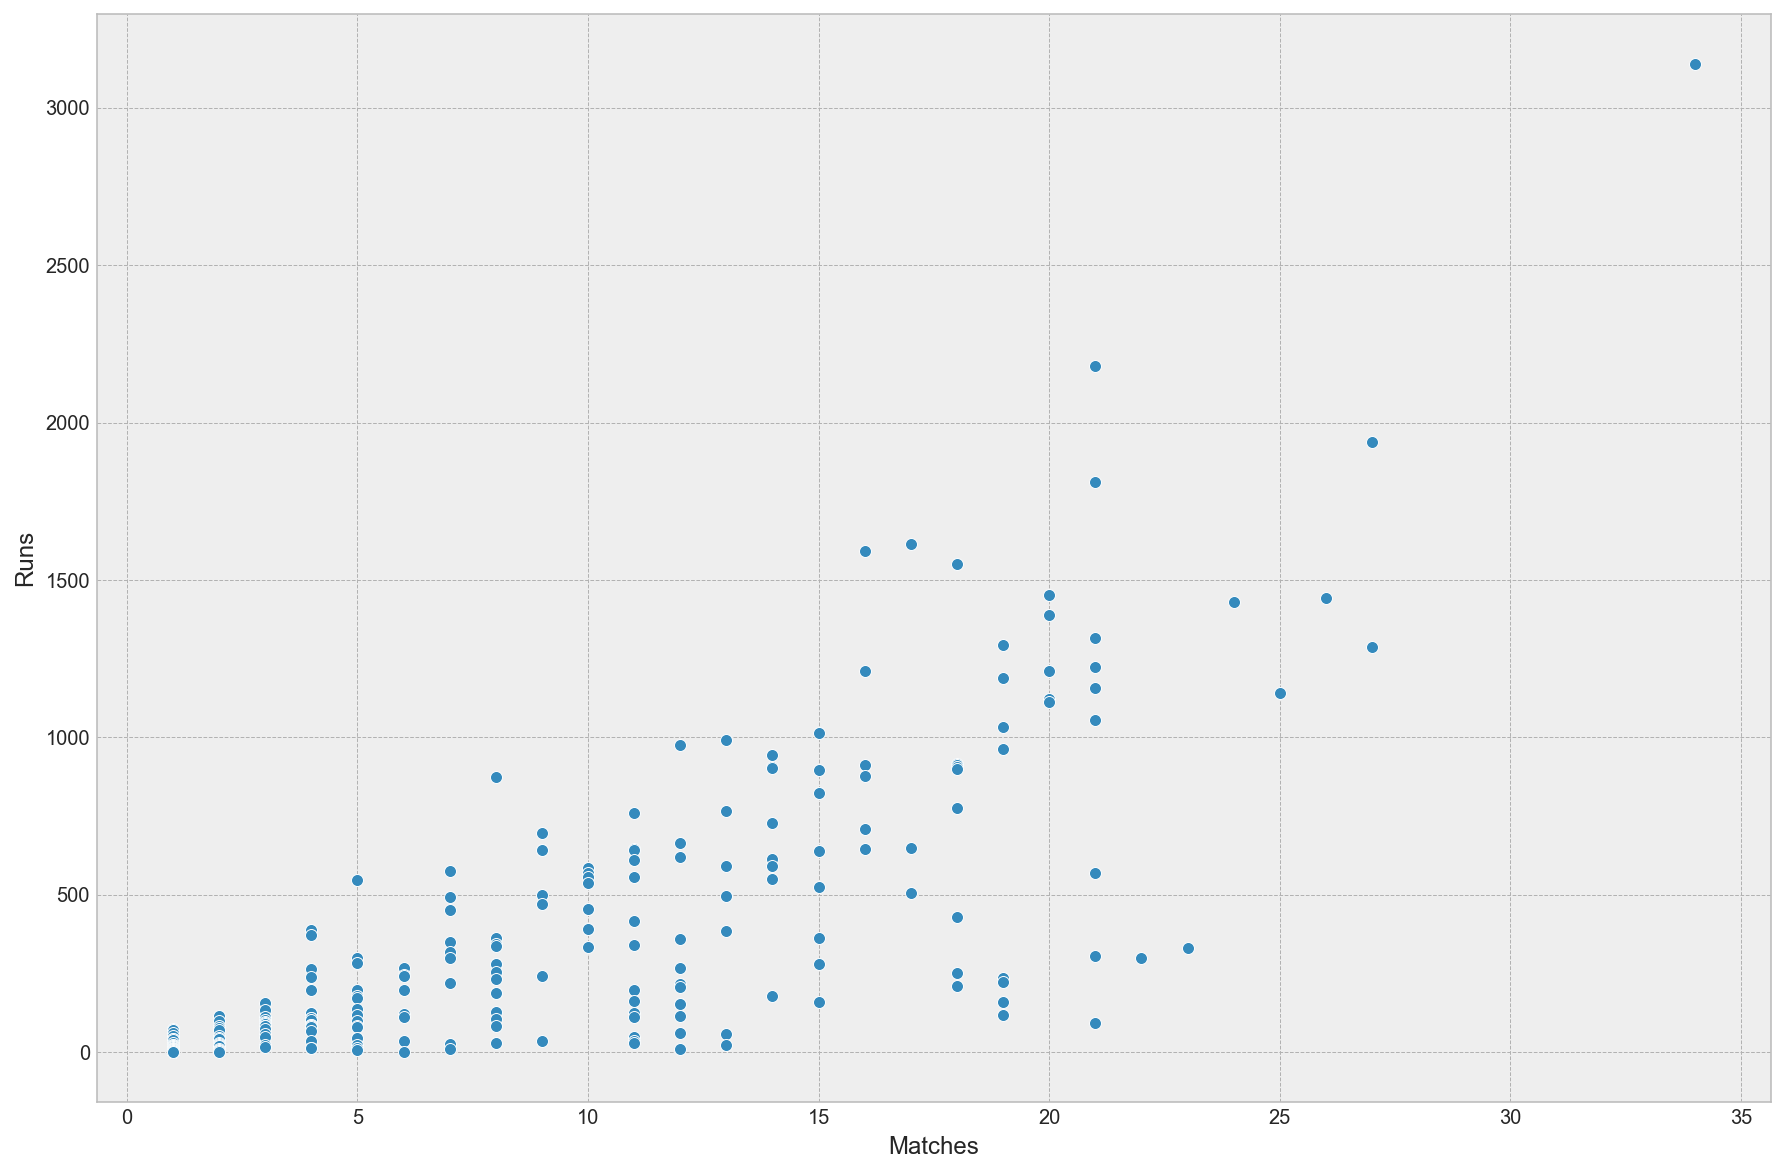

In [35]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Matches", y = 'Runs');

### Matches vs  Average

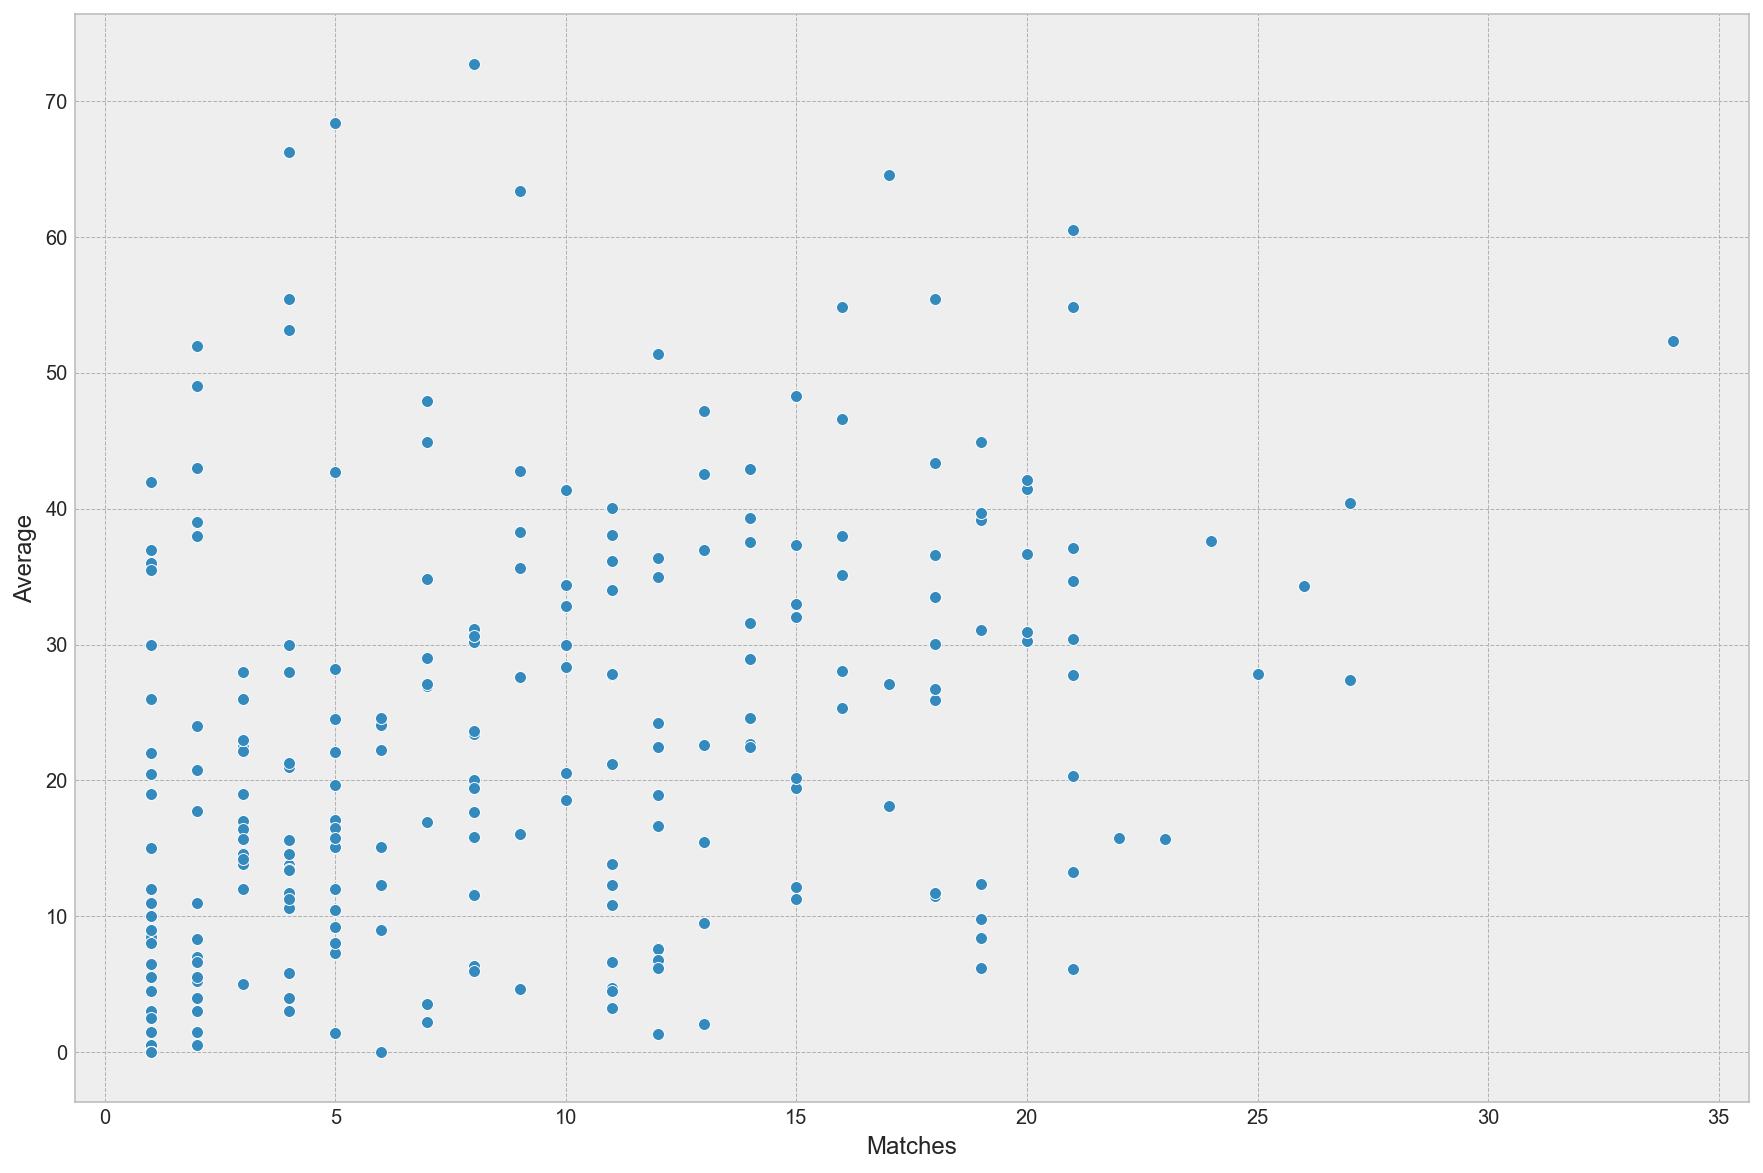

In [36]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Matches", y = 'Average');

### Matches vs  balls faced 

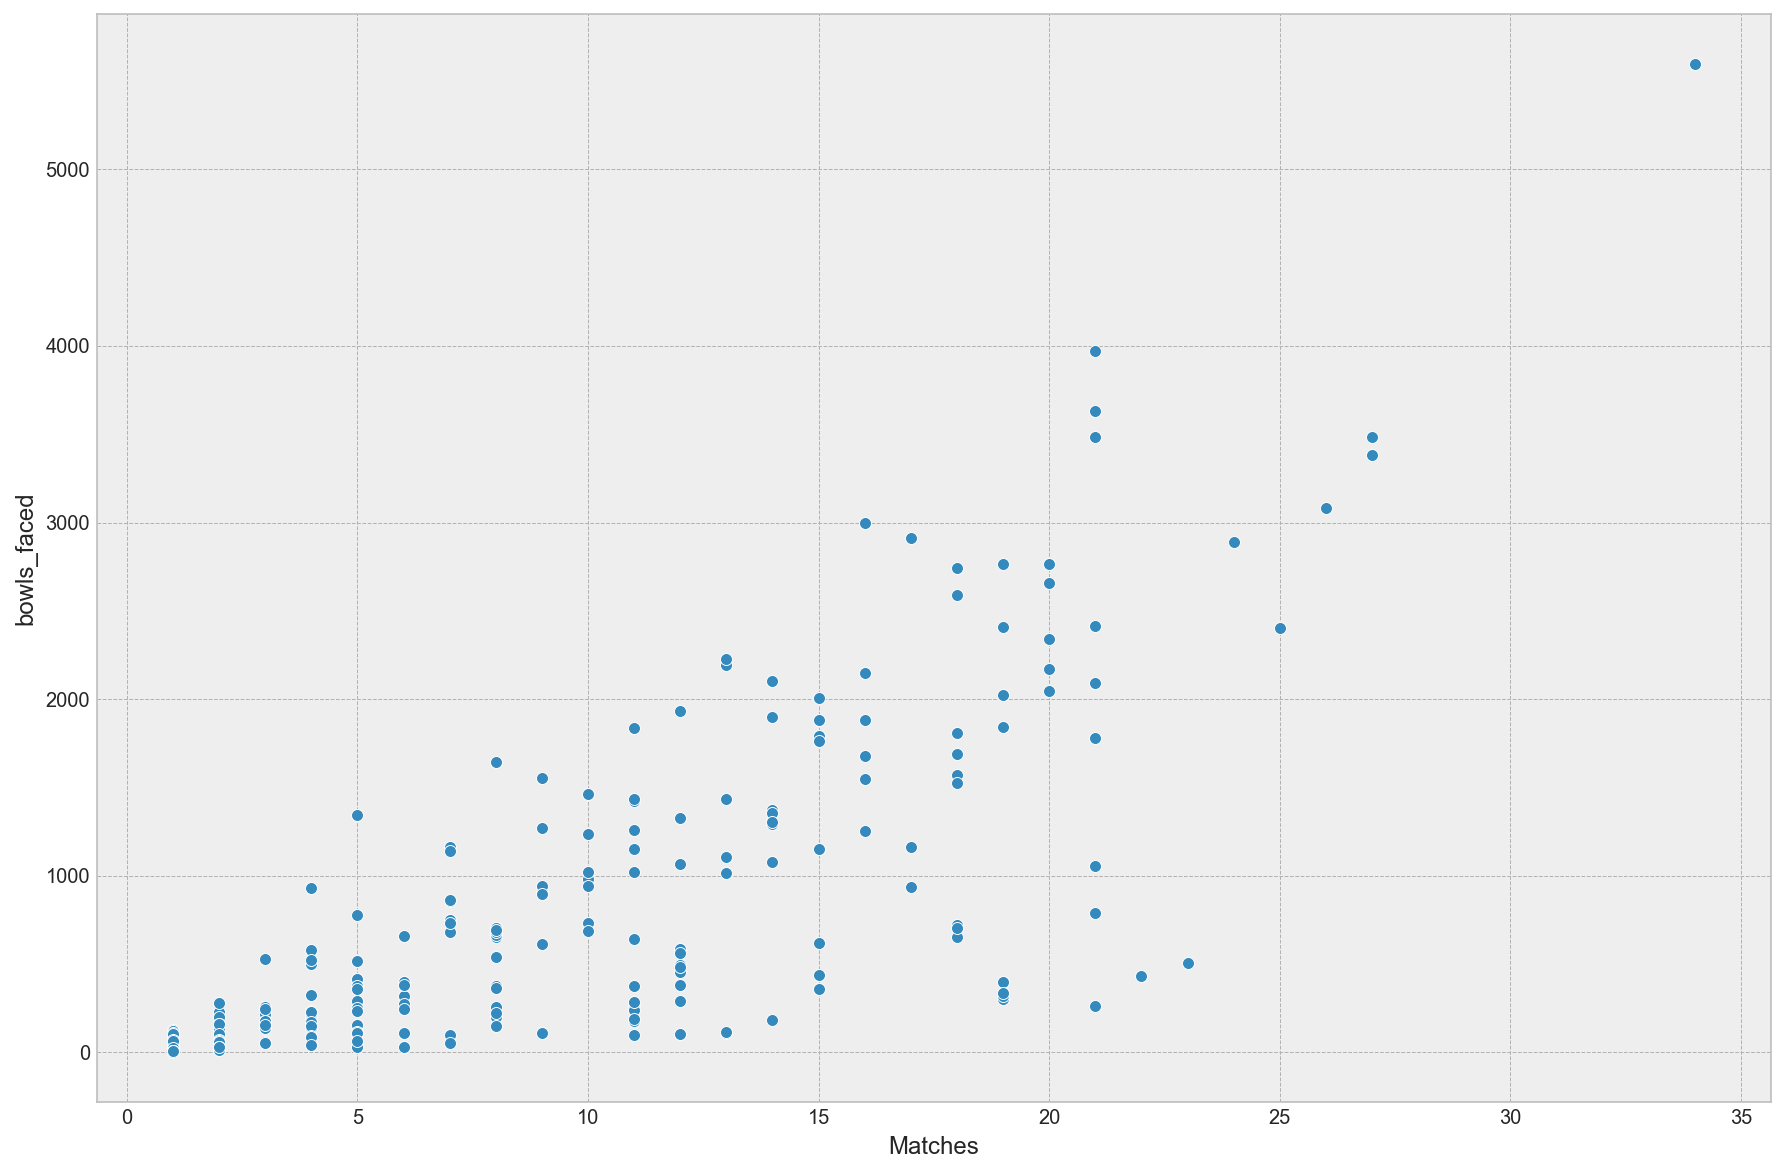

In [37]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Matches", y = 'bowls_faced');

### Innings Vs Runs

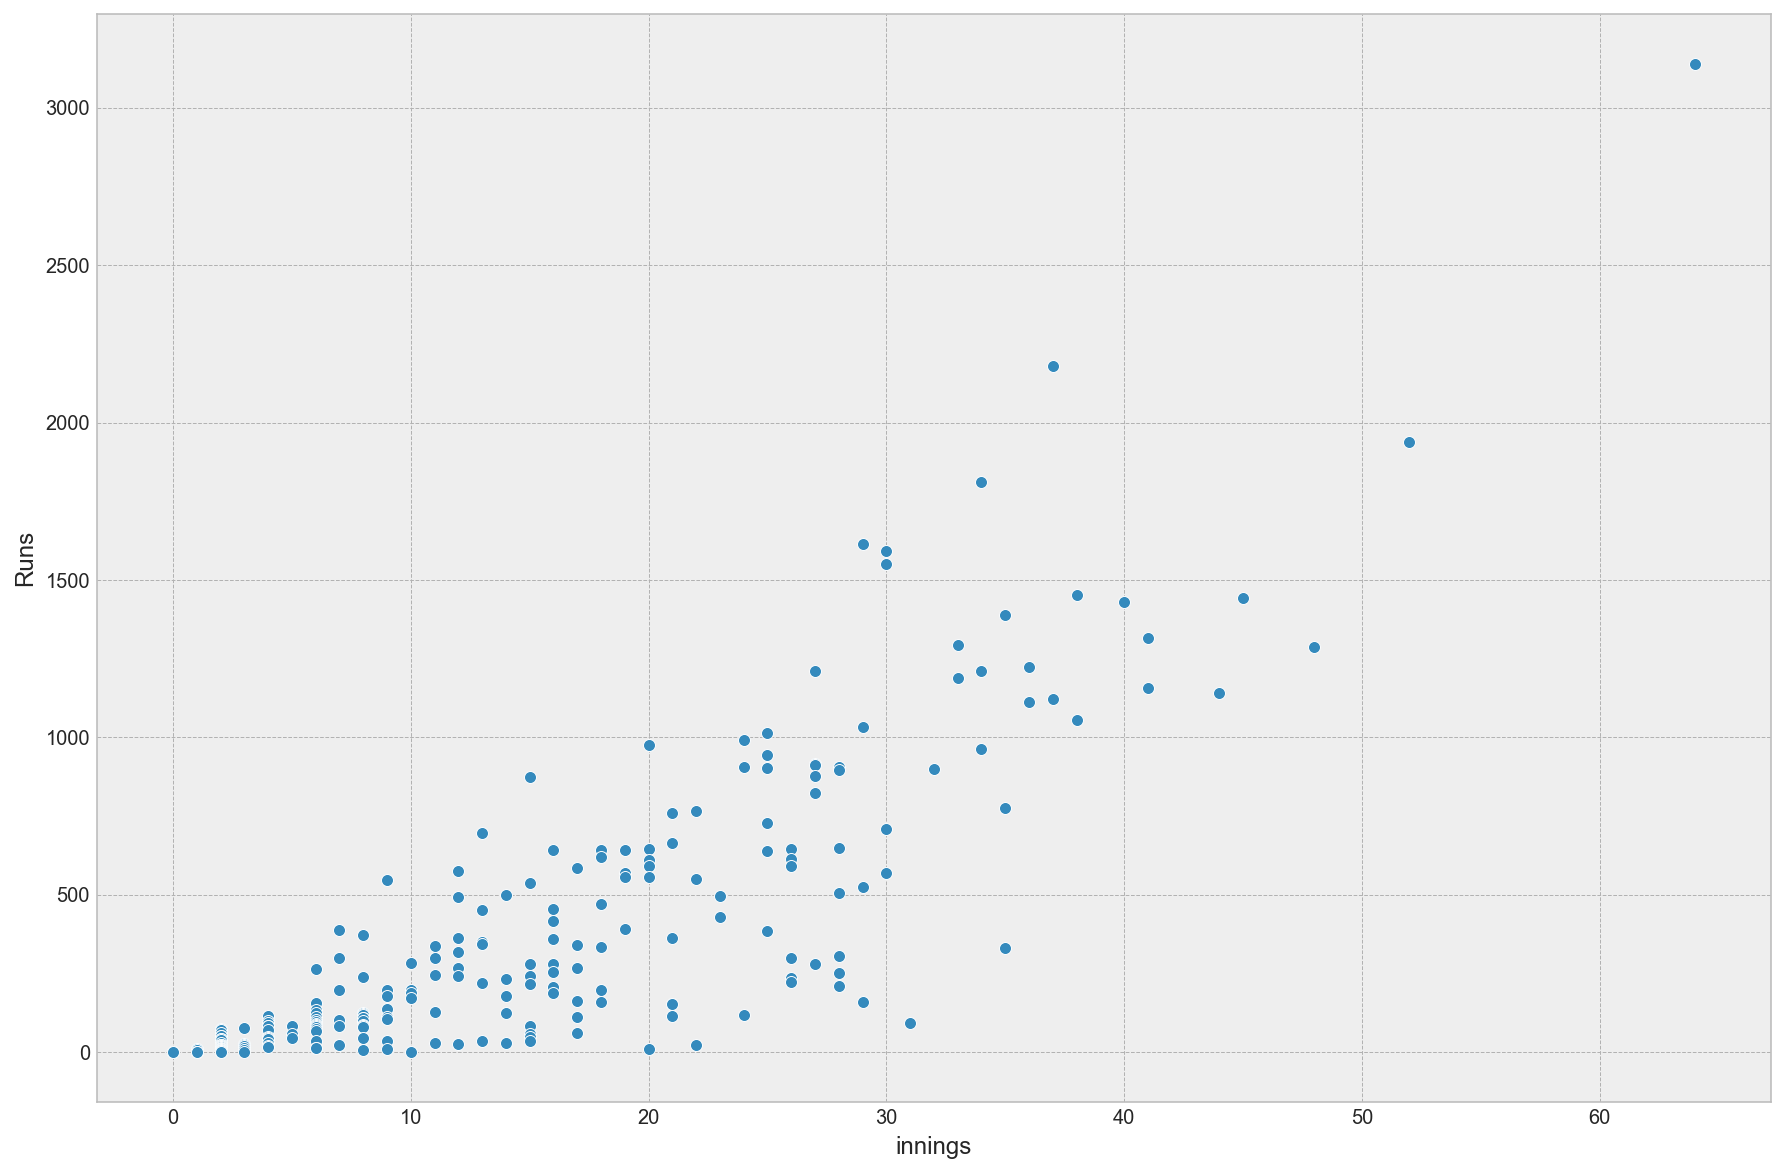

In [38]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "innings", y = 'Runs');

### Innings Vs Average

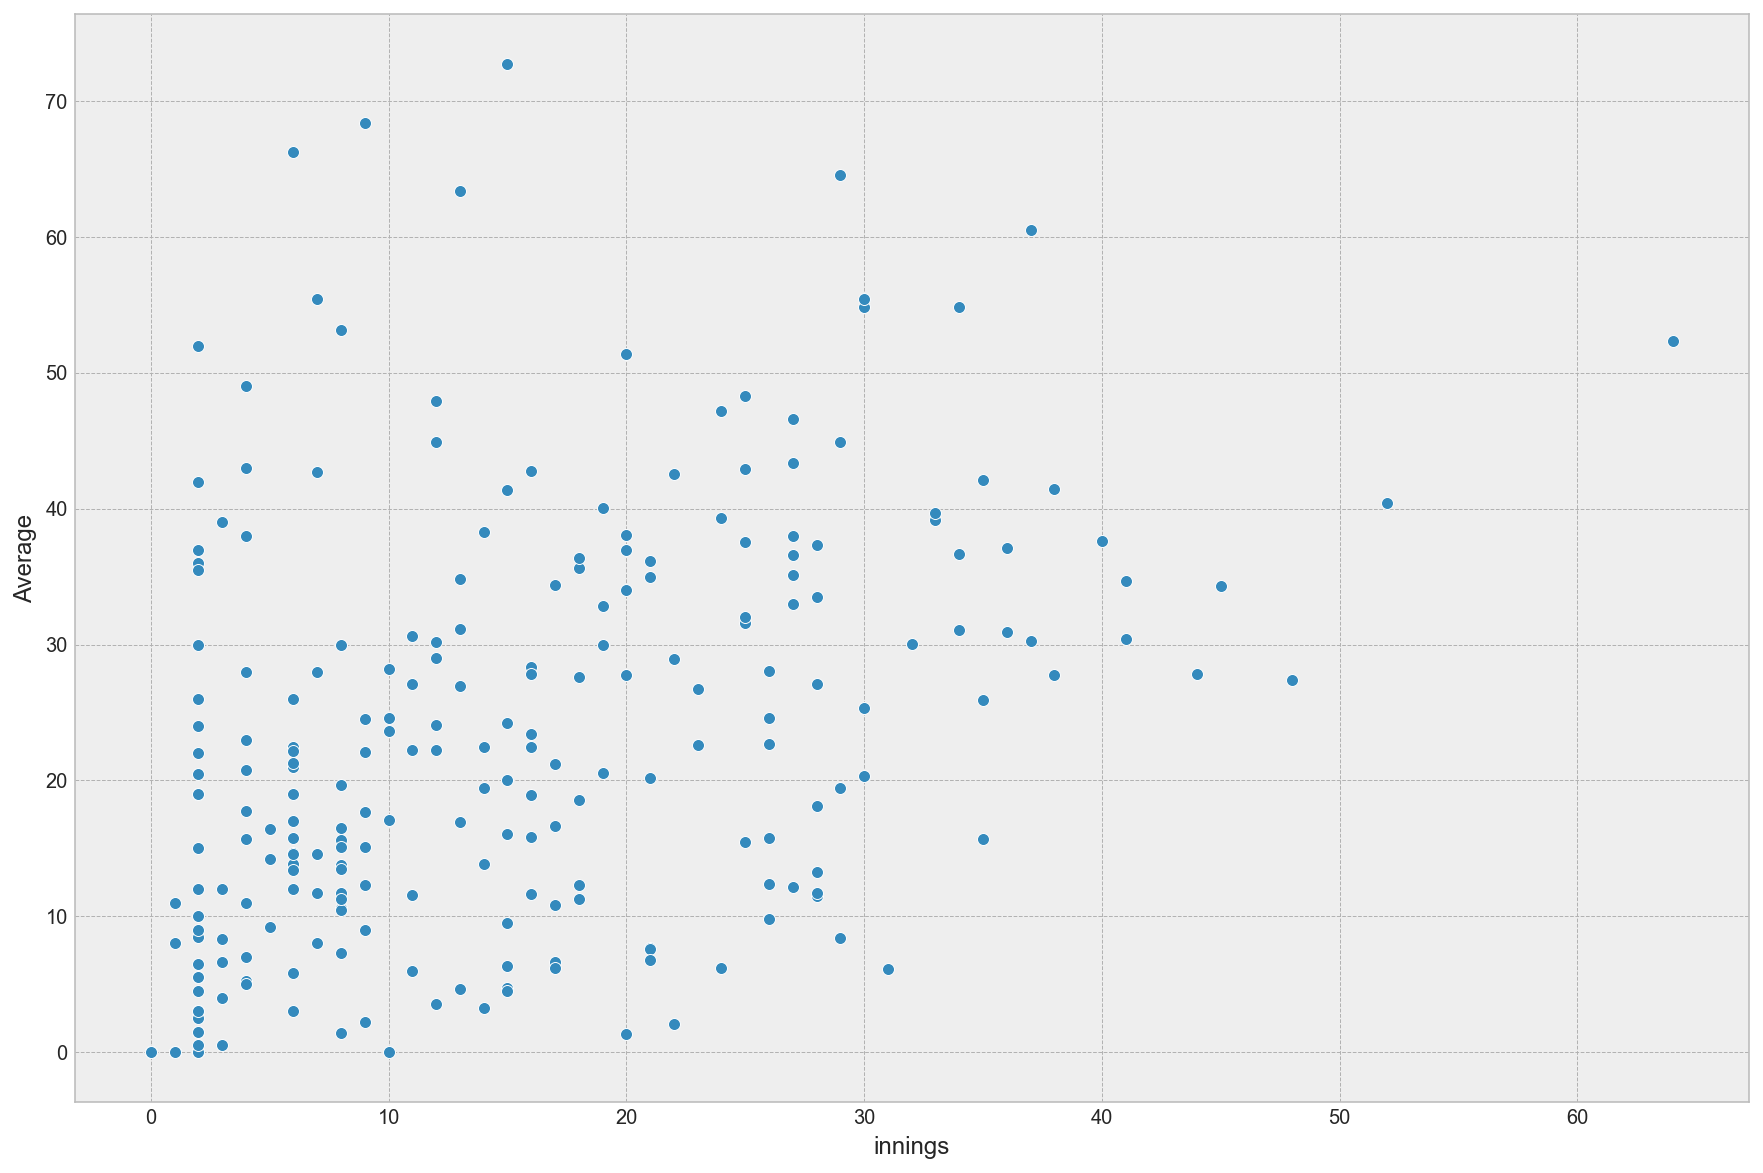

In [39]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "innings", y = 'Average');

### Balls faced vs Runs

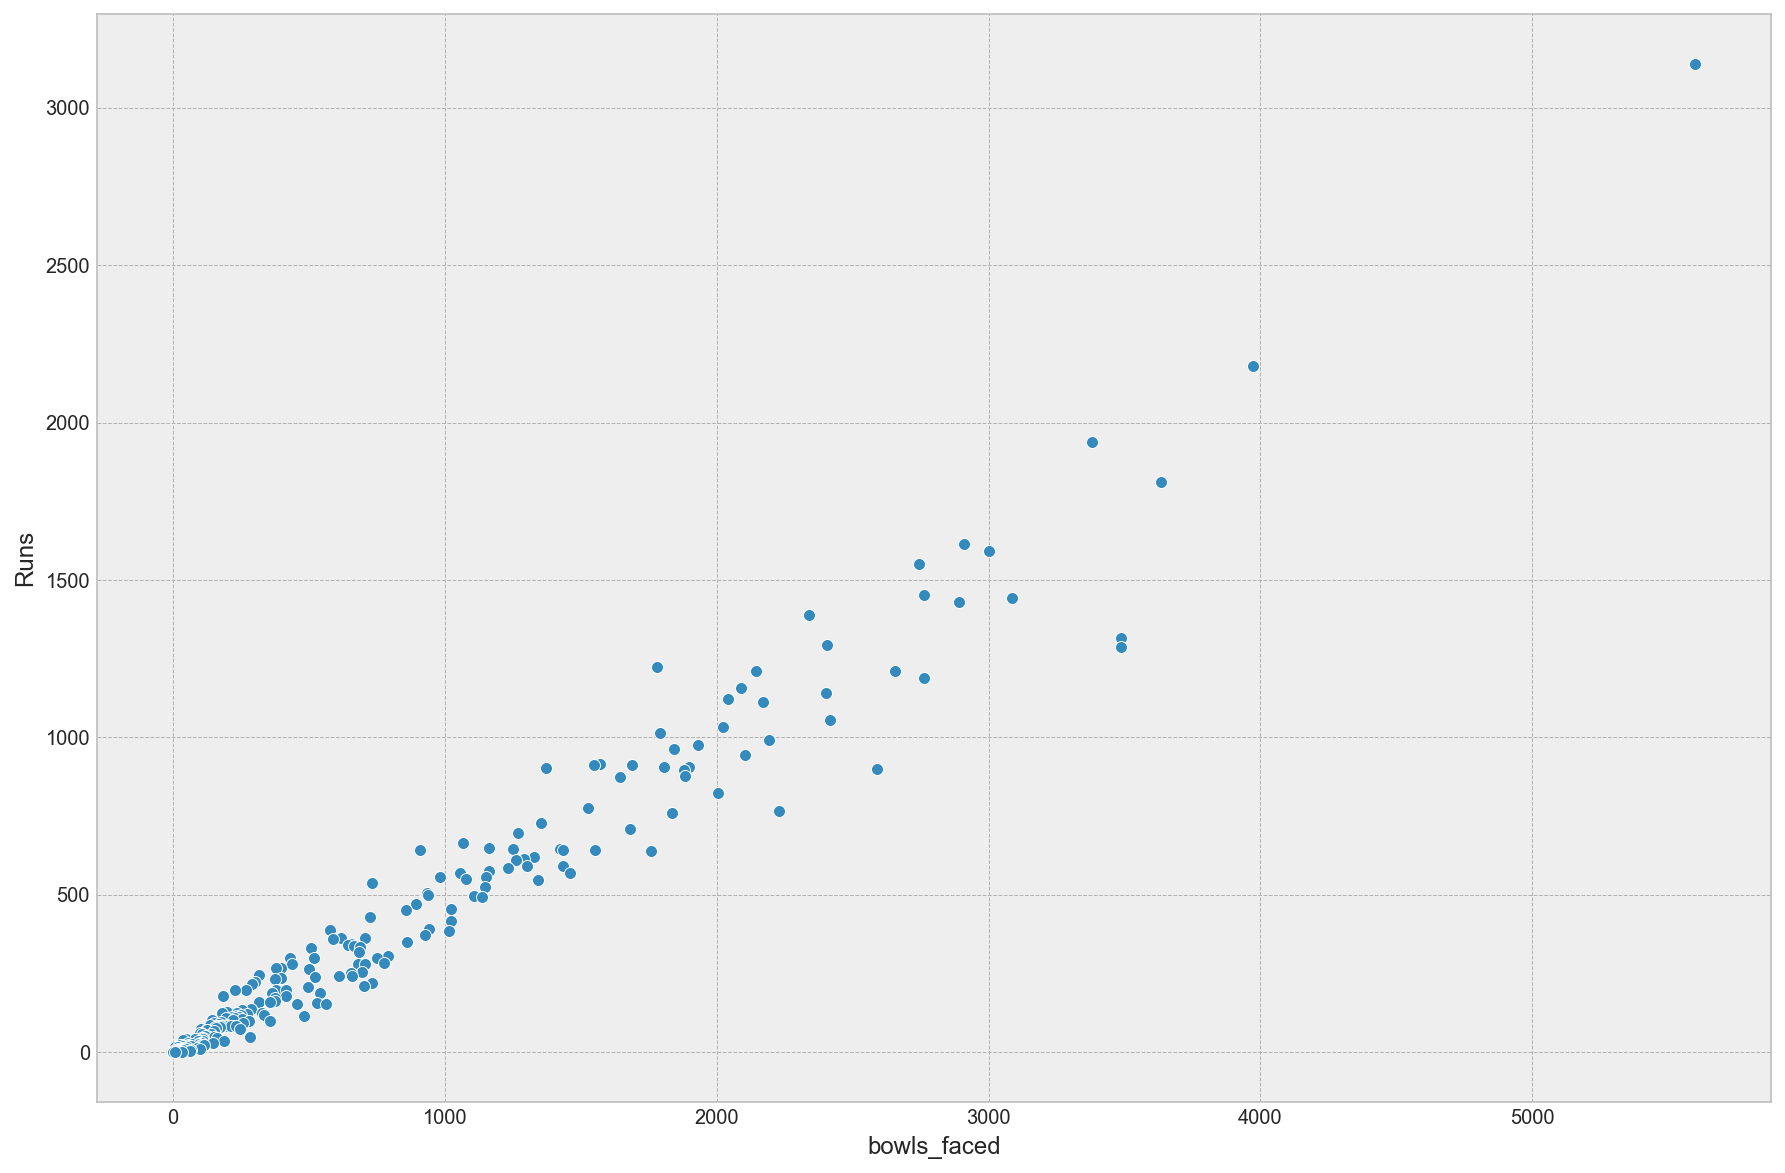

In [40]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "bowls_faced", y = 'Runs');

### Strike rate vs balls faced

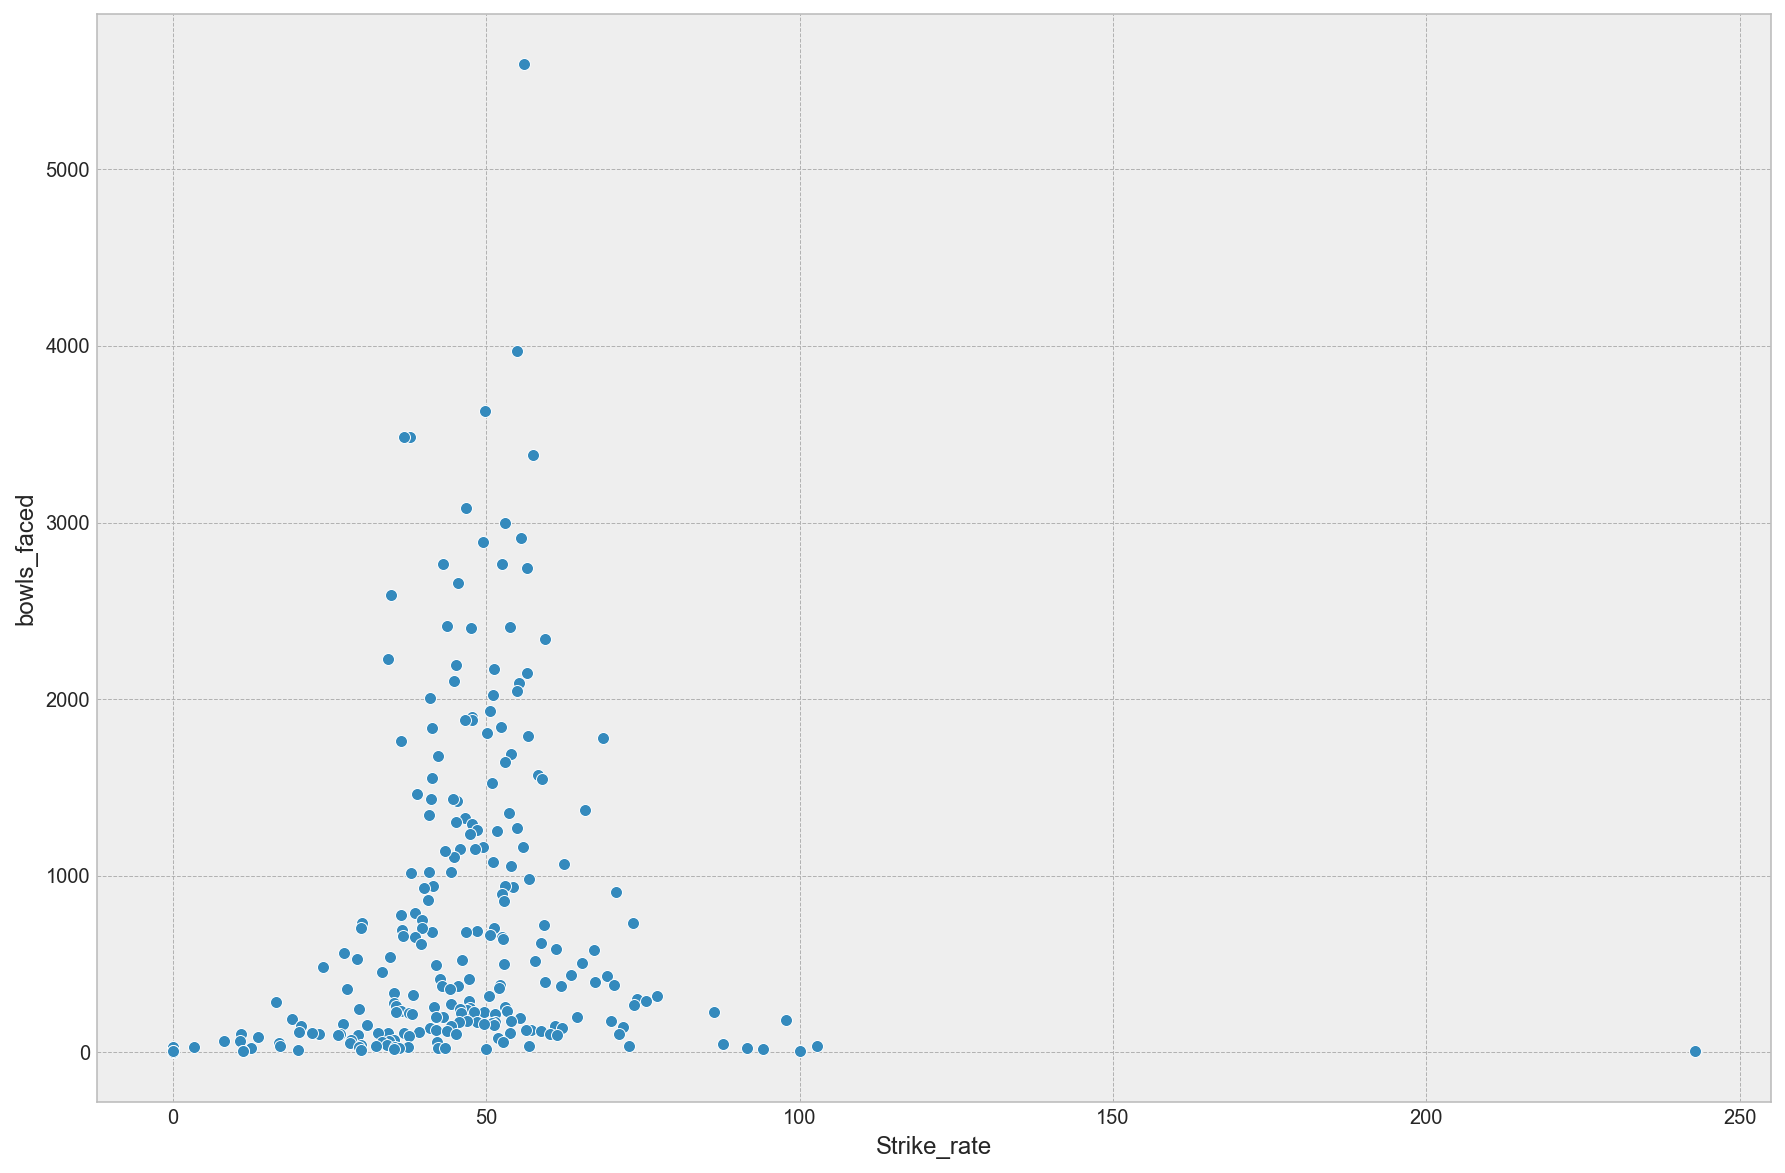

In [41]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Strike_rate", y = 'bowls_faced');

### Strike rate vs Runs

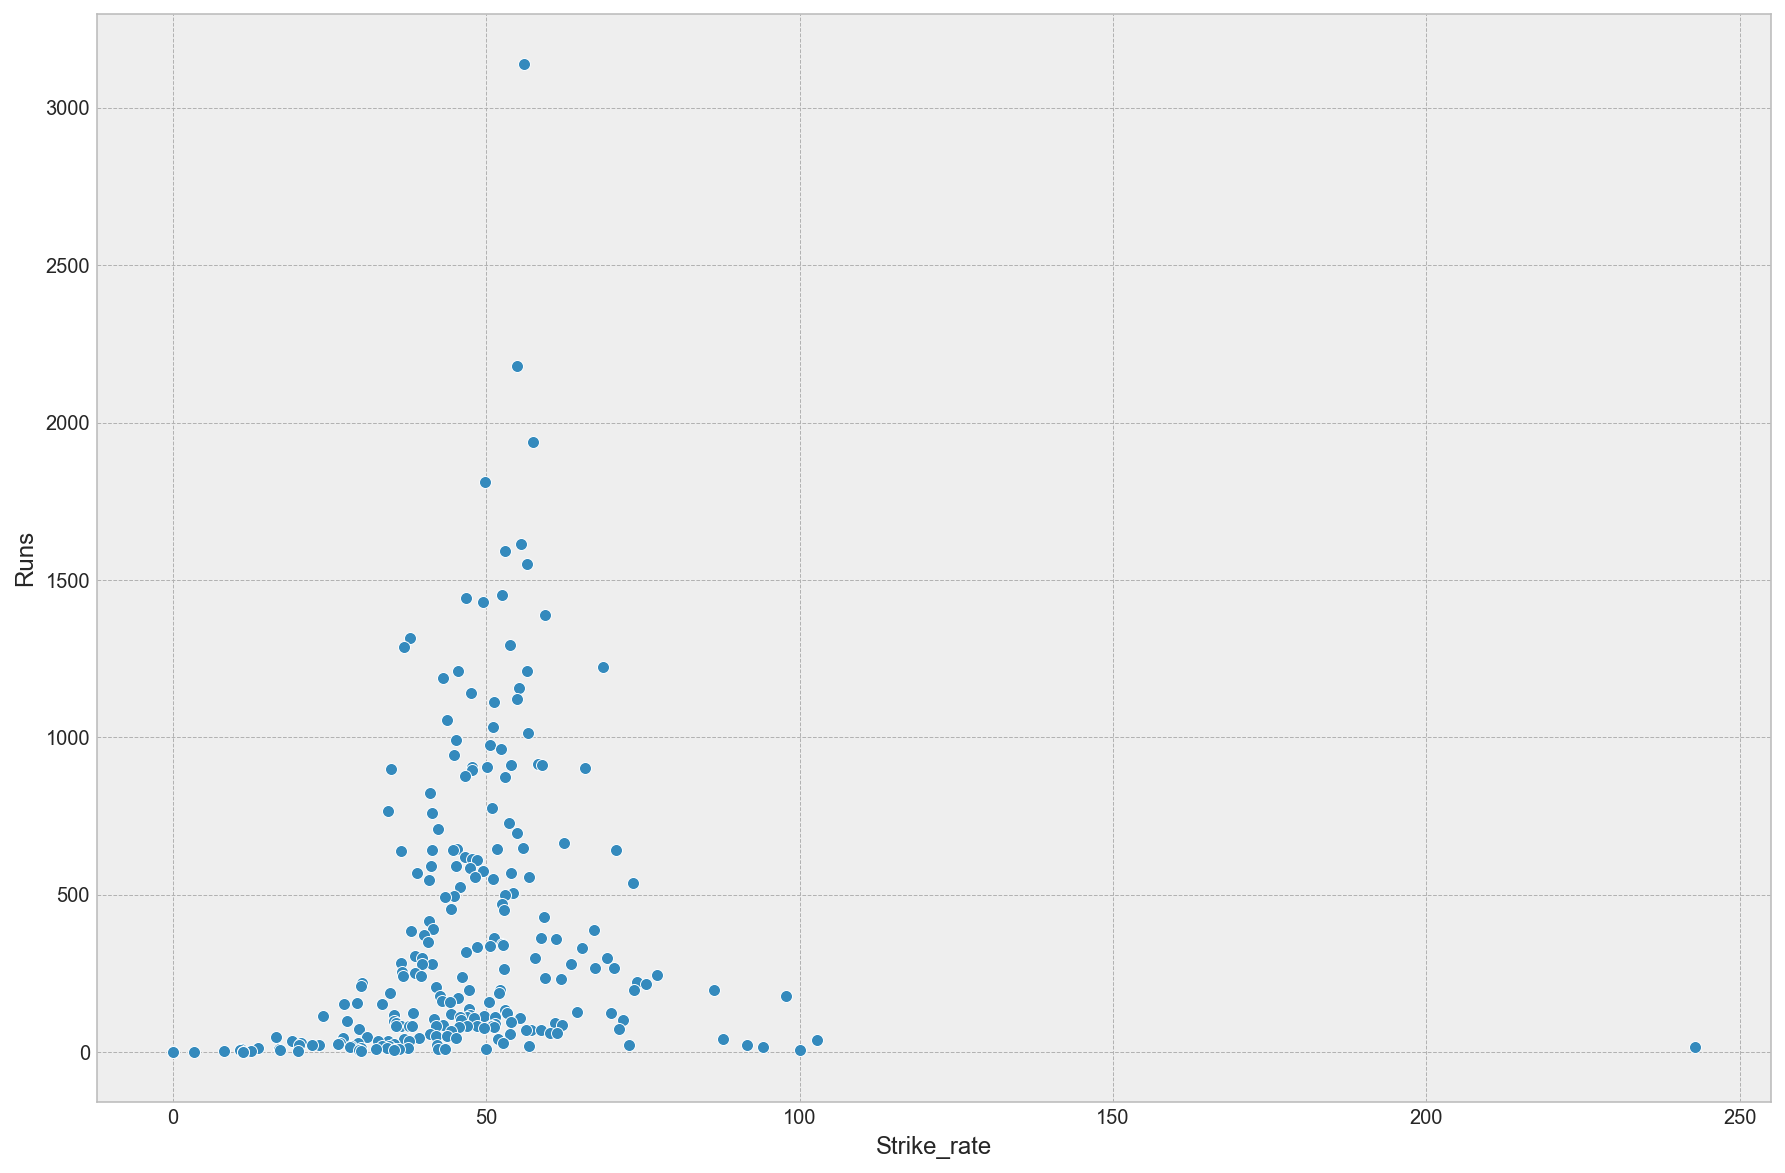

In [42]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Strike_rate", y = 'Runs');

### Team wise Runs

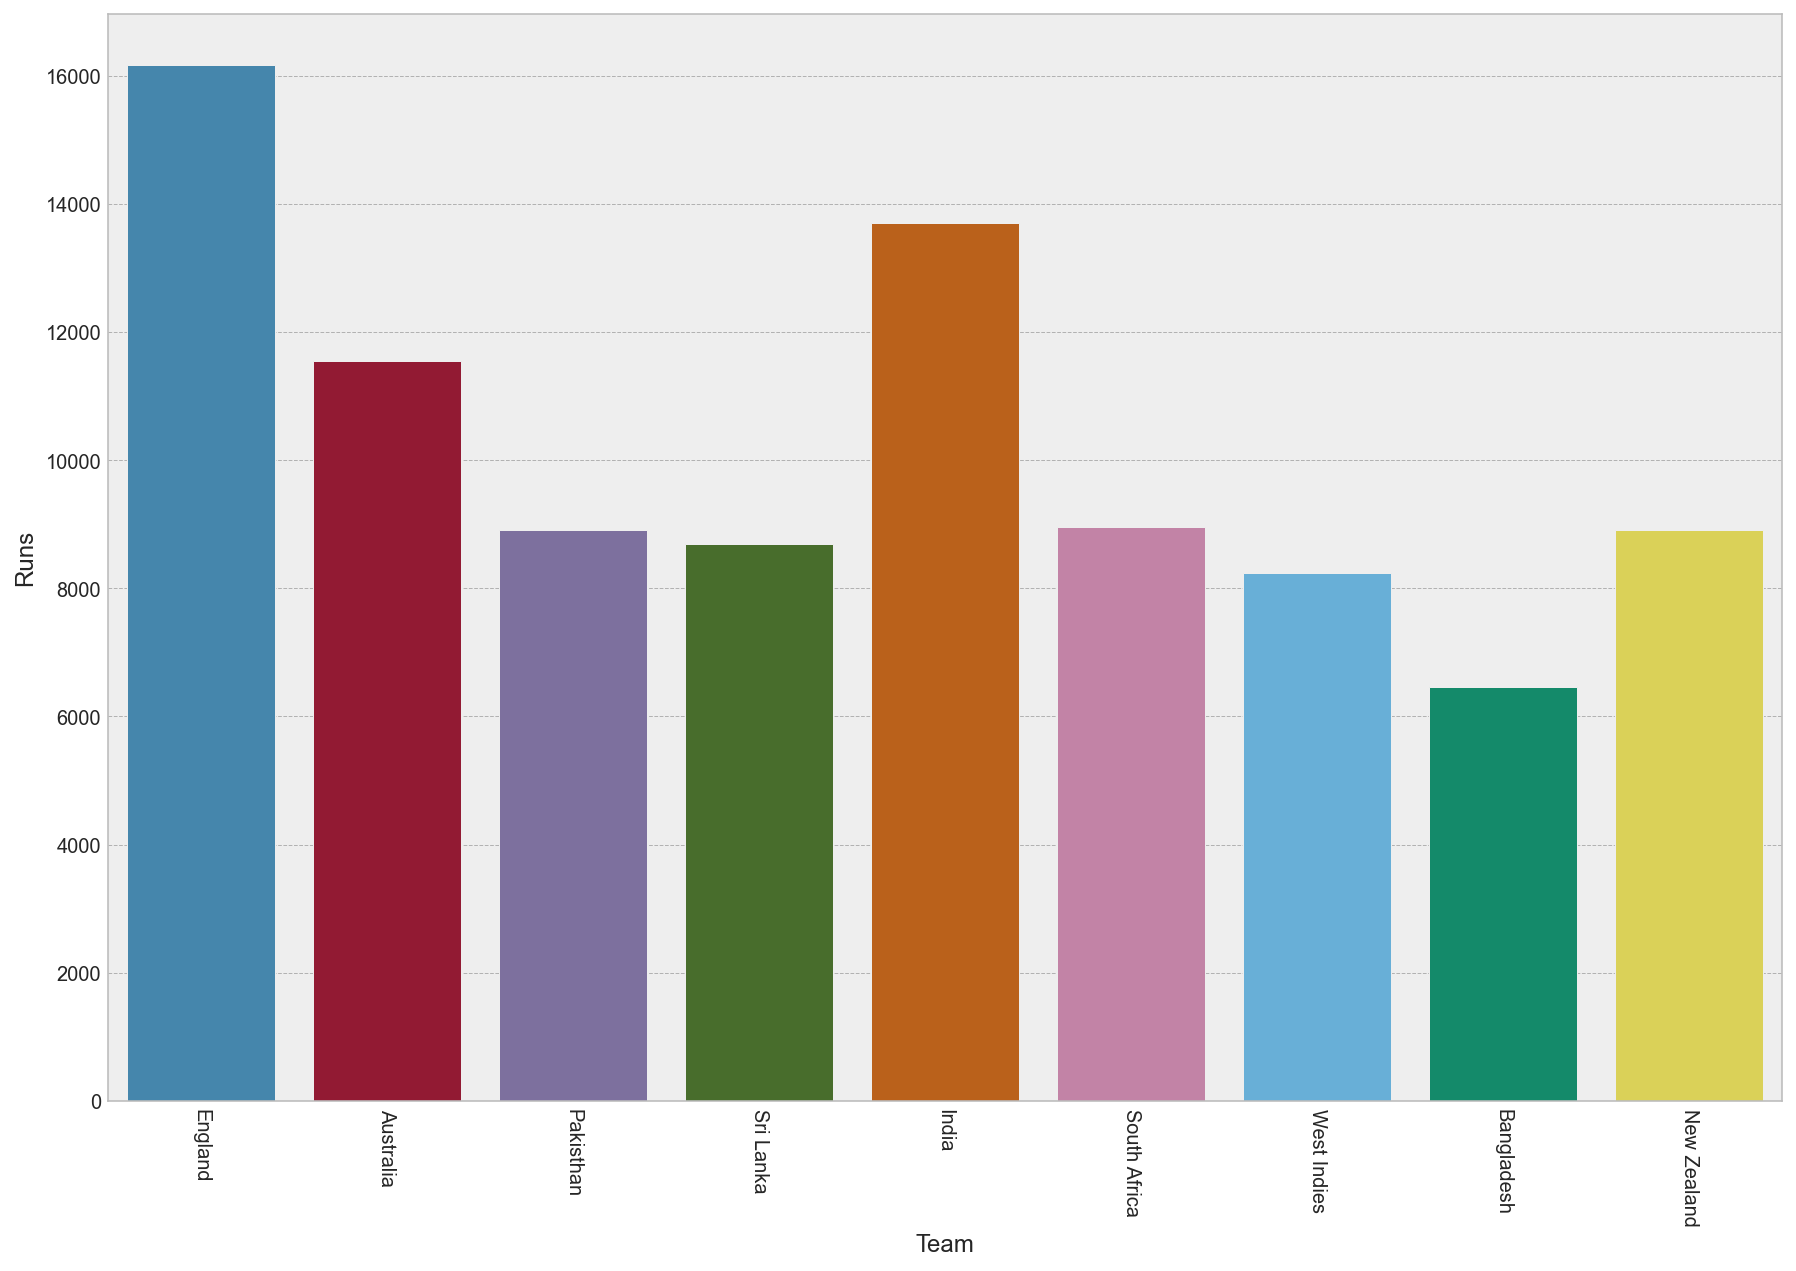

In [43]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Runs',estimator= np.sum, ci = 0 );

### Team wise Hunderds

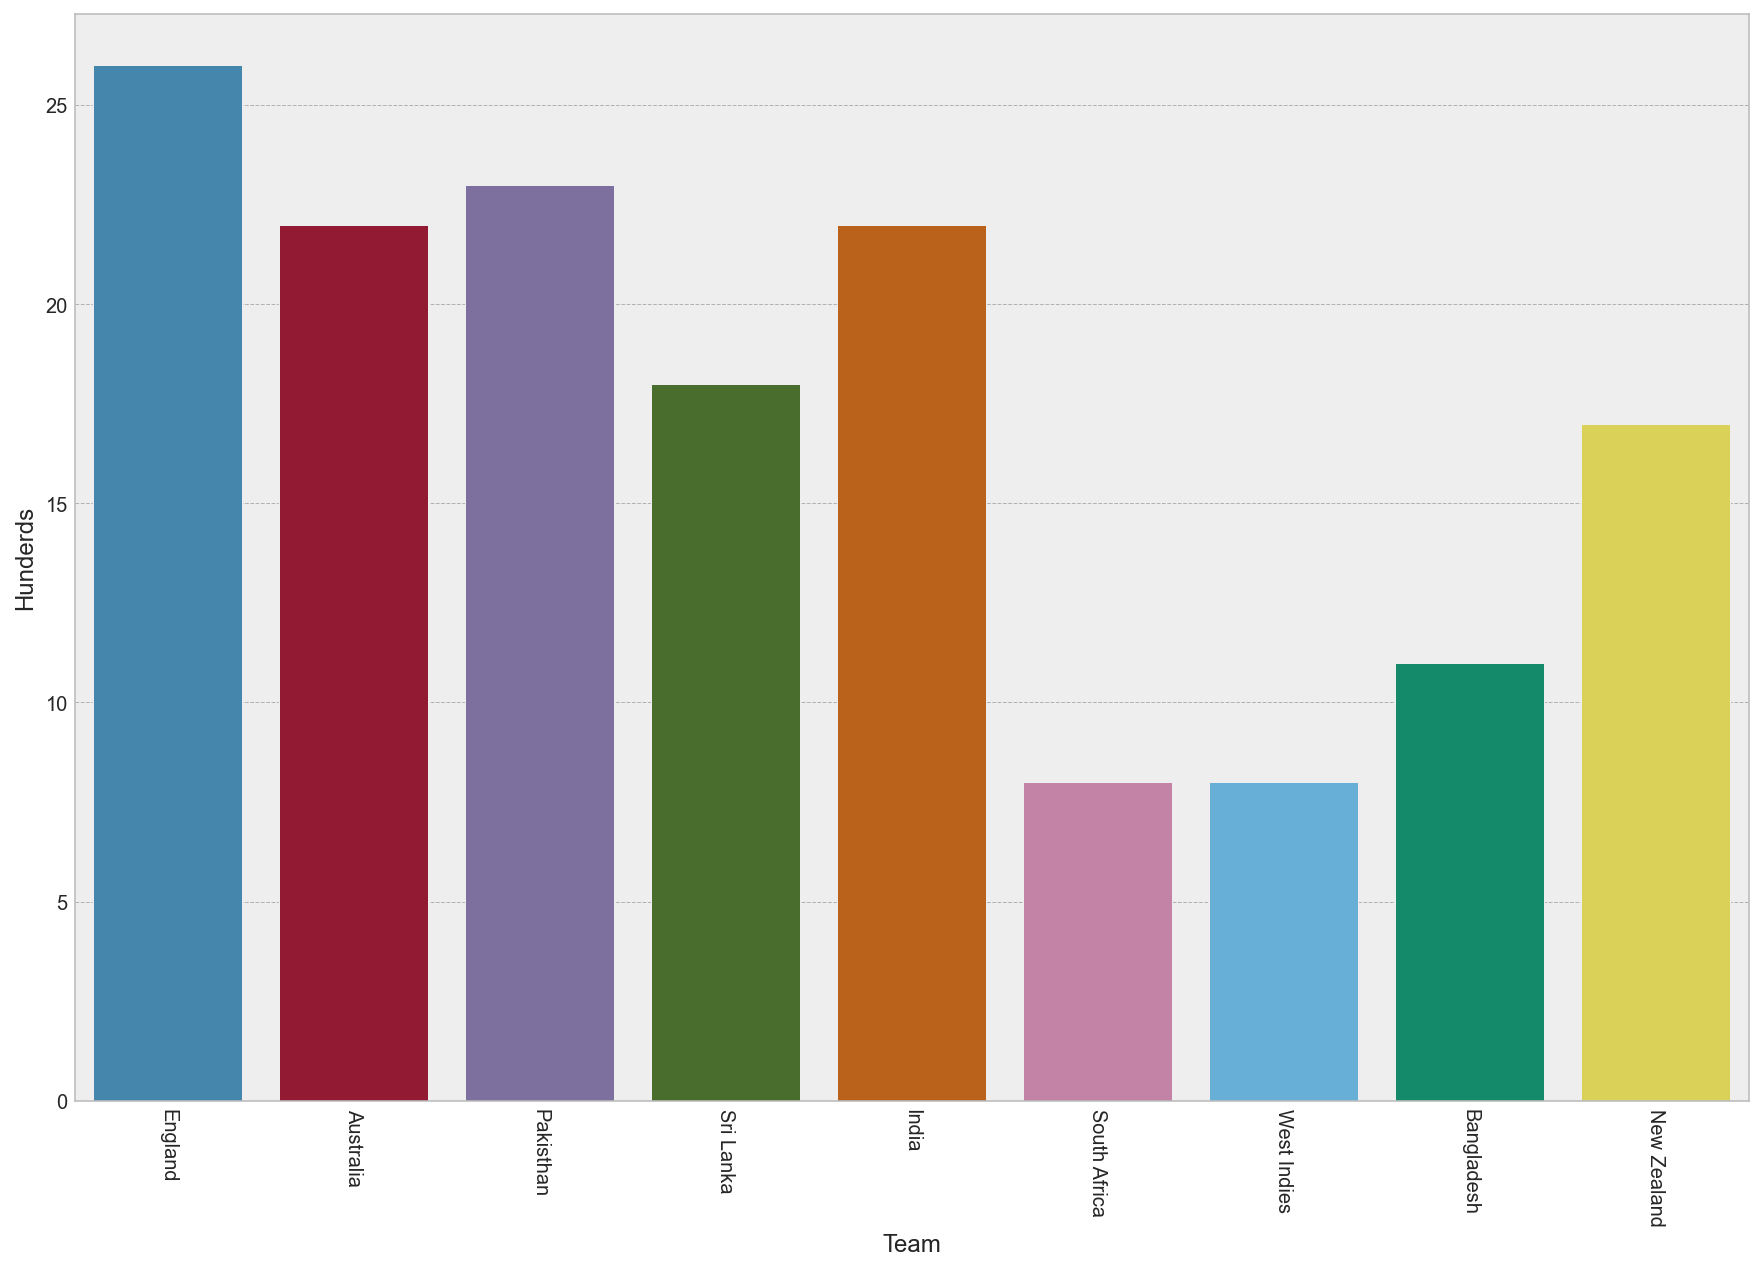

In [44]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Hunderds',estimator= np.sum , ci = 0 );

### Team wise Fours

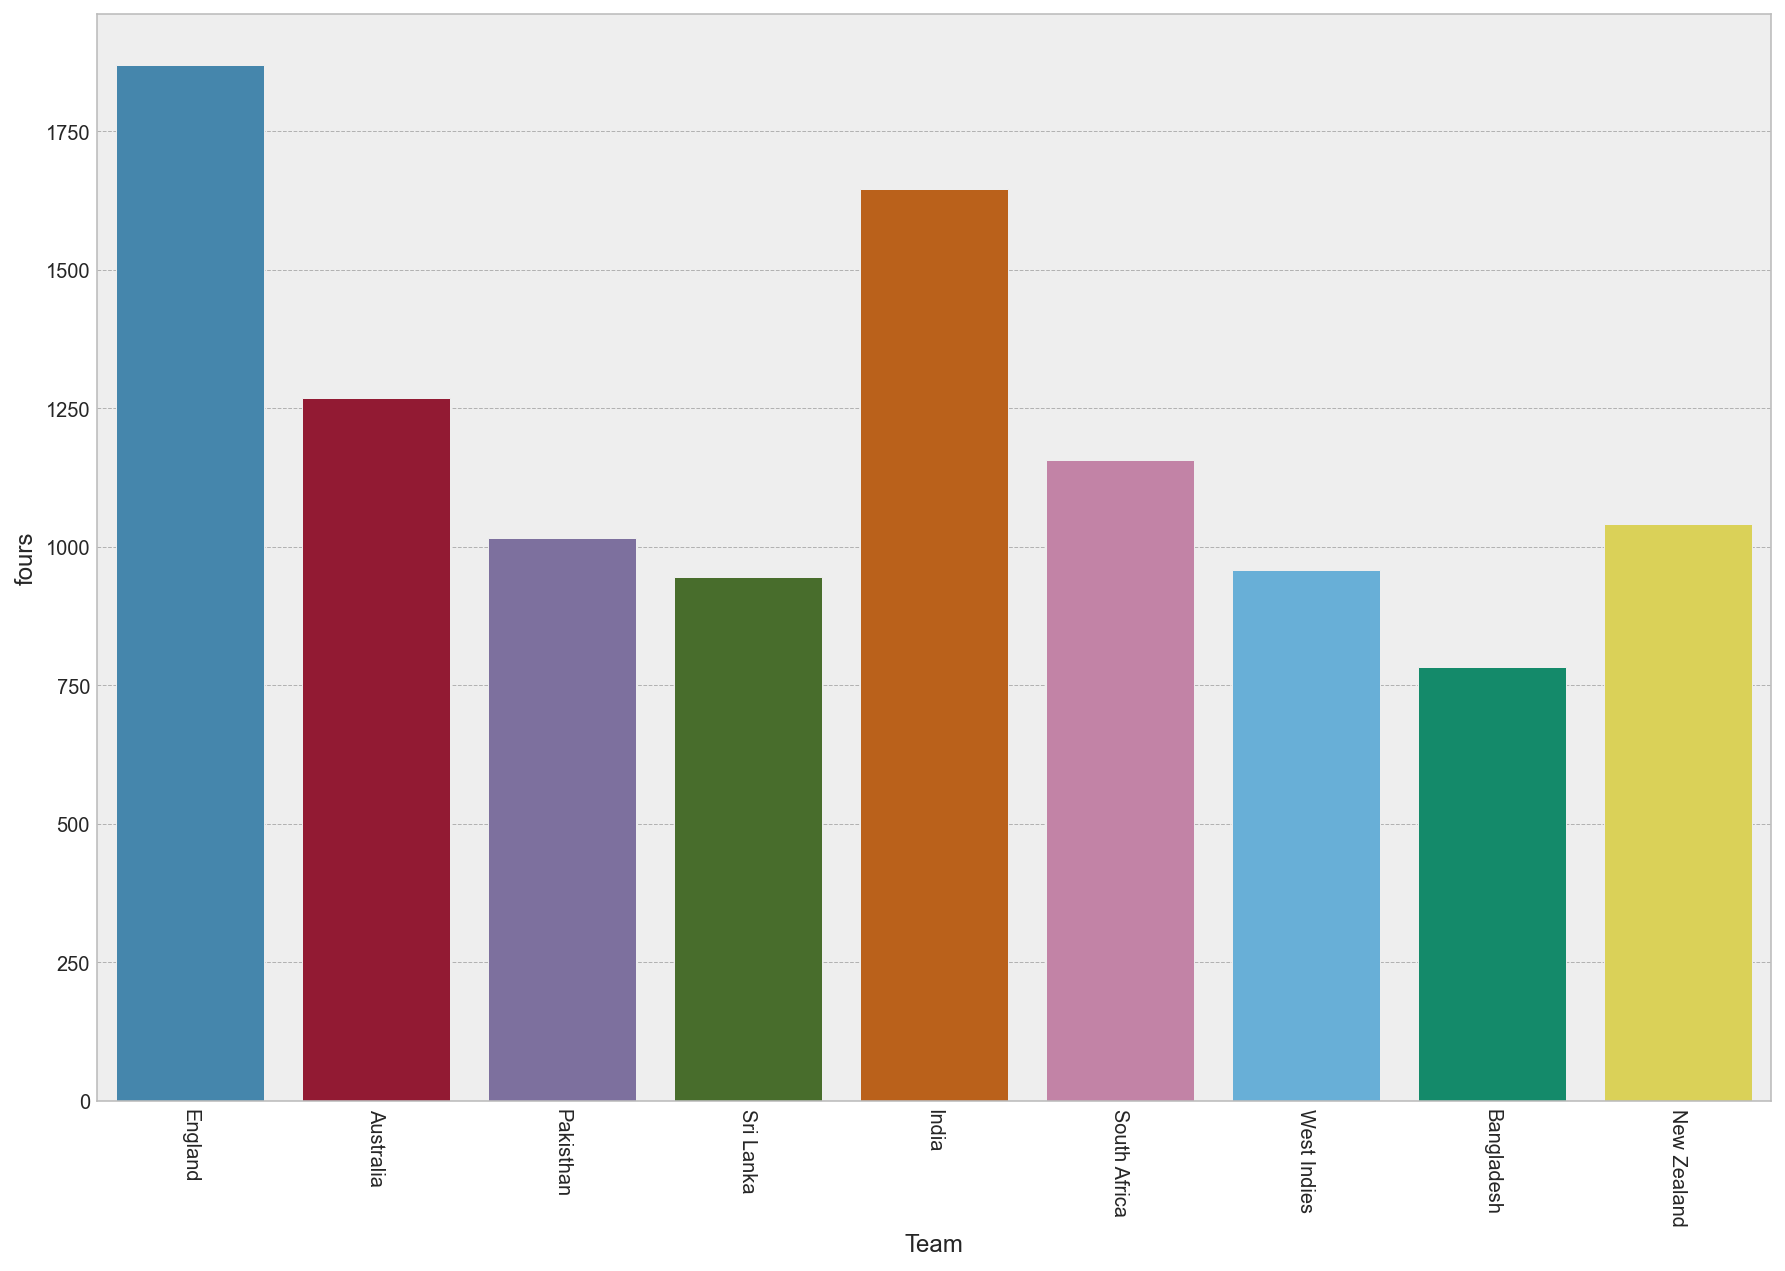

In [45]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'fours',estimator= np.sum, ci = 0 );

### Team wise Sixes

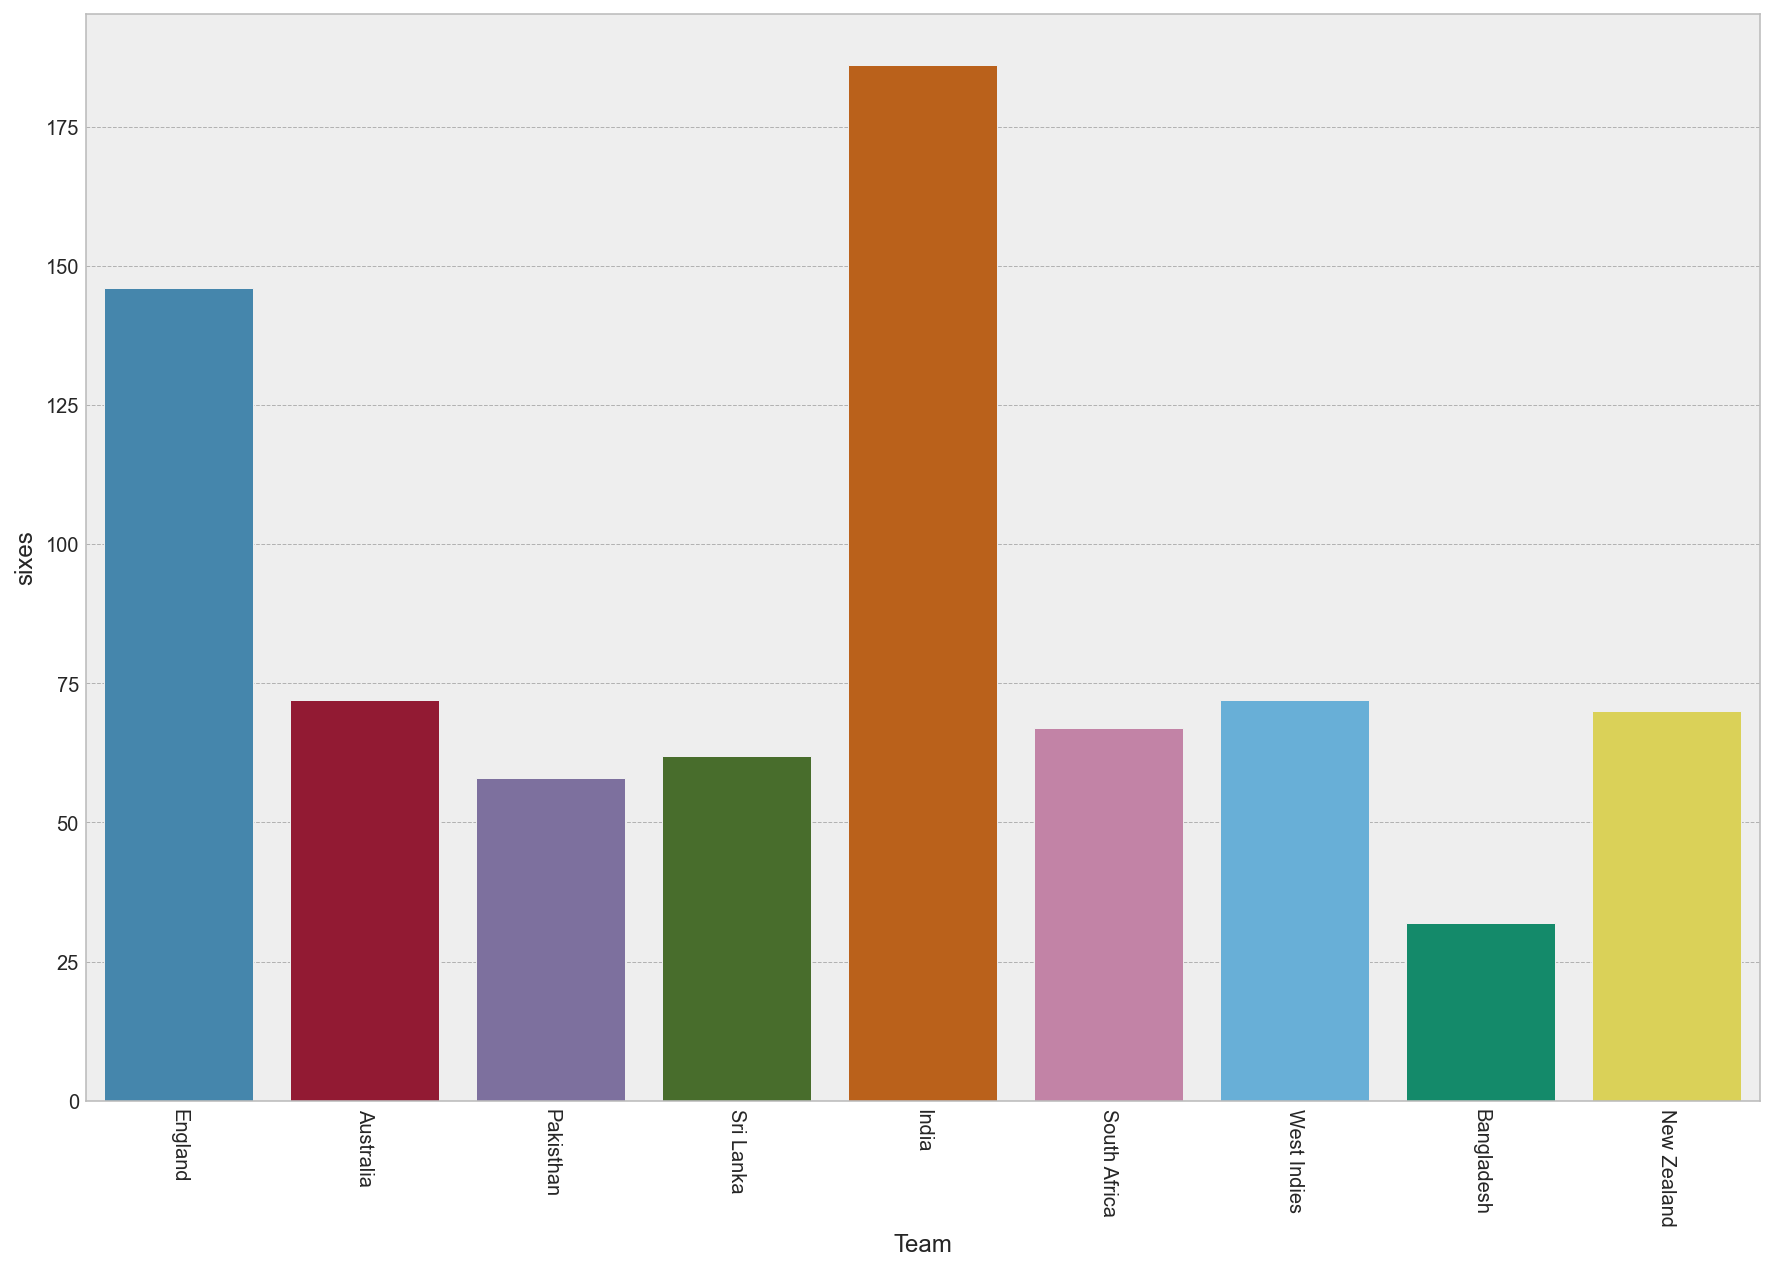

In [46]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'sixes',estimator= np.sum, ci = 0 );

### Team wise Fifties

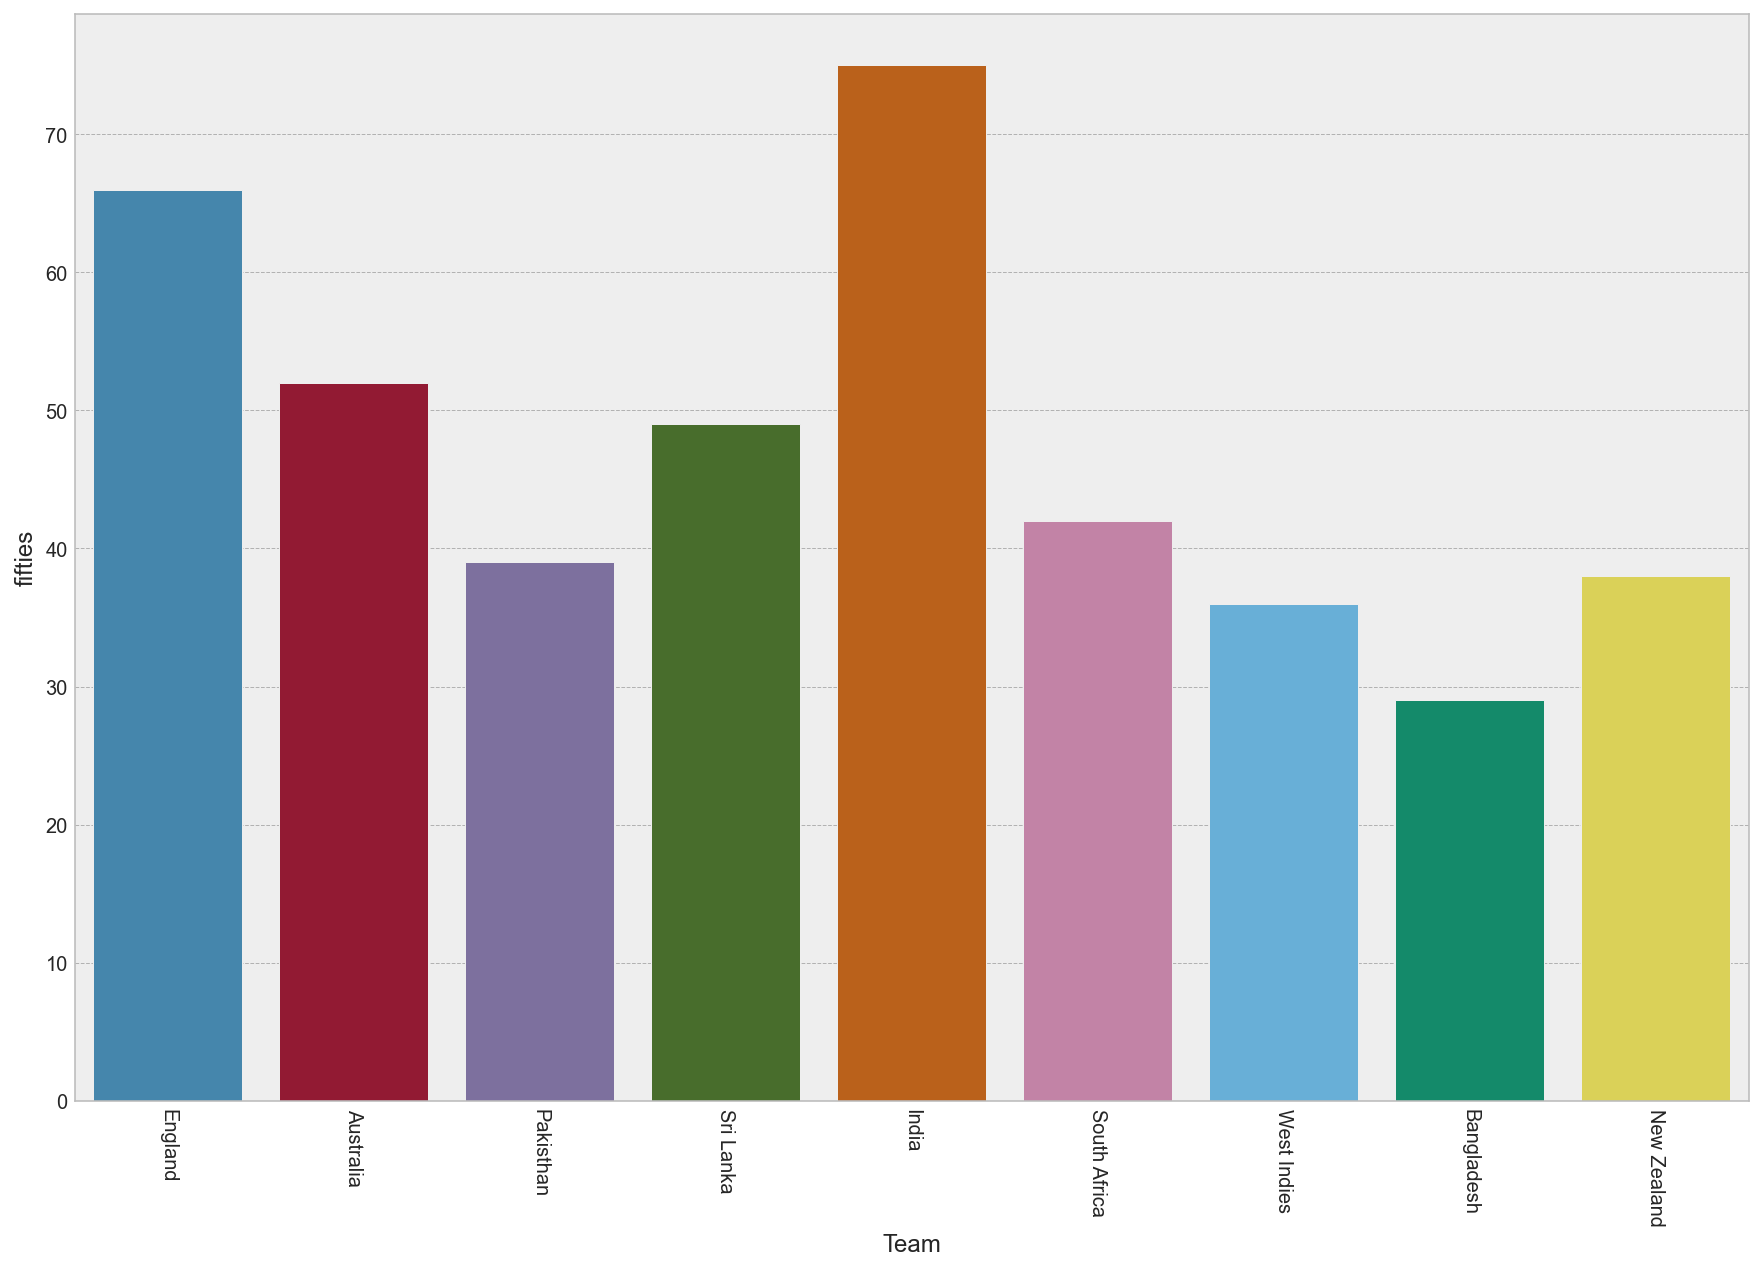

In [47]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'fifties',estimator= np.sum, ci = 0 );

### Team vs Ducks

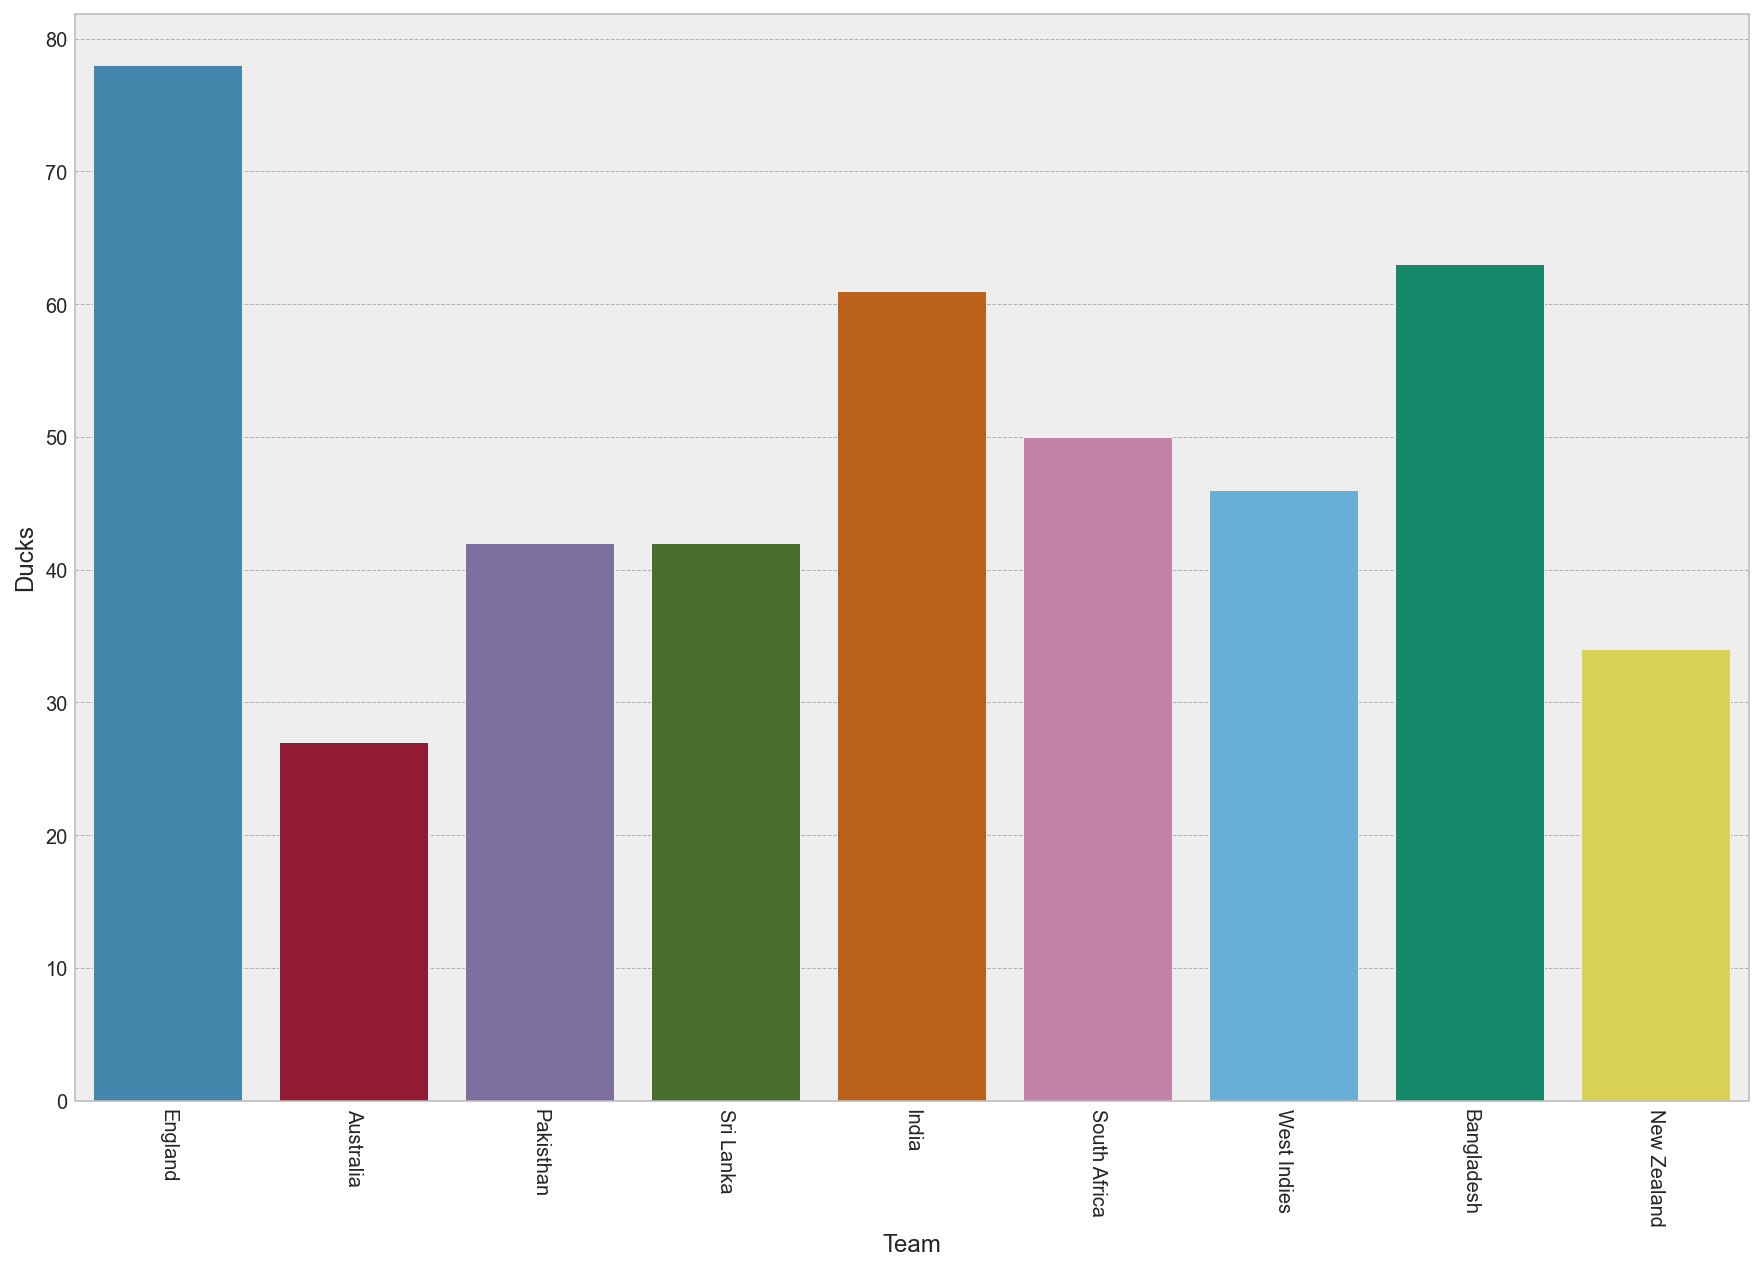

In [48]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Ducks',estimator= np.sum, ci = 0 );

### Team vs Not Outs

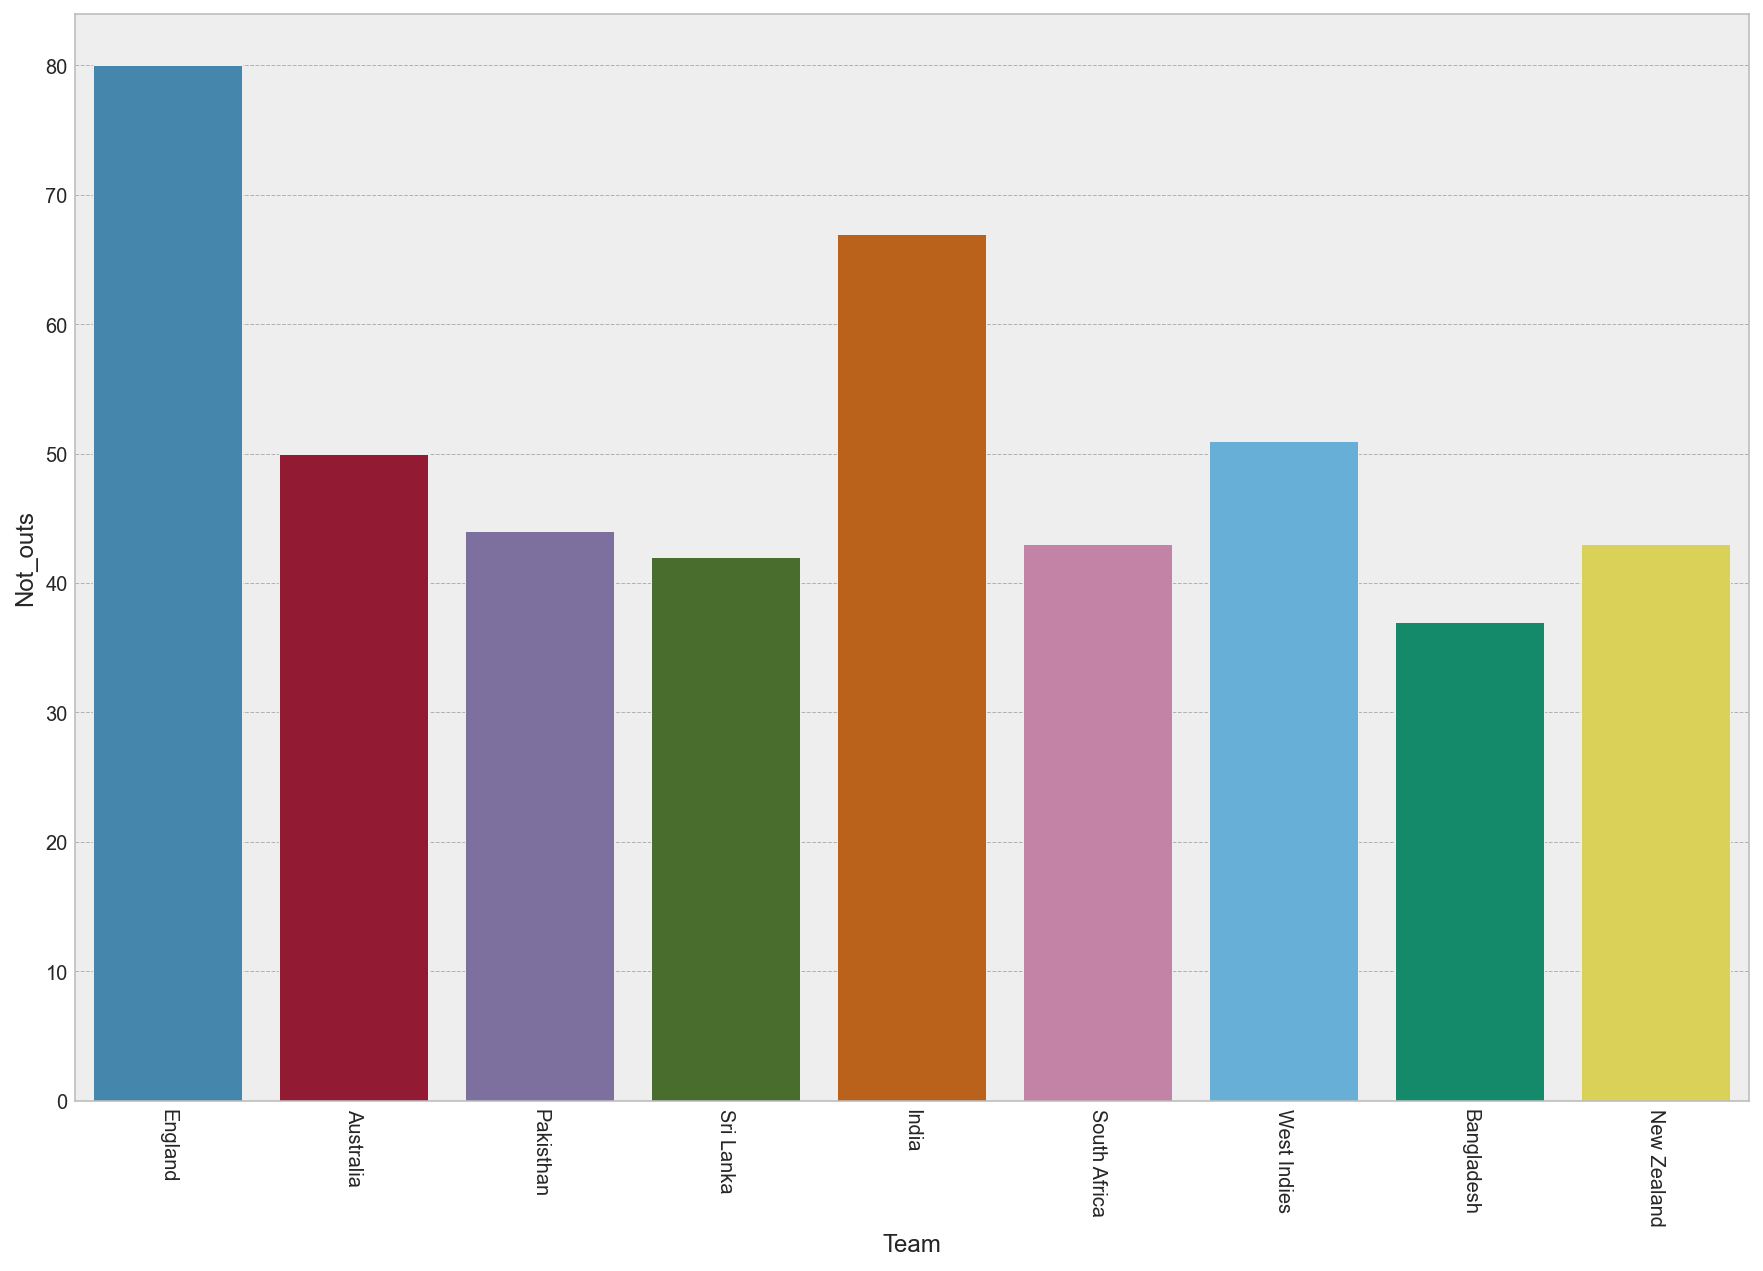

In [49]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Not_outs',estimator= np.sum, ci = 0 );

### Team vs Average Stirkerate

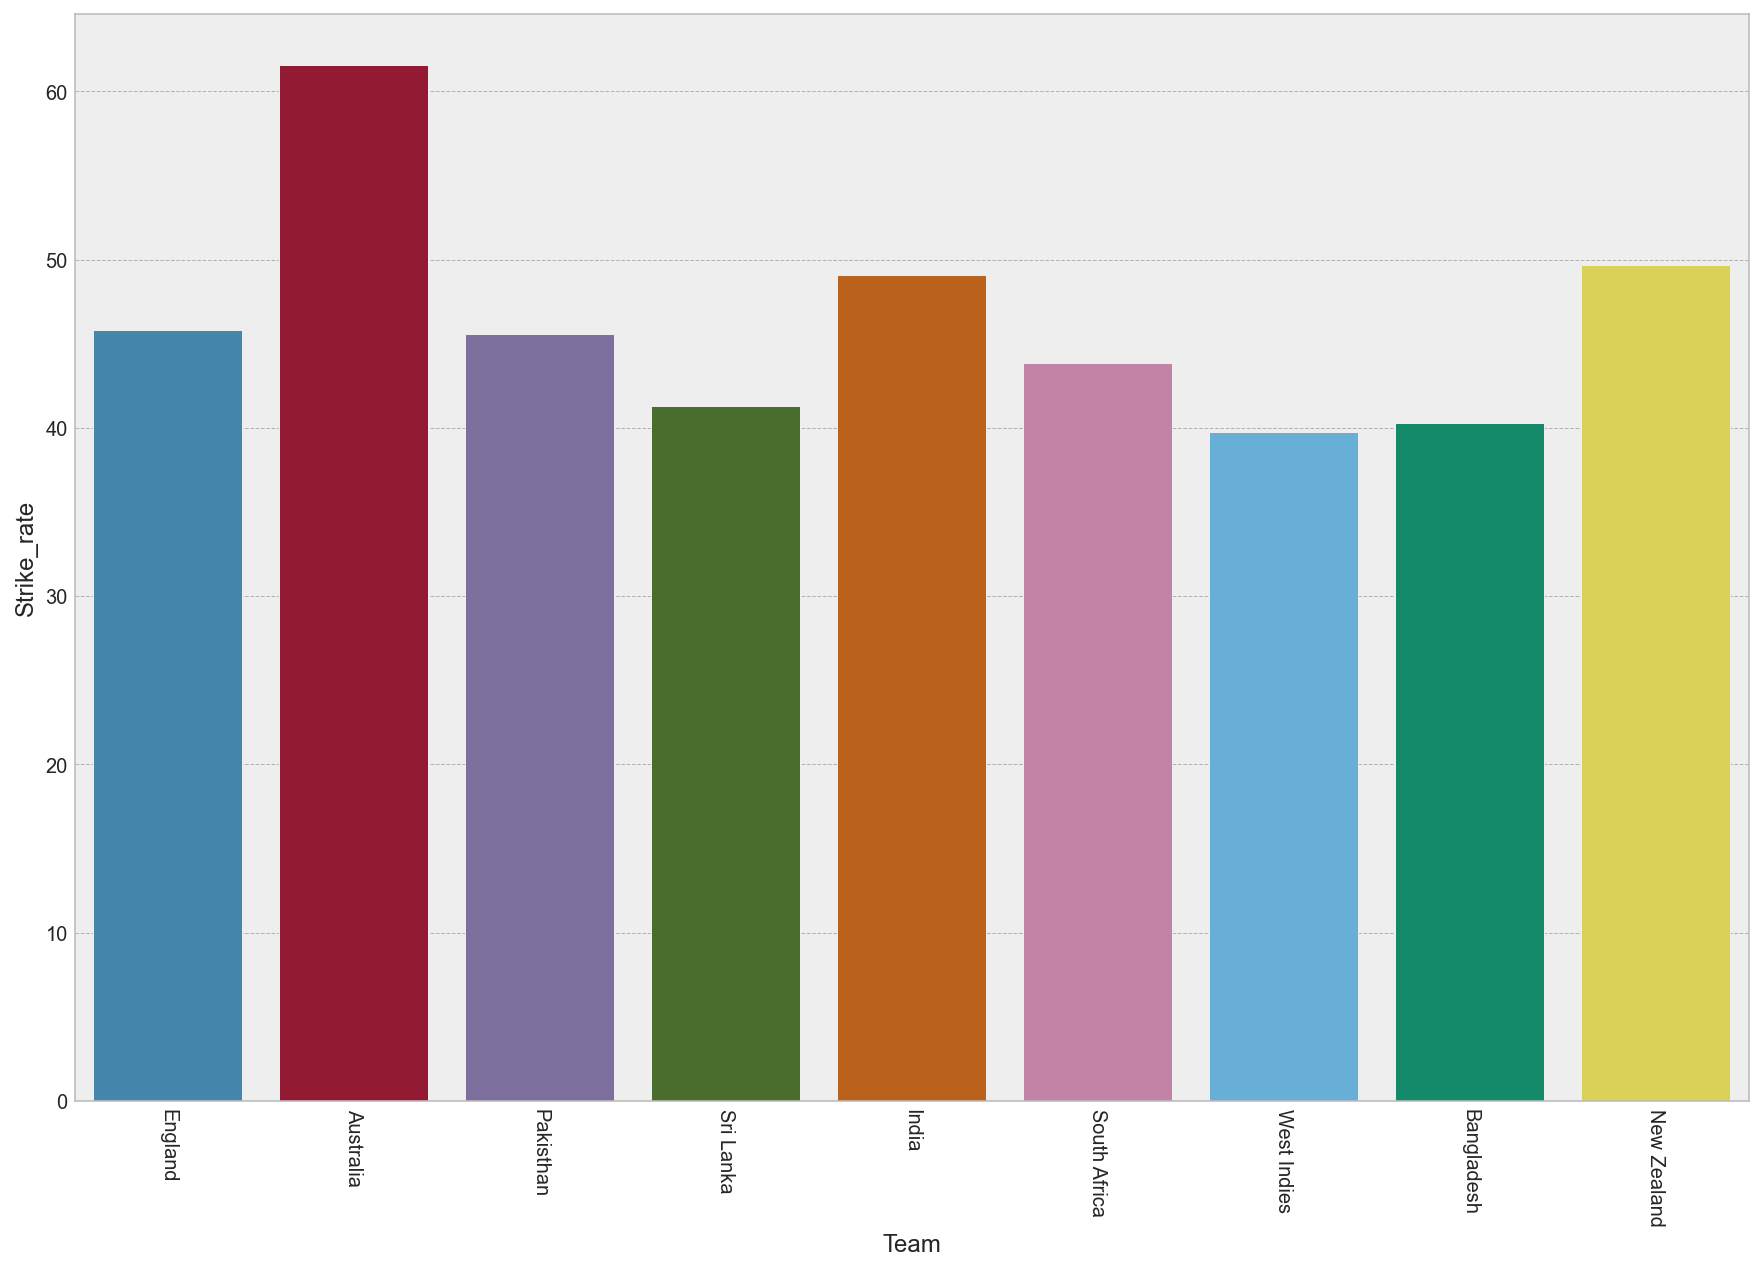

In [50]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Strike_rate',estimator= np.average, ci = 0 );

### Distribution plot for Runs

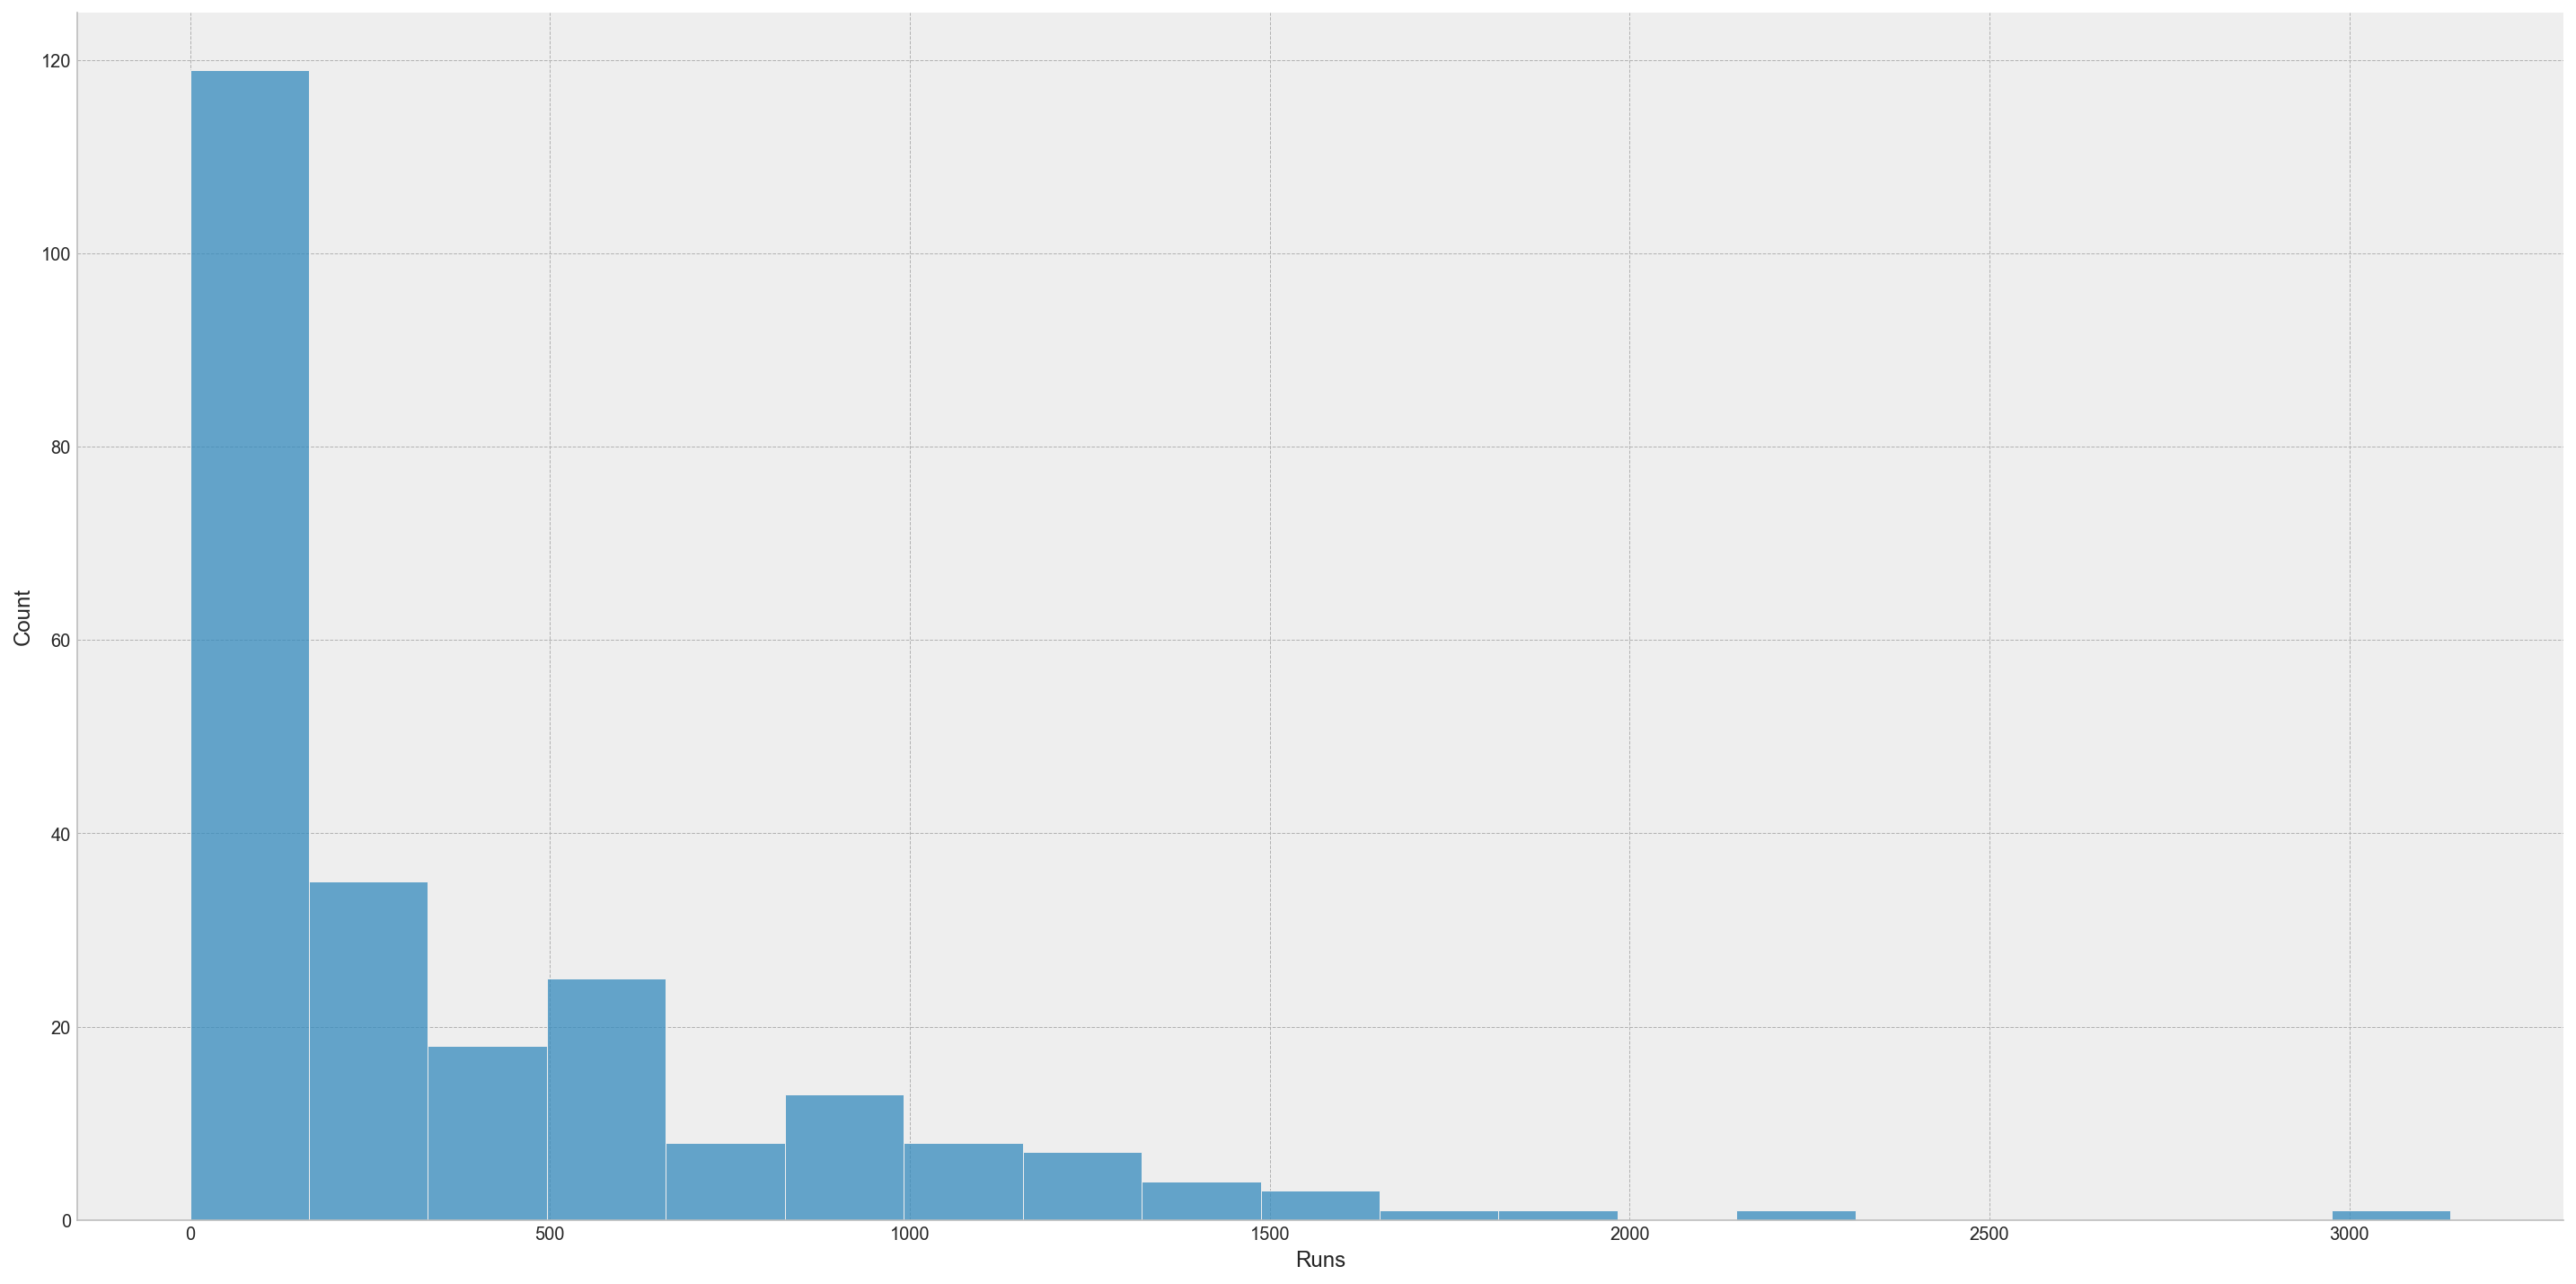

In [51]:

sns.displot(data =Icc_WTC_Batting_Stats , x = 'Runs', height=10, aspect =10/5);

### Distribution plot for Highest score

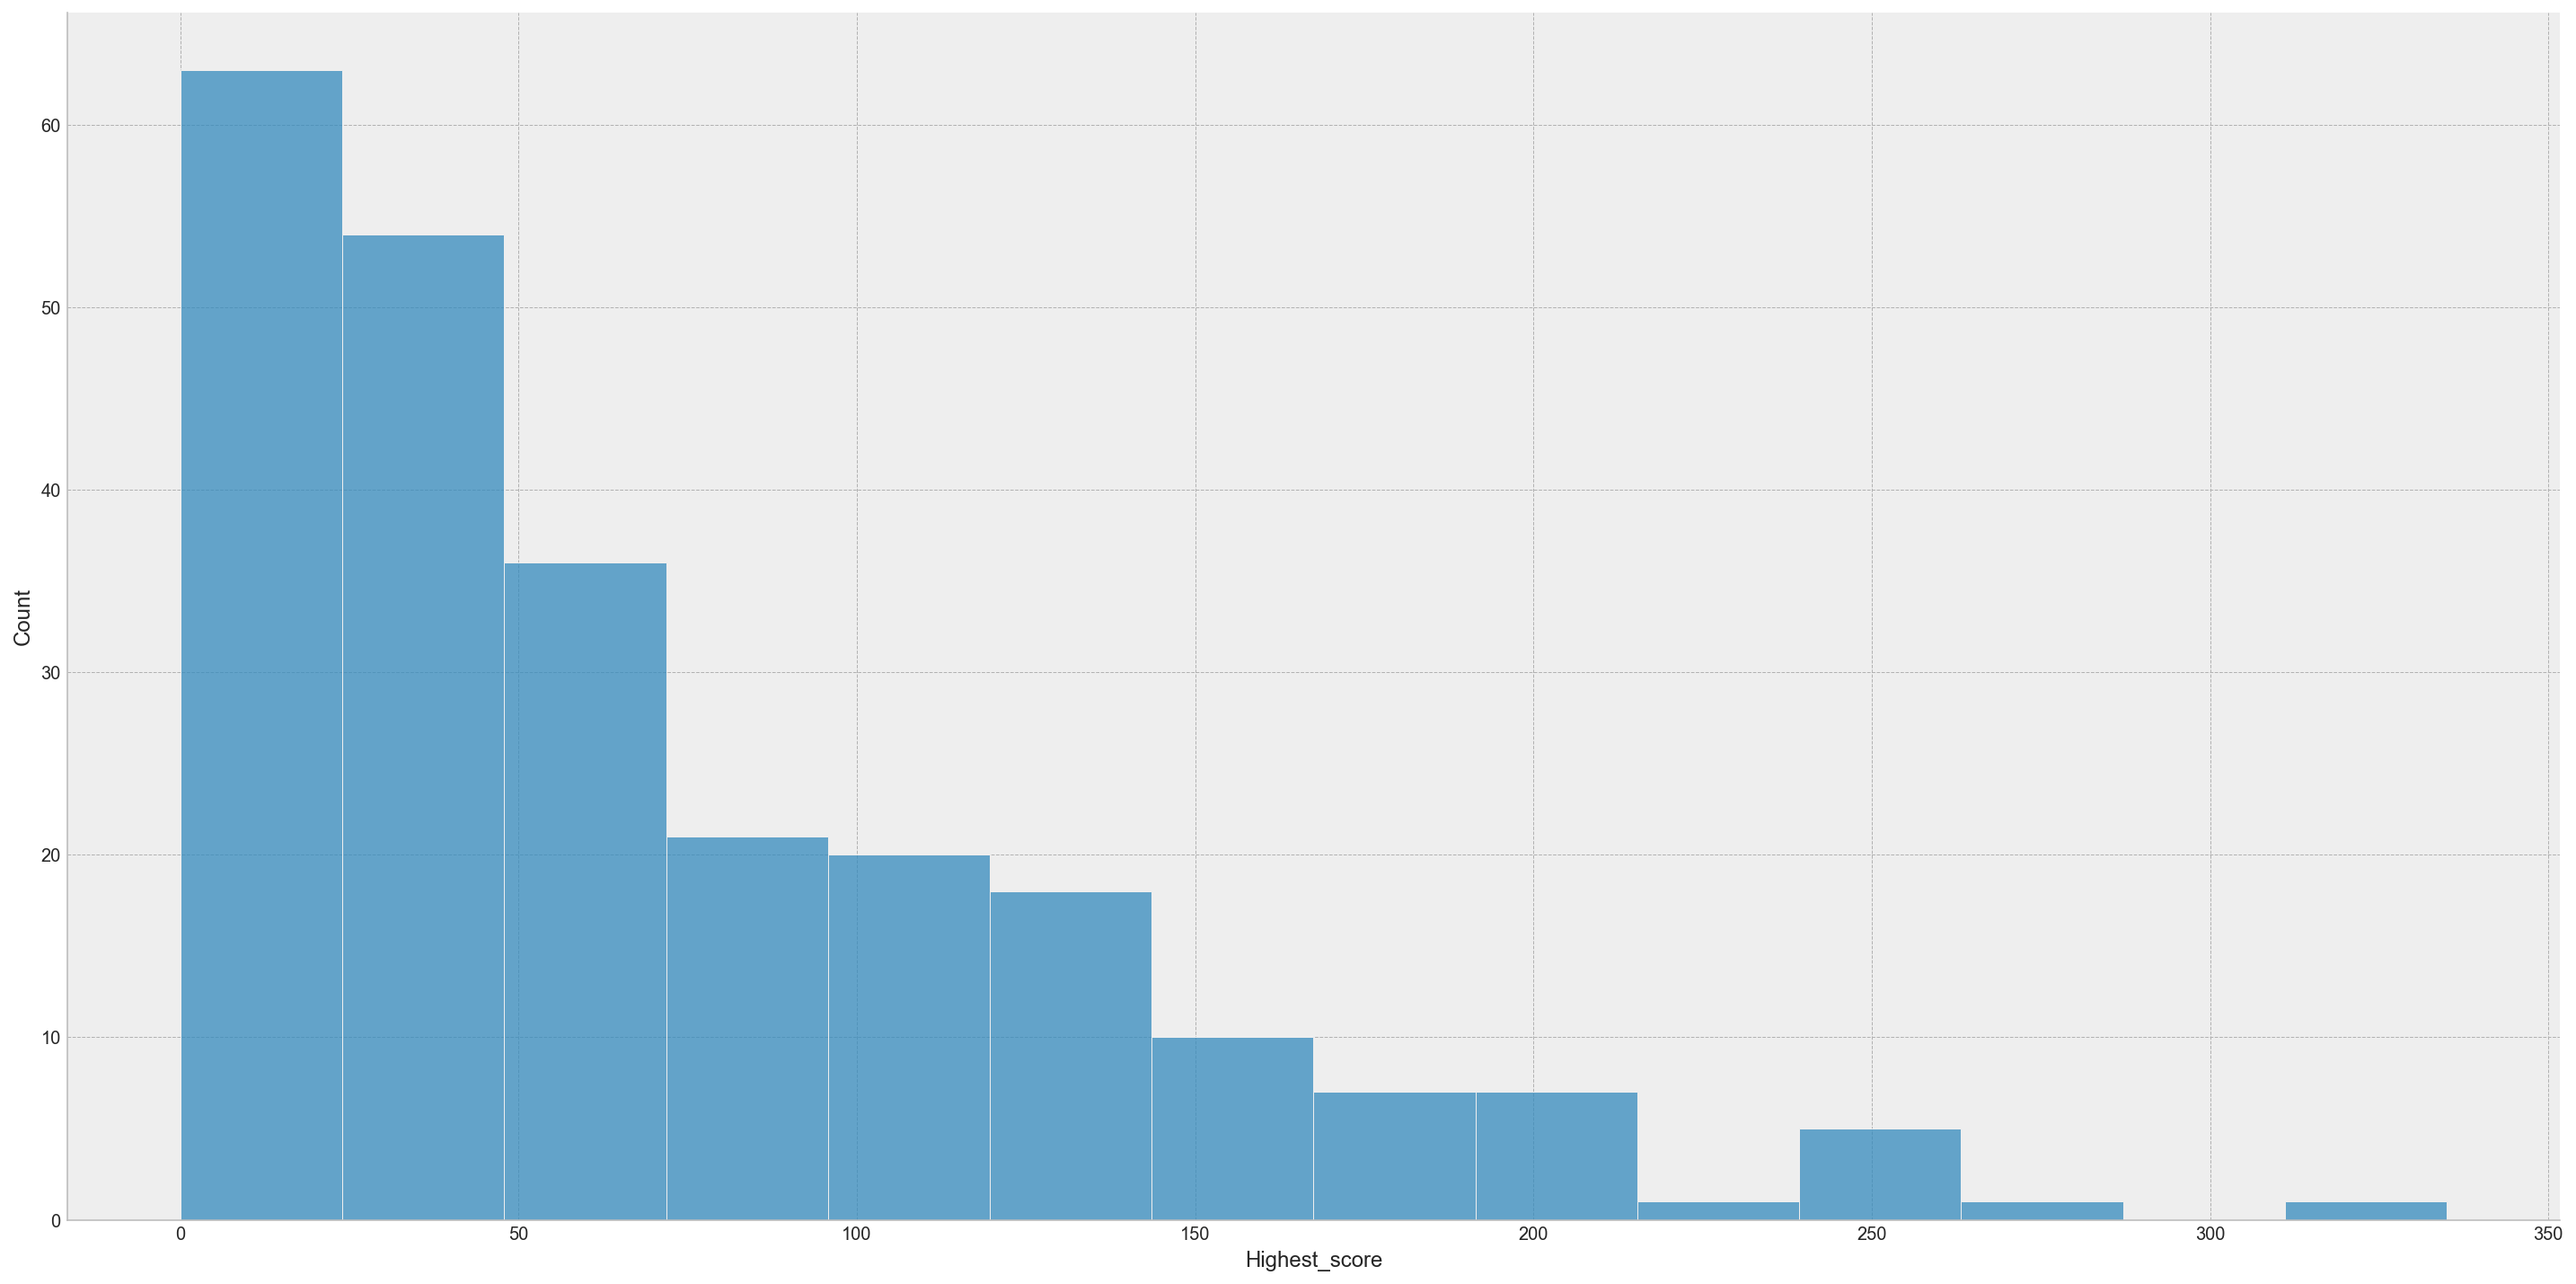

In [52]:

sns.displot(data =Icc_WTC_Batting_Stats , x = 'Highest_score', height=10, aspect =10/5);

### Team wise players in top 20

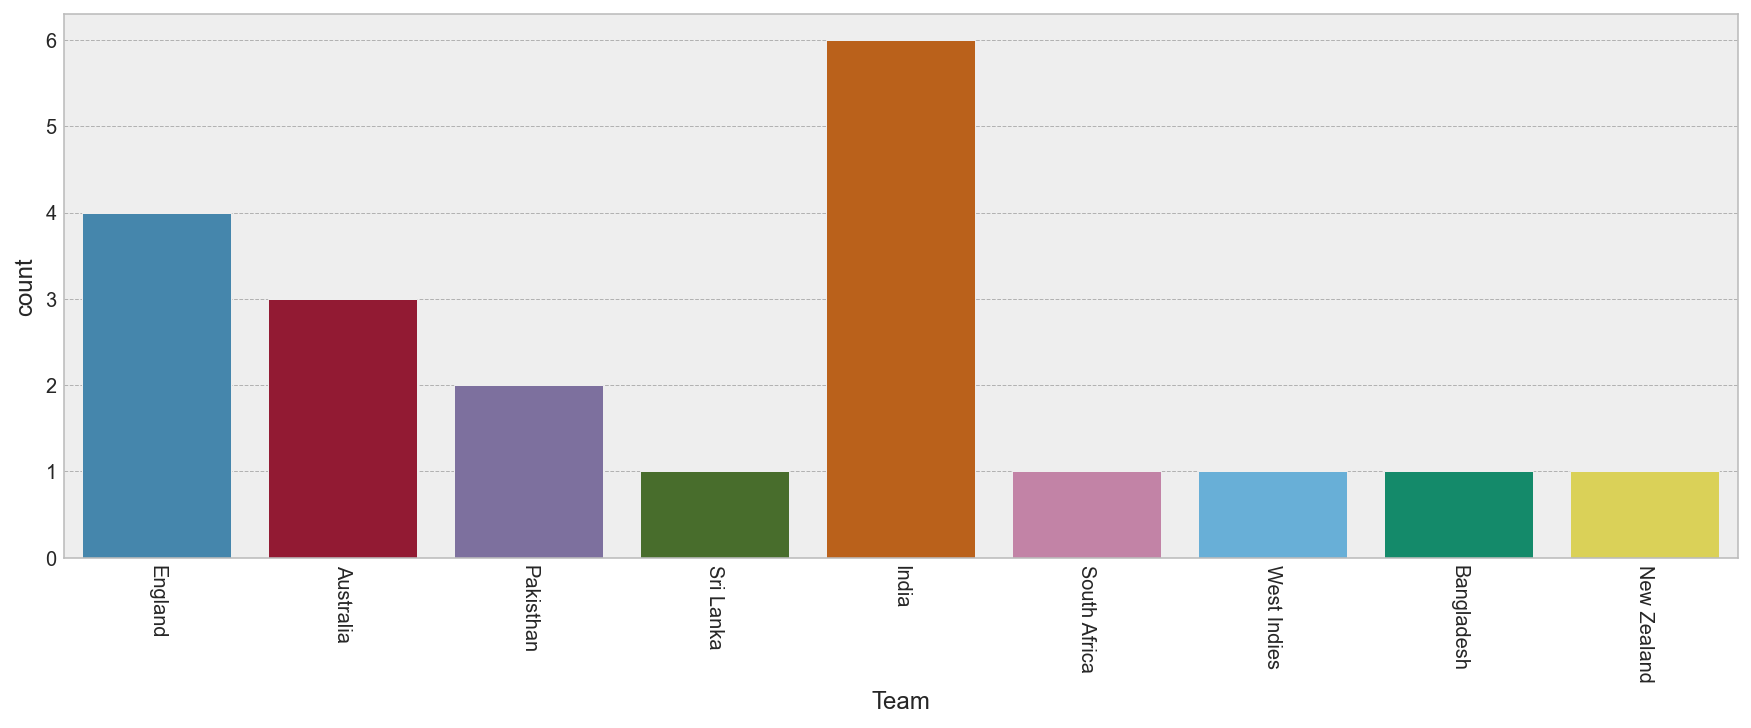

In [53]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 270)
sns.countplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Team');